In [1]:
import pandas as pd
import re
import glob
import warnings

warnings.filterwarnings("ignore")

In [2]:
def load_hogar_ccaa_data(
    path_pattern: str = '../../datamarts/picotaData/hogarCCAA*.tsv',
    sort_by_ccaa: bool = True,
    ccaa_column_name: str = 'ccaa'
) -> pd.DataFrame:
    """
    Lee todos los ficheros TSV de hogares por CCAA, añade una columna con el código
    de CCAA extraído del nombre de fichero, concatena todo en un único DataFrame y
    opcionalmente ordena por CCAA.

    Parameters
    ----------
    path_pattern : str
        Patrón glob para localizar los archivos (por defecto '../../datamarts/picotaData/hogarCCAA*.tsv').
    sort_by_ccaa : bool
        Si True, ordena el DataFrame resultante por la columna de CCAA.
    ccaa_column_name : str
        Nombre de la columna donde se almacenará el código de CCAA.

    Returns
    -------
    pd.DataFrame
        DataFrame con todos los datos concatenados y la columna de CCAA.
    """
    files = glob.glob(path_pattern)
    dfs = []

    for fp in files:
        m = re.search(r'hogarCCAA(\d+)\.tsv$', fp)
        if not m:
            continue
        code = m.group(1).zfill(2)  # si quieres siempre dos dígitos, ojo

        df = pd.read_csv(fp, sep='\t')
        df[ccaa_column_name] = code
        dfs.append(df)

    if not dfs:
        raise FileNotFoundError(f"No se encontraron archivos con patrón {path_pattern}")

    big_df = pd.concat(dfs, ignore_index=True)

    if sort_by_ccaa:
        big_df.sort_values(ccaa_column_name, inplace=True)

    return big_df



In [3]:
df = load_hogar_ccaa_data()
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
df.head()

timestamp  capitalProvincia  tamanoMunicipio  densidad  \
0      2006-01-01T00:00:00                 0                3         1   
23535  2017-01-01T00:00:00                 1                5         3   
23534  2017-01-01T00:00:00                 0                2         2   
23533  2017-01-01T00:00:00                 0                2         2   
23532  2017-01-01T00:00:00                 0                2         1   

       superficie  aguaCaliente  calefaccion  zonaResidencial  \
0            90.0             1            0                5   
23535        64.0             1            0                5   
23534        90.0             1            1                5   
23533       135.0             1            1                6   
23532        95.0             1            0                1   

       regimenTenencia  comidasTotales  miembros:ocupados  \
0                    6            68.0                3.0   
23535                6            36.0                0.0   
23534                6           104.0                2.0   
23533                6            32.0                0.0   
23532                6            26.0                0.0   

       miembros:noOcupados  miembros:activos  miembros:noActivos  \
0                        2               3.0                   2   
23535                    1               0.0                   1   
23534                    2               2.0                   2   
23533                    3               2.0                   1   
23532                    1               0.0                   1   

       miembros:ancianos:masculinos  miembros:ancianos:femeninos  \
0                                 0                            0   
23535                             0                            1   
23534                             0                            0   
23533                             0                            0   
23532                             0                            1   

       miembros:adultos:masculinos  miembros:adultos:femeninos  \
0                                0                           2   
23535                            0                           0   
23534                            1                           1   
23533                            2                           1   
23532                            0                           0   

       miembros:niños:femeninos  miembros:niños:masculinos  \
0                             1                          2   
23535                         0                          0   
23534                         0                          2   
23533                         0                          0   
23532                         0                          0   

       miembros:conIngresos:masculinos  miembros:conIngresos:femeninos  \
0                                    2                               1   
23535                                0                               1   
23534                                1                               1   
23533                                1                               0   
23532                                0                               1   

       miembros:sinIngresos:masculinos  miembros:sinIngresos:femeninos  \
0                                    0                               2   
23535                                0                               0   
23534                                2                               0   
23533                                1                               1   
23532                                0                               0   

       edadSp  espanolSp  educacionSuperiorSp fuentePrincipalIngresos  \
0          47          1                    0              asalariado   
23535      73          1                    0                 pension   
23534      41          1                    1              asalariado   
23533      63          1              

In [4]:
df = pd.get_dummies(df, columns=['ccaa', 'fuentePrincipalIngresos'], prefix=['ccaa', 'fuentePrincipalIngresos'])

# Renombrar las columnas de CCAA para que tengan un formato más amigable
df.rename(columns=lambda x: re.sub(r'^ccaa_(\d+)$', r'ccaa_\1', x), inplace=True)
# Renombrar las columnas de fuentePrincipalIngresos para que tengan un formato más amigable
df.rename(columns=lambda x: re.sub(r'^fuentePrincipalIngresos_(\d+)$', r'fuentePrincipalIngresos_\1', x), inplace=True)


## Analísis de sensibilidad por código

### 🗂 Categorías por código (Super_Categoría)

| Código | Categoría                                                                                           |
|--------|-----------------------------------------------------------------------------------------------------|
| 01.1   | PRODUCTOS ALIMENTICIOS                                                                              |
| 01.2   | BEBIDAS NO ALCOHÓLICAS                                                                              |
| 02.1   | BEBIDAS ALCOHÓLICAS                                                                                 |
| 02.2   | TABACO                                                                                              |
| 03.1   | ARTÍCULOS DE VESTIR                                                                                 |
| 03.2   | CALZADO                                                                                             |
| 04.1   | ALQUILERES REALES DE LA VIVIENDA                                                                    |
| 04.2   | ALQUILERES IMPUTADOS DE LA VIVIENDA                                                                 |
| 04.3   | GASTOS CORRIENTES DE MANTENIMIENTO Y REPARACIÓN DE LA VIVIENDA                                     |
| 04.4   | SUMINISTRO DE AGUA Y OTROS SERVICIOS RELACIONADOS CON LA VIVIENDA                                  |
| 04.5   | ELECTRICIDAD, GAS Y OTROS COMBUSTIBLES                                                              |
| 05.1   | MUEBLES, ARTÍCULOS DE AMUEBLAMIENTO, ALFOMBRAS Y OTROS REVESTIMIENTOS PARA SUELOS                  |
| 05.2   | ARTÍCULOS TEXTILES PARA EL HOGAR                                                                    |
| 05.3   | APARATOS DE CALEFACCIÓN Y DE COCINA, FRIGORÍFICOS, LAVADORAS Y OTROS GRANDES ELECTRODOMÉSTICOS     |
| 05.4   | CRISTALERÍA, VAJILLA, CUBERTERÍA Y OTROS UTENSILIOS DEL HOGAR                                       |
| 05.5   | HERRAMIENTAS PARA CASA Y JARDÍN                                                                     |
| 05.6   | BIENES Y SERVICIOS PARA EL MANTENIMIENTO CORRIENTE DEL HOGAR                                       |
| 06.1   | PRODUCTOS FARMACÉUTICOS; APARATOS Y MATERIAL TERAPÉUTICO                                            |
| 06.2   | SERVICIOS MÉDICOS Y PARAMÉDICOS AMBULATORIOS                                                        |
| 06.3   | SERVICIOS HOSPITALARIOS                                                                             |
| 07.1   | COMPRA DE VEHÍCULOS                                                                                 |
| 07.2   | UTILIZACIÓN DE VEHÍCULOS PERSONALES                                                                 |
| 07.3   | SERVICIOS DE TRANSPORTE                                                                             |
| 08.1   | SERVICIOS POSTALES                                                                                  |
| 08.2   | EQUIPOS DE TELÉFONO Y FAX                                                                           |
| 08.3   | SERVICIOS DE TELÉFONO Y FAX                                                                         |
| 09.1   | EQUIPOS Y ACCESORIOS AUDIOVISUALES, FOTOGRÁFICOS Y DE PROCESAMIENTO DE INFORMACIÓN                 |
| 09.2   | OTROS BIENES DURADEROS PARA EL OCIO Y LA CULTURA                                                   |
| 09.3   | OTROS ARTÍCULOS Y EQUIPOS PARA EL OCIO, JARDINERÍA Y MASCOTAS                                      |
| 09.4   | SERVICIOS RECREATIVOS Y CULTURALES                                                                  |
| 09.5   | PRENSA, LIBRERÍA Y PAPELERÍA                                                                        |
| 09.6   | PAQUETES TURÍSTICOS                                                                                 |
| 10.1   | EDUCACIÓN INFANTIL Y PRIMARIA (NIVELES 0 Y 1 CNED-P-2014)                                           |
| 10.2   | EDUCACIÓN SECUNDARIA Y EDUCACIÓN POSTSECUNDARIA NO SUPERIOR (NIVELES 2, 3 Y 4 CNED-P-2014)         |
| 10.3   | EDUCACIÓN SUPERIOR (NIVELES 5, 6, 7 y 8 CNED-P-2014)                                                |
| 10.4   | EDUCACIÓN NO FORMAL (NIVEL 9 CNED-P-2014)                                                           |
| 11.1   | RESTAURACIÓN                                                                                        |
| 11.2   | SERVICIOS DE ALOJAMIENTO                                                                            |
| 12.1   | CUIDADOS PERSONALES                                                                                 |
| 12.3   | EFECTOS PERSONALES NO DECLARADOS ANTERIORMENTE                                                     |
| 12.4   | PROTECCIÓN SOCIAL                                                                                   |
| 12.5   | SERVICIOS DE SEGUROS                                                                                |
| 12.6   | SERVICIOS FINANCIEROS NO DECLARADOS EN OTRA PARTE                                                  |
| 12.7   | OTROS SERVICIOS NO DECLARADOS ANTERIORMENTE                                                        |
| 12.8   | REMESAS                                                                                             |


---


Hacemos un sondeo para ver que variables de salida nos pueden ayudar a predecir nuestro modelo

In [5]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
def select_features(X, y, vif_thresh, p_thresh):
    """
    Elimina iterativamente la variable con p-valor > p_thresh
    o VIF > vif_thresh hasta que todas las variables cumplan ambos criterios.
    """
    X = X.copy()
    while True:
        # 1) Eliminación por p-valor
        X_const = sm.add_constant(X, has_constant='add')
        model = sm.OLS(y, X_const).fit()
        pvals = model.pvalues.drop('const', errors='ignore')
        if not pvals.empty and pvals.max() > p_thresh:
            drop_var = pvals.idxmax()
            X = X.drop(columns=[drop_var])
            continue

        # 2) Eliminación por VIF
        vif = pd.Series(
            [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
            index=X.columns
        )
        if vif.max() > vif_thresh:
            drop_var = vif.idxmax()
            X = X.drop(columns=[drop_var])
            continue

        break

    return X

In [7]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


def run_sensitivity_analysis_by_category(df, output_columns,
                                         p_value_threshold=0.05,
                                         vif_threshold=5,
                                         normalize=True):
    model_results = {}
    significant_coefficients = []
    model_metrics = []
    discarded = []

    # Excluir variables de salida y otras no deseadas de los predictores
    excluded = set(["timestamp"]) | set(output_columns)
    expl = [c for c in df.select_dtypes(include="number").columns if c not in excluded]

    for target in output_columns:
        # Verificar existencia de la variable target
        if target not in df.columns:
            discarded.append((target, "No existe en el DataFrame"))
            continue

        # Eliminar filas con NA en target o en predictores base
        d = df.dropna(subset=[target] + expl)
        if d.shape[0] < len(expl) + 5:
            discarded.append((target, "Insuficientes datos"))
            continue

        X = d[expl]
        y = d[target]

        # Normalizar si se solicita
        if normalize:
            scaler = StandardScaler()
            X = pd.DataFrame(scaler.fit_transform(X),
                             columns=X.columns, index=X.index)

        try:
            # Selección de características por VIF y p-valor
            if vif_threshold is not None:
                X_sel = select_features(X, y, vif_threshold, p_value_threshold)
            else:
                X_sel = X.copy()

            if X_sel.shape[1] == 0:
                discarded.append((target, "Sin variables finales"))
                continue

            # Ajuste del modelo OLS
            X_const = sm.add_constant(X_sel, has_constant='add')
            m = sm.OLS(y, X_const).fit()
            model_results[target] = m

            # Guardar coeficientes significativos
            coefs = pd.DataFrame({
                "Variable": m.params.index,
                "Coeficiente": m.params.values,
                "P-Valor": m.pvalues.values,
                "Gasto": target
            })
            coefs = coefs[(coefs["P-Valor"] < p_value_threshold) & (coefs["Variable"] != "const")]
            significant_coefficients.append(coefs)

            print(f"Modelo para {target}: R² = {m.rsquared:.4f}, R² Ajustado = {m.rsquared_adj:.4f}")


            # Guardar métricas del modelo
            model_metrics.append({
                "Gasto": target,
                "R²": m.rsquared,
                "R² Ajustado": m.rsquared_adj,
                "AIC": m.aic,
                "BIC": m.bic,
                "N": int(m.nobs)
            })

        except Exception as e:
            discarded.append((target, f"Error: {e}"))

    # Concatenar y ordenar resultados
    coefs_df = pd.concat(significant_coefficients, ignore_index=True) if significant_coefficients else pd.DataFrame()
    metrics_df = pd.DataFrame(model_metrics).sort_values("R² Ajustado", ascending=False)

    return model_results, coefs_df, metrics_df, discarded


In [8]:
output_columns = [col for col in df.columns if col.startswith("gastoMonetario:")]


In [9]:
results, coef_df, metrics_df, discarded = run_sensitivity_analysis_by_category(
    df,
    output_columns,
    p_value_threshold=0.05,   
    vif_threshold=5,       
    normalize=True        
)


Modelo para gastoMonetario:productosAlimenticios11: R² = 0.3247, R² Ajustado = 0.3247
Modelo para gastoMonetario:bebidasNoAlcoholicas12: R² = 0.1295, R² Ajustado = 0.1294
Modelo para gastoMonetario:bebidasAlcoholicas21: R² = 0.0575, R² Ajustado = 0.0573
Modelo para gastoMonetario:tabaco22: R² = 0.0696, R² Ajustado = 0.0694
Modelo para gastoMonetario:articulosDeVestir31: R² = 0.0995, R² Ajustado = 0.0993
Modelo para gastoMonetario:calzado32: R² = 0.0819, R² Ajustado = 0.0817
Modelo para gastoMonetario:alquileresRealesDeLaVivienda41: R² = 0.2414, R² Ajustado = 0.2410
Modelo para gastoMonetario:mantenimientoDeLaVivienda43: R² = 0.0234, R² Ajustado = 0.0232
Modelo para gastoMonetario:suministroDeAgua44: R² = 0.3276, R² Ajustado = 0.3275
Modelo para gastoMonetario:electricidadGasOtrosCombustibles45: R² = 0.3261, R² Ajustado = 0.3260
Modelo para gastoMonetario:mueblesRevestimientos51: R² = 0.0440, R² Ajustado = 0.0437
Modelo para gastoMonetario:textilesParaElHogar52: R² = 0.0351, R² Ajustado

In [10]:
metrics_df

Gasto        R²  R² Ajustado  \
8                   gastoMonetario:suministroDeAgua44  0.327572     0.327488   
9   gastoMonetario:electricidadGasOtrosCombustibles45  0.326103     0.326017   
0              gastoMonetario:productosAlimenticios11  0.324748     0.324659   
41             gastoMonetario:serviciosFinancieros126  0.272634     0.272446   
6       gastoMonetario:alquileresRealesDeLaVivienda41  0.241450     0.240969   
31       gastoMonetario:educacionInfantilYPrimaria101  0.236861     0.236452   
24              gastoMonetario:serviciosTelefonoFax83  0.229616     0.229517   
35                     gastoMonetario:restauracion111  0.217997     0.217883   
32  gastoMonetario:educacionSecundariaYPostsecunda...  0.214309     0.213926   
23                gastoMonetario:equiposTelefonoFax82  0.191400     0.191174   
19                 gastoMonetario:compraDeVehiculos71  0.162326     0.161975   
36                      gastoMonetario:alojamiento112  0.158915     0.158516   
30                gastoMonetario:paquetesTuristicos96  0.153596     0.153321   
15        gastoMonetario:bienesServiciosParaElHogar56  0.141065     0.140936   
40                          gastoMonetario:seguros125  0.138213     0.138026   
37               gastoMonetario:cuidadosPersonales121  0.133691     0.133576   
1               gastoMonetario:bebidasNoAlcoholicas12  0.129539     0.129414   
20          gastoMonetario:usoDeVehiculosPersonales72  0.118971     0.118833   
33                gastoMonetario:educacionSuperior103  0.111844     0.111251   
4                  gastoMonetario:articulosDeVestir31  0.099469     0.099323   
21             gastoMonetario:serviciosDeTransporte73  0.094845     0.094607   
34                gastoMonetario:educacionNoFormal104  0.093494     0.092880   
5                            gastoMonetario:calzado32  0.081900     0.081705   
3                             gastoMonetario:tabaco22  0.069634     0.069356   
29                  gastoMonetario:prensaYPapeleria95  0.068576     0.068375   
16            gastoMonetario:productosFarmaceuticos61  0.061923     0.061759   
2                 gastoMonetario:bebidasAlcoholicas21  0.057485     0.057291   
27           gastoMonetario:ocioJardineriaYMascotas93  0.052092     0.051898   
43                          gastoMonetario:remesas128  0.047726     0.047348   
25           gastoMonetario:audiovisualesTecnologia91  0.046413     0.046219   
18            gastoMonetario:serviciosHospitalarios63  0.045318     0.043889   
10             gastoMonetario:mueblesRevestimientos51  0.043954     0.043695   
28   gastoMonetario:serviciosRecreativosYCulturales94  0.041907     0.041717   
38                gastoMonetario:efectosPersonales123  0.039418     0.039218   
11               gastoMonetario:textilesParaElHogar52  0.035105     0.034828   
12          gastoMonetario:grandesElectrodomesticos53  0.033561     0.033369   
14            gastoMonetario:herramientasCasaJardin55  0.033351     0.033084   
39                 gastoMonetario:proteccionSocial124  0.032017     0.031673   
22                 gastoMonetario:serviciosPostales81  0.029235     0.028554   
7          gastoMonetario:mantenimientoDeLaVivienda43  0.023449     0.023212   
13                gastoMonetario:utensiliosDelHogar54  0.015626     0.015340   
26             gastoMonetario:bienesDuraderosDeOcio92  0.015015     0.014654   
17      gastoMonetario:serviciosMedicosAmbulatorios62  0.014590     0.014416   
42                   gastoMonetario:otrosServicios127  0.008667     0.008363   

             AIC           BIC       N  
8   5.005451e+06  5.005888e+06  318833  
9   4.991835e+06  4.992283e+06  320281  
0   5.799261e+06  5.799720e+06  320425  
41  2.252462e+06  2.252826e+06  139364  
6   1.072072e+06  1.072443e+06   63166  
31  9.353926e+05  9.356695e+05   56052  
24  4.667736e+06  4.668172e+06  312207  
35  4.961638e+06  4.962057e+06  265979  
32  1.085805e+06  1.086085e+06   61670  
23  1.490513e+06  1.490821e+06  11093

### 📊 Interpretación de los resultados del modelo OLS por categoría de gasto

Cada modelo OLS estima el gasto en una **supercategoría** a partir de variables explicativas como edad, ingresos, tipo de hogar, zona, etc. Para evaluar la calidad del ajuste del modelo, se analiza principalmente:

---

#### 🔹 **R² (Coeficiente de determinación)**
- Indica la proporción de la variabilidad del gasto explicada por el modelo.
- Va de 0 a 1: cuanto más alto, mejor.

**Ejemplos:**
- `ALQUILERES_IMPUTADOS_DE_LA_VIVIENDA` tiene un **R² de 0.65** → el modelo explica el **65%** de la variabilidad en el gasto. Es un ajuste bastante bueno.
- `PRODUCTOS_ALIMENTICIOS` tiene un **R² de 0.24** → el modelo explica solo el **24%** del gasto. Aceptable, pero deja gran parte sin explicar.
- `SERVICIOS_FINANCIEROS` tiene un **R² de 0.01** → el modelo **no logra explicar prácticamente nada** del gasto en esta categoría.

---

#### 🔹 **R² ajustado**
- Penaliza la inclusión de variables irrelevantes. Muy útil cuando hay muchas variables predictoras.
- Si es similar al R², indica que las variables añadidas aportan información real.

---

### ✅ Conclusiones de los resultados obtenidos

- 💡 **El modelo predice bien ciertas categorías estructurales y regulares del hogar:**
  - `ALQUILERES_IMPUTADOS_DE_LA_VIVIENDA`: R² = **0.65**
  - `SUMINISTRO_DE_AGUA`: R² = **0.29**
  - `ALQUILERES_REALES_DE_LA_VIVIENDA`: R² = **0.29**
  - `ELECTRICIDAD_GAS_OTROS_COMBUSTIBLES`: R² = **0.28**

  Estas categorías están probablemente determinadas por factores socioeconómicos (ingresos, tamaño del hogar, localización), lo cual el modelo capta con eficacia.

- 🟡 **Otras categorías muestran un ajuste moderado:**
  - `PRODUCTOS_ALIMENTICIOS`: R² = **0.24**
  - `SEGUROS`: R² = **0.23**
  - `EDUCACIÓN_INFANTIL_PRIMARIA`: R² = **0.23**

  Son áreas donde el comportamiento del gasto es más complejo, pero todavía parcialmente explicado por las variables del modelo.

- ❌ **Muchas categorías tienen un ajuste bajo (R² < 0.10):**
  - `CALZADO`, `TABACO`, `OCIO`, `EFECTOS_PERSONALES`, `SERVICIOS_POSTALES`, `SERVICIOS_MÉDICOS`, etc.

  En estos casos, el gasto puede depender de factores no observados en el modelo (gustos, hábitos, salud, eventos puntuales, etc.), o ser tan variable que no se puede modelar fácilmente con regresión lineal.

---

Como vemos, el modelo OLS es útil para estimar **gastos básicos y sistemáticos del hogar**, pero tiene **limitaciones claras** en categorías personales, esporádicas o con bajo gasto. Para estas últimas, podrían explorarse modelos no lineales, técnicas de segmentación o incluso análisis cualitativos.


### Graficamos los coeficientes por categoría

In [11]:
import matplotlib.pyplot as plt
import re

def plot_coefficients_per_category(coefficients_df):
    """
    Genera un gráfico de barras por cada categoría de gasto (columna 'Gasto'),
    ordenada según el número que aparece al final de la cadena.
    Barras rojas para coeficientes positivos, azules para negativos.
    """
    # 1) Extraemos el código numérico al final de cada categoría
    codes = (
        coefficients_df[['Gasto']]
        .drop_duplicates()
        .assign(
            Codigo=lambda d: (
                d['Gasto']
                .str.extract(r'(\d+)$')[0]         # captura los dígitos finales
                .astype(int, errors='ignore')     # convierte a int
            )
        )
    )

    # 2) Eliminamos posibles filas sin código válido y ordenamos
    ordered = (
        codes
        .dropna(subset=['Codigo'])
        .sort_values('Codigo')
        ['Gasto']
        .tolist()
    )

    # 3) Para cada categoría, dibujamos su barra
    for categoria in ordered:
        df_cat = coefficients_df[coefficients_df['Gasto'] == categoria]
        if df_cat.empty:
            continue

        # Color según signo del coeficiente
        df_cat = df_cat.copy()
        df_cat['Color'] = df_cat['Coeficiente'].apply(
            lambda x: 'darkred' if x > 0 else 'darkblue'
        )

        plt.figure(figsize=(12, 6))
        plt.bar(
            df_cat['Variable'],
            df_cat['Coeficiente'],
            color=df_cat['Color']
        )
        plt.axhline(0, color='black', linestyle='--')
        plt.xticks(rotation=90, ha='right')
        plt.title(f"Impacto de variables en: {categoria}")
        plt.xlabel("Variable explicativa")
        plt.ylabel("Coeficiente de regresión")
        plt.tight_layout()
        plt.show()


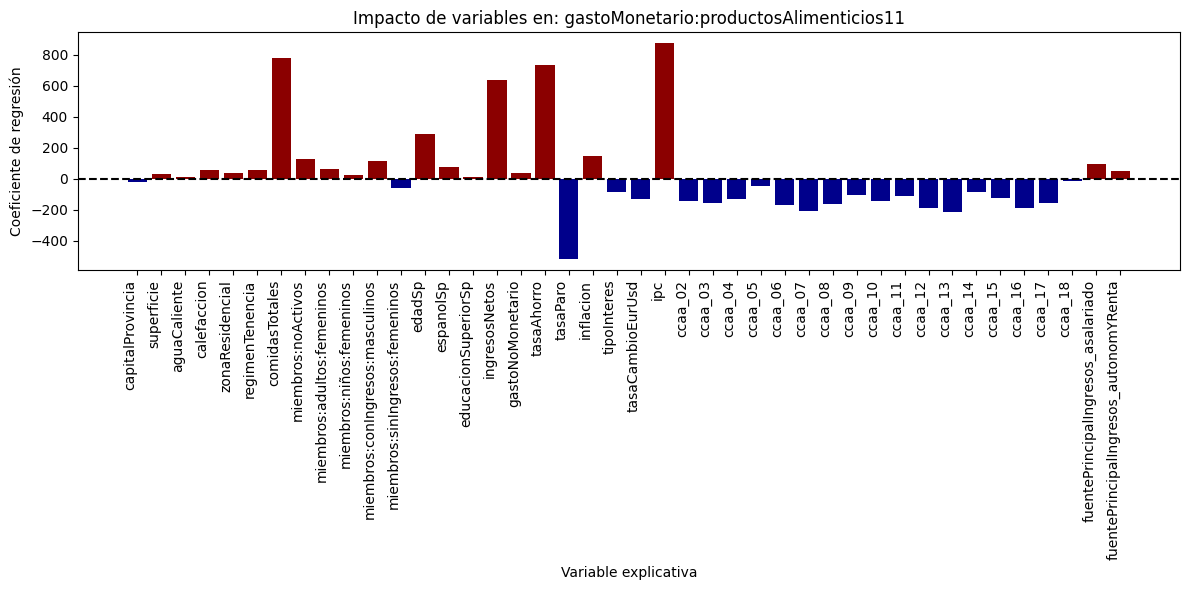

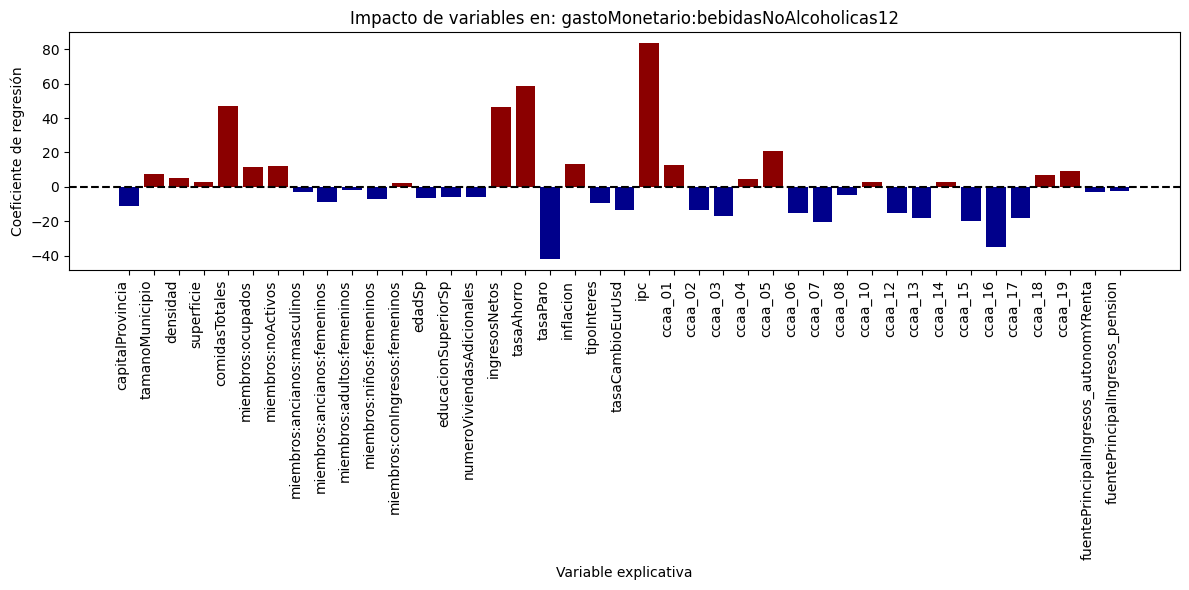

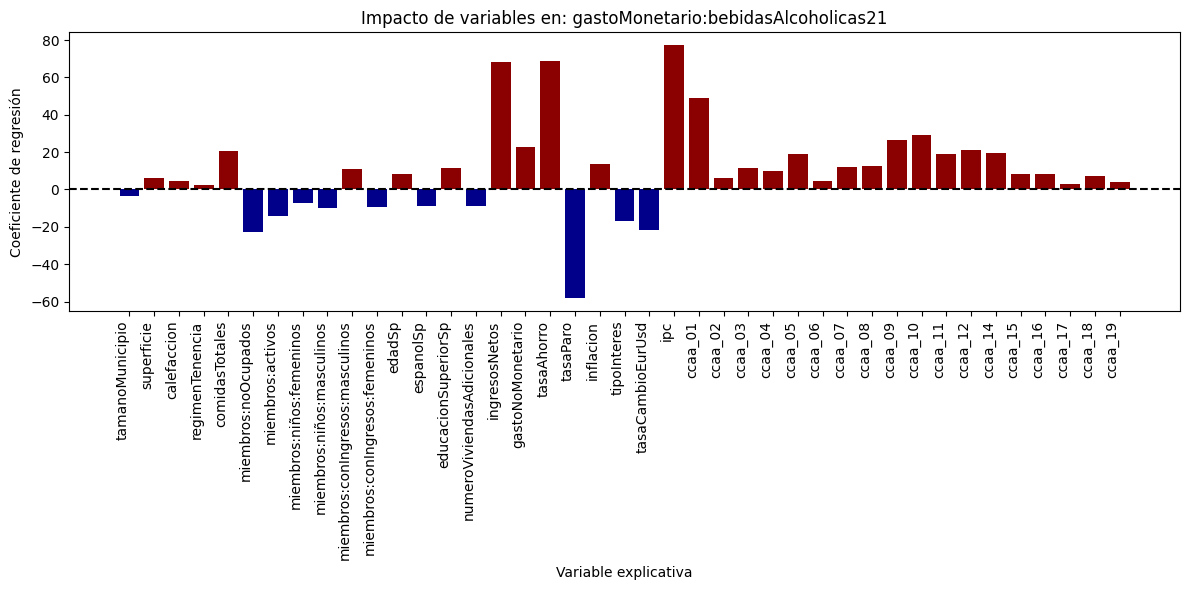

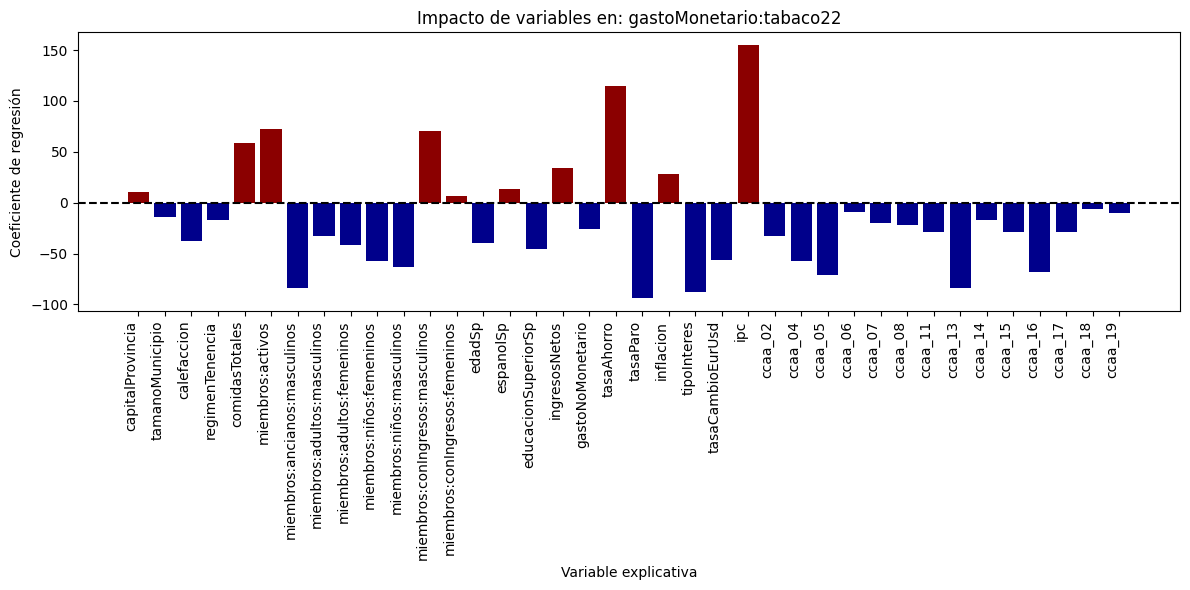

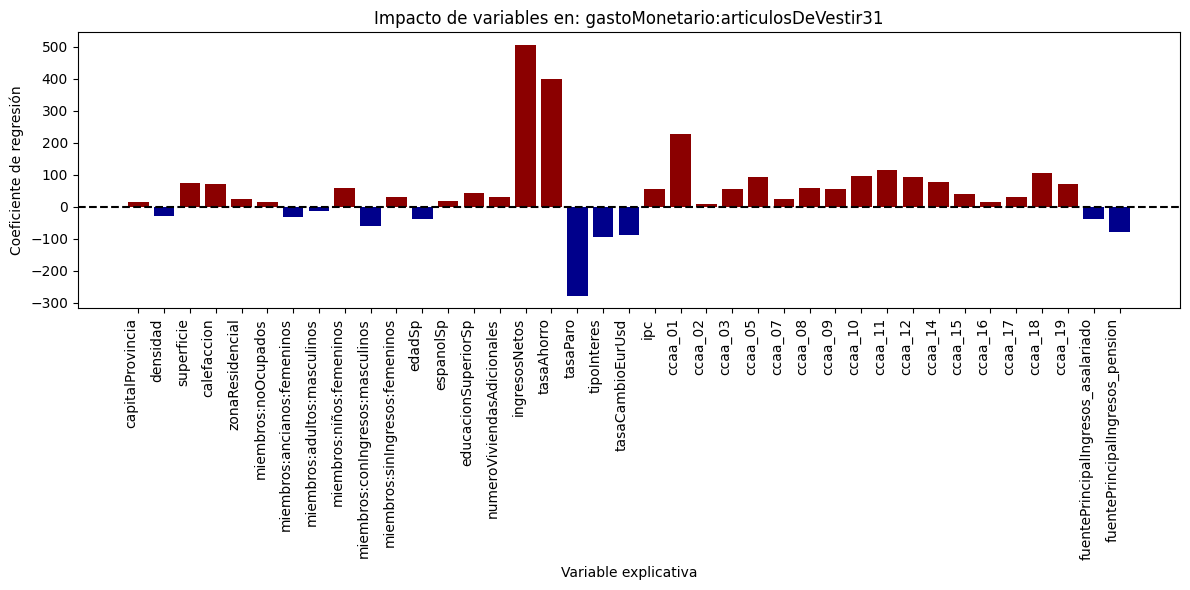

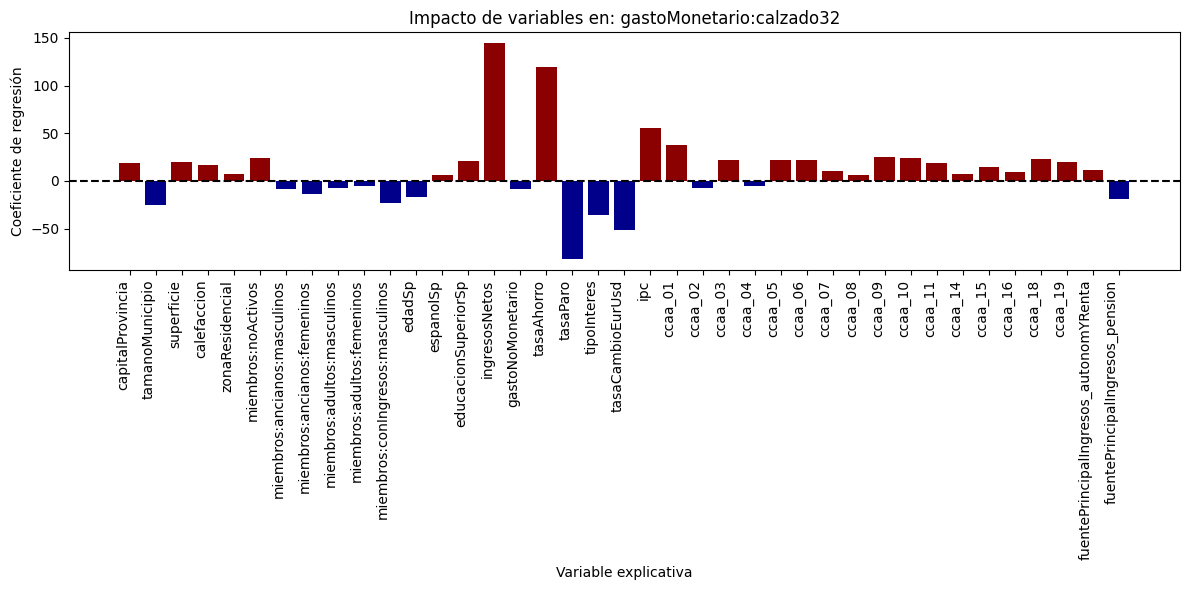

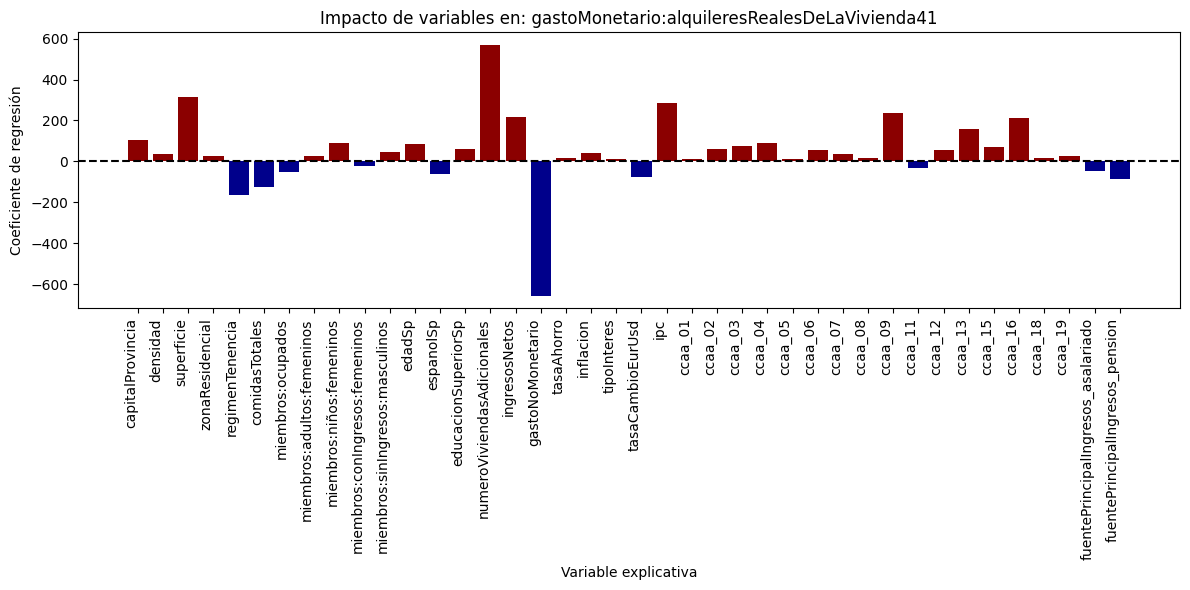

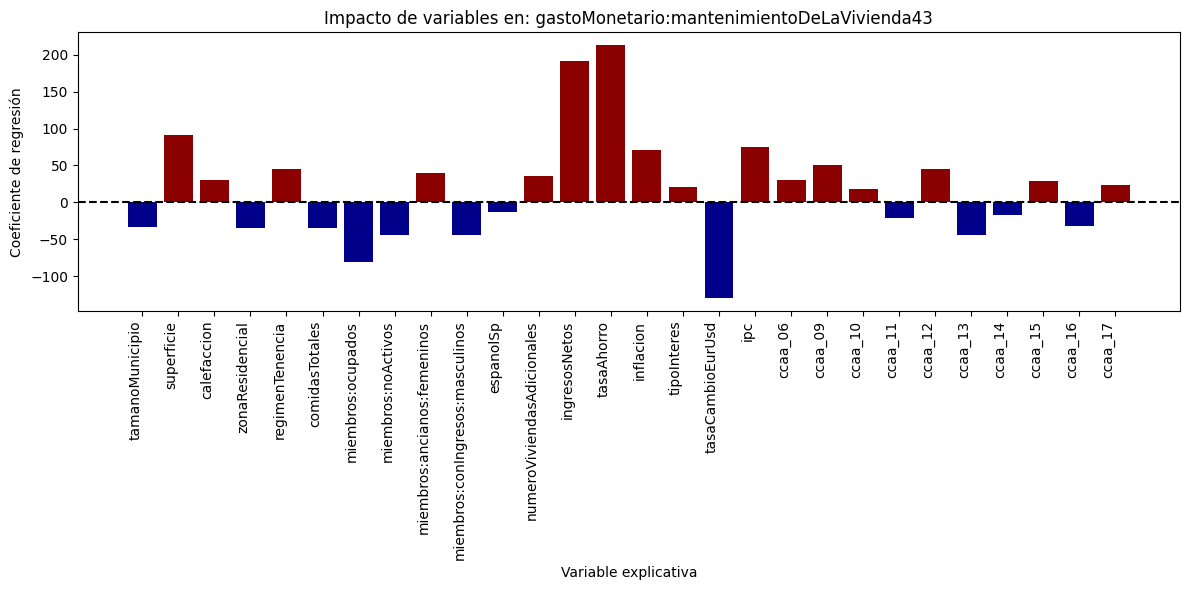

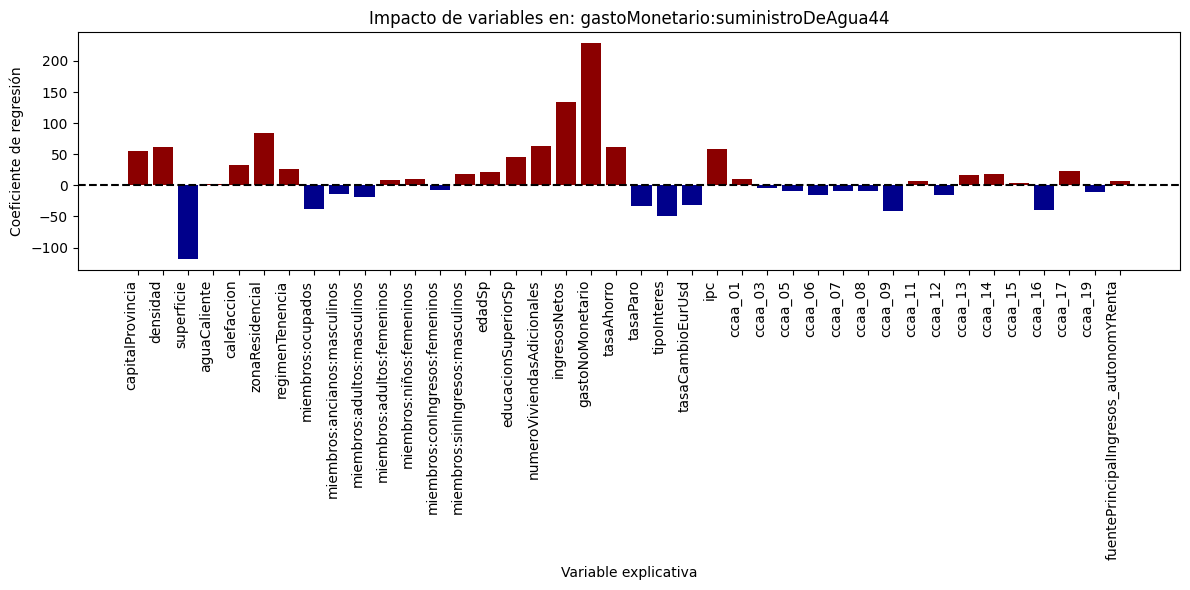

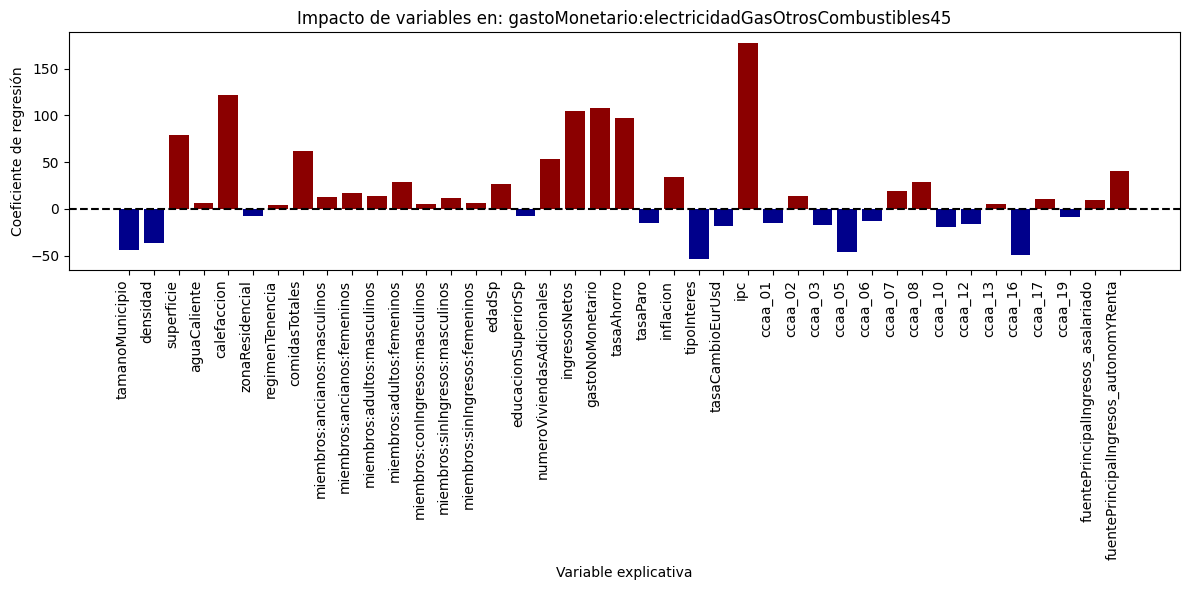

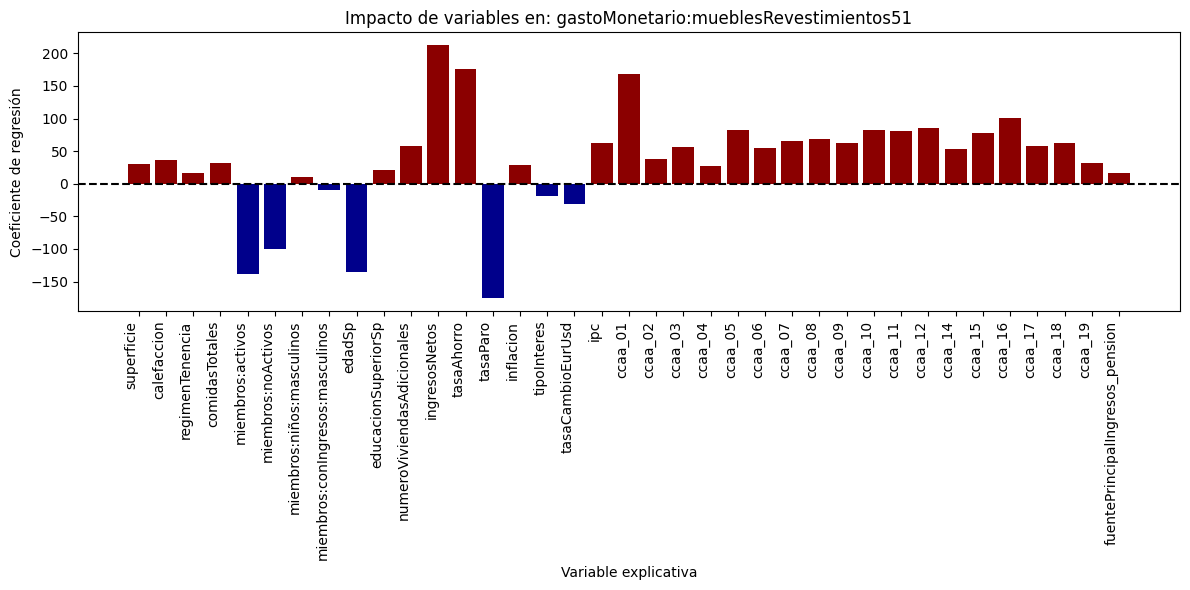

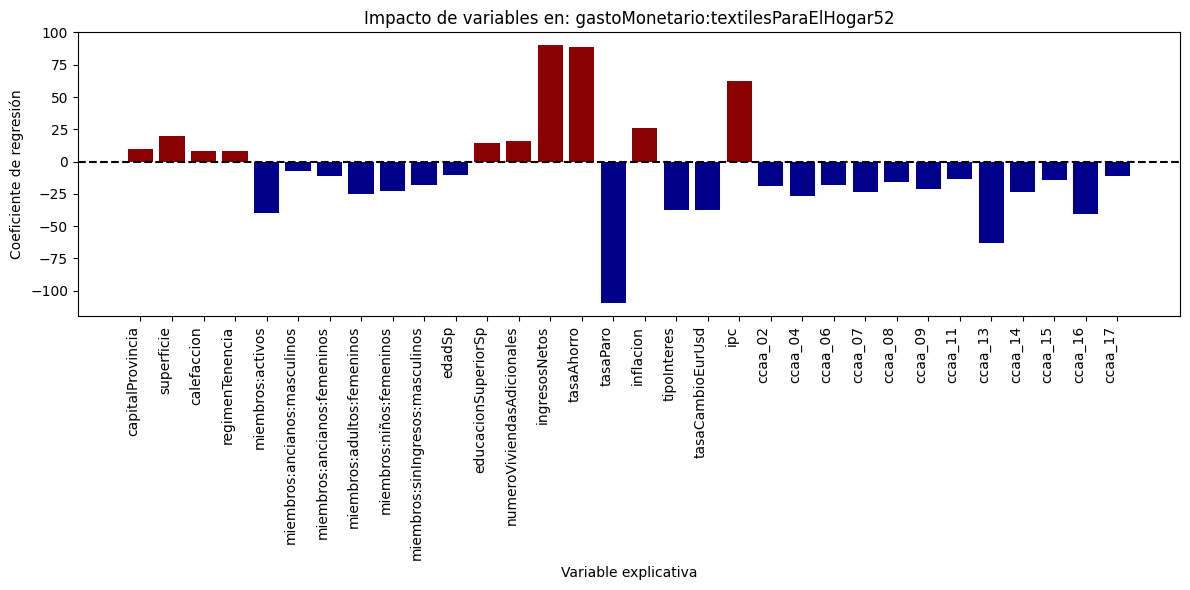

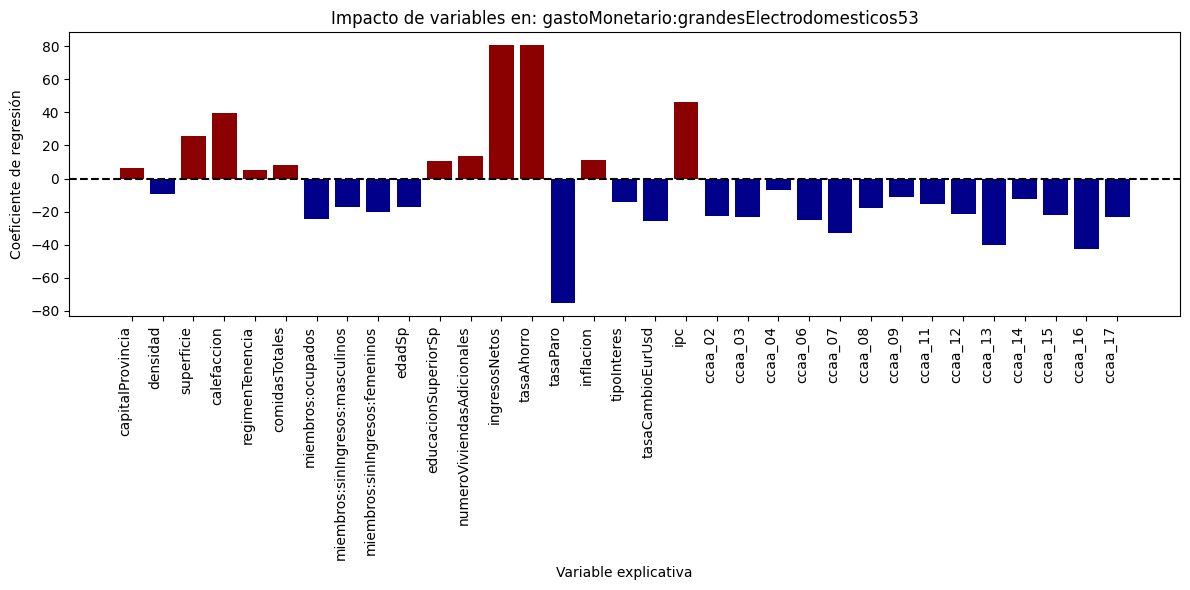

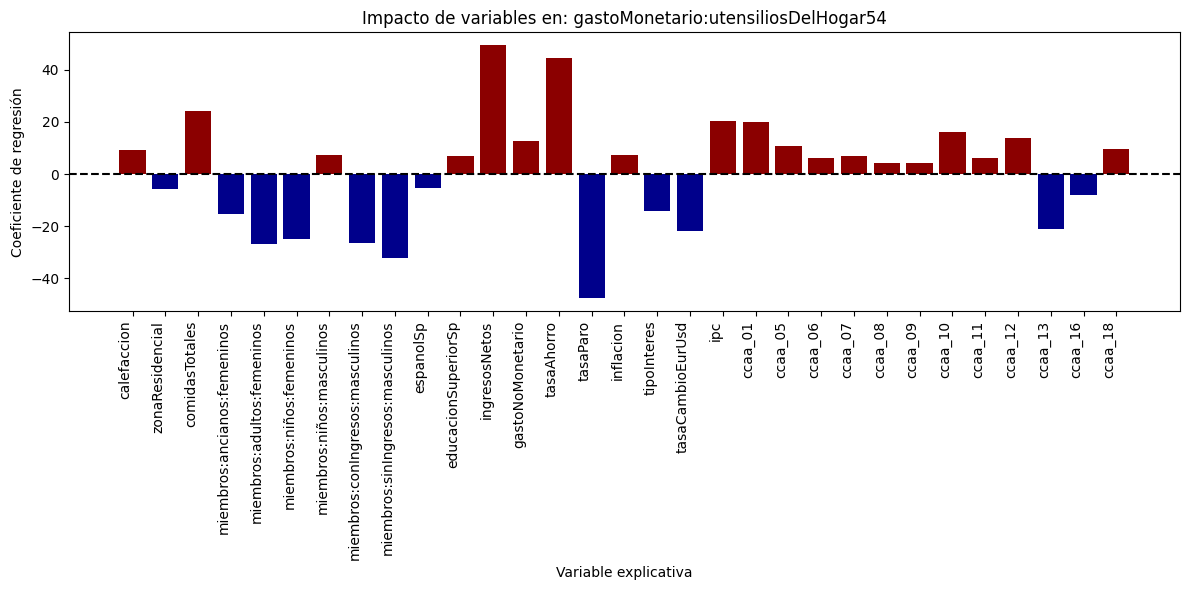

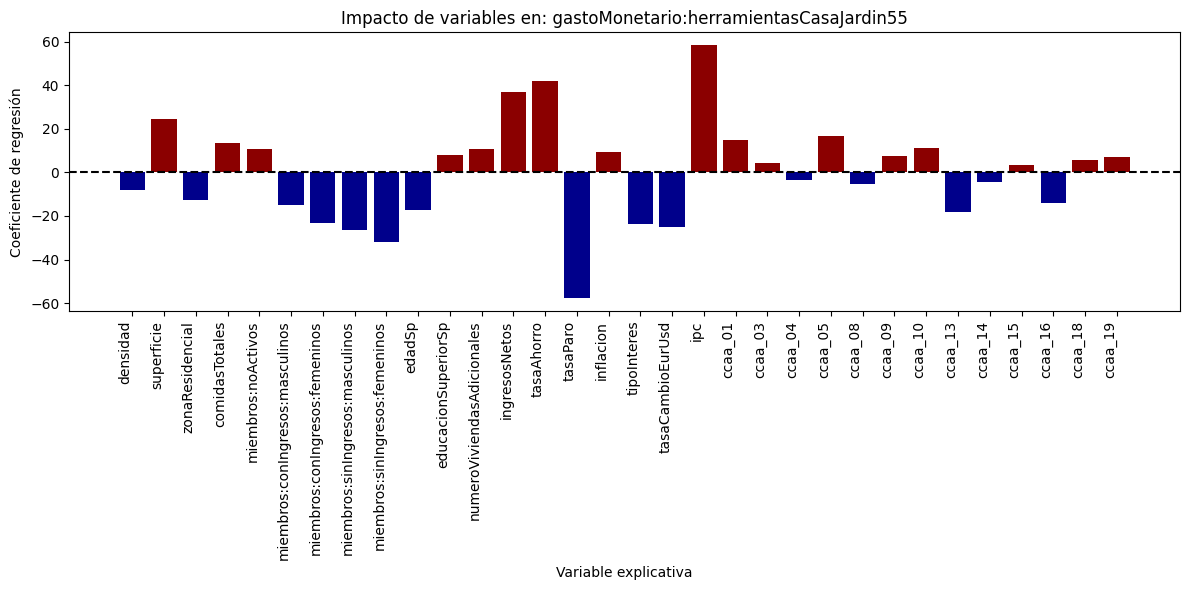

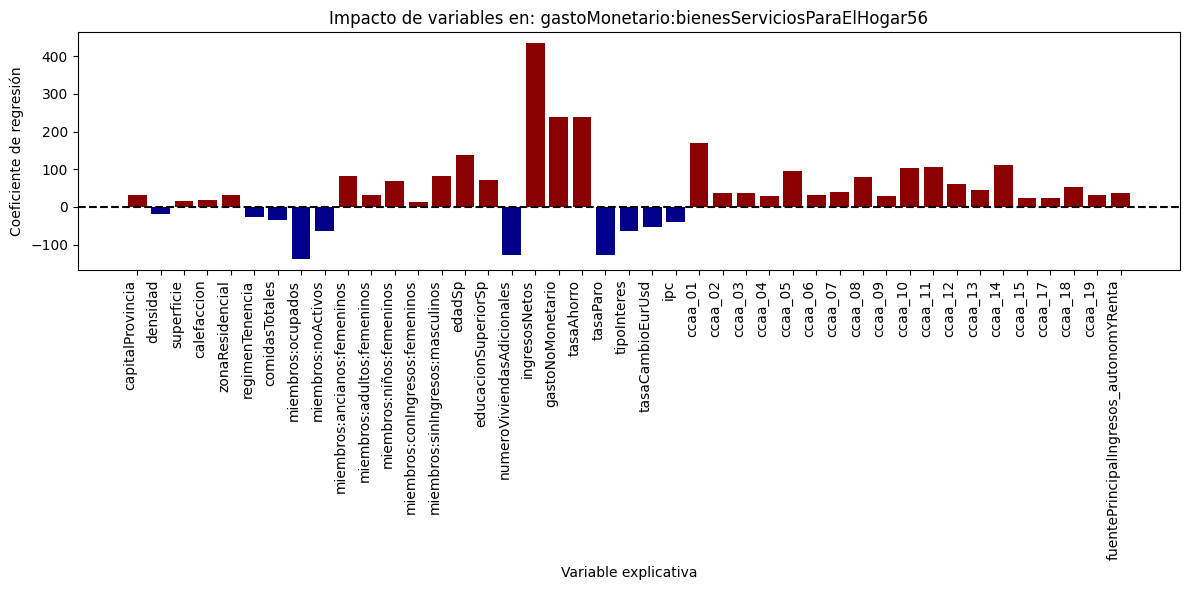

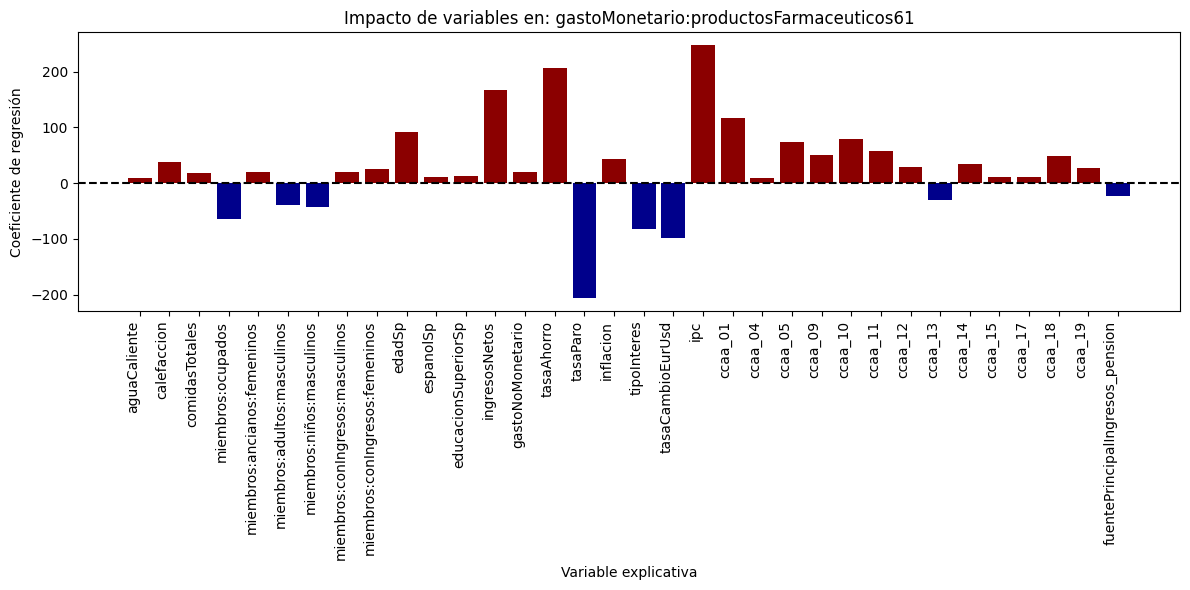

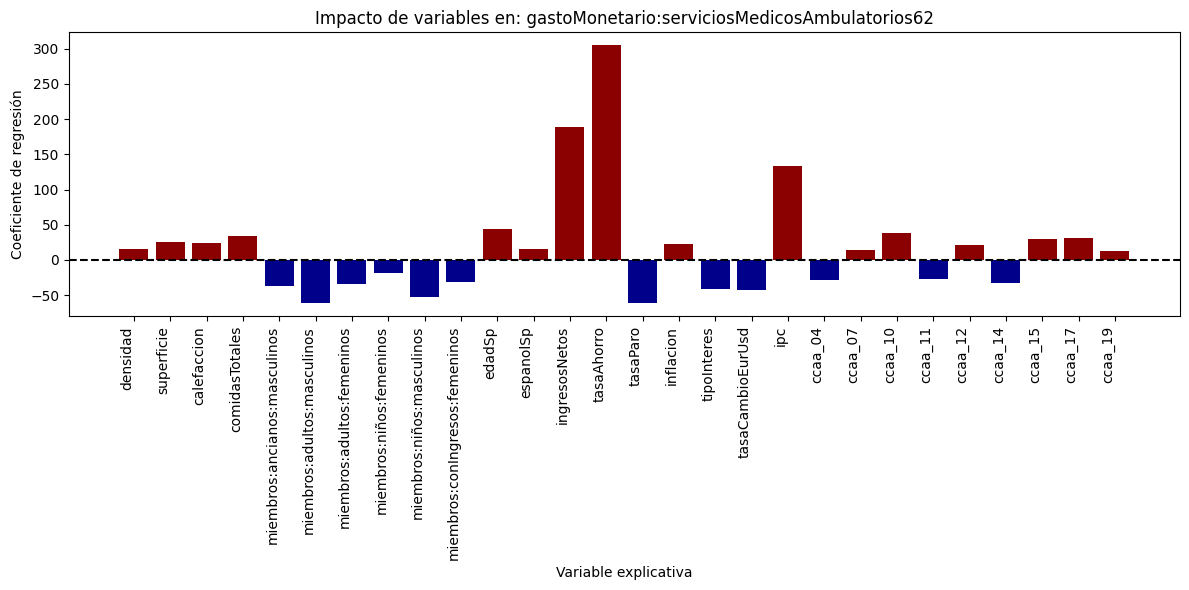

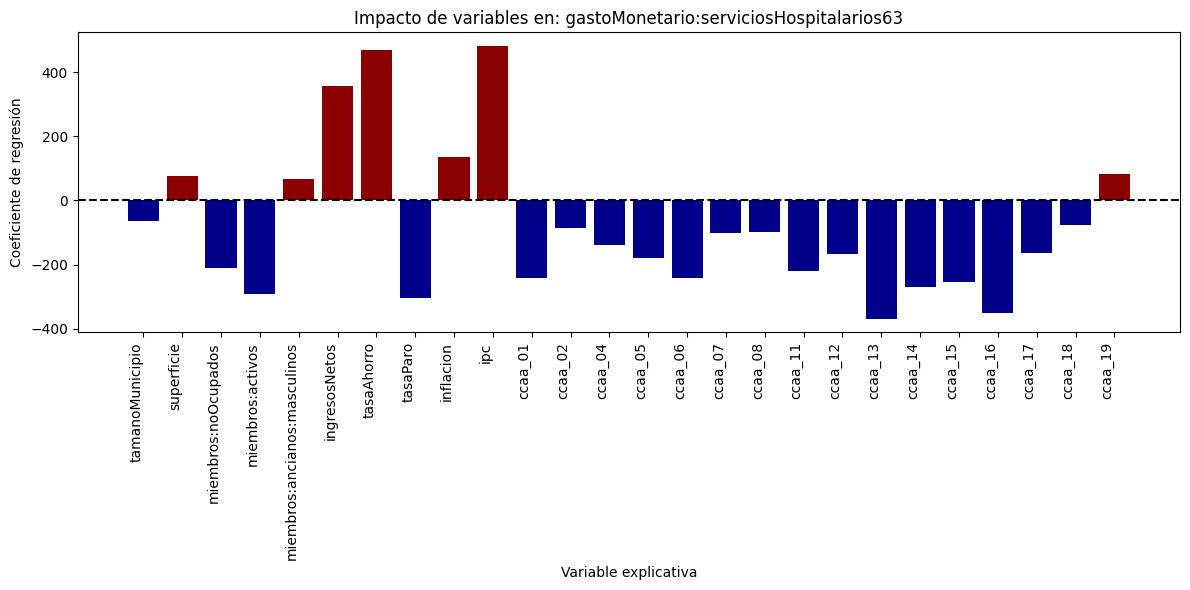

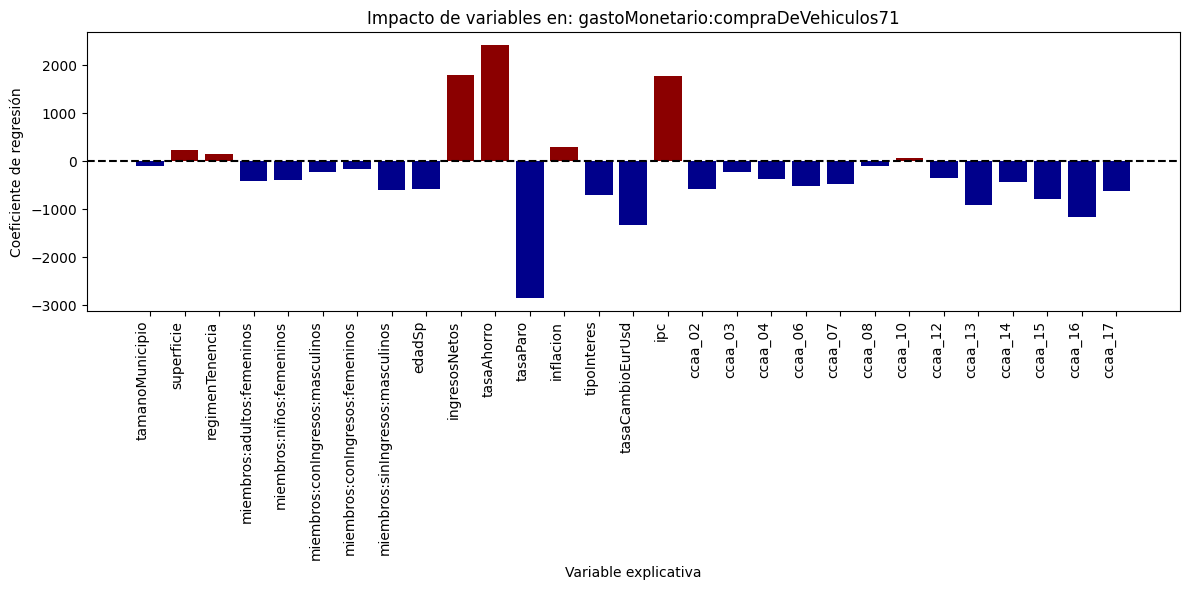

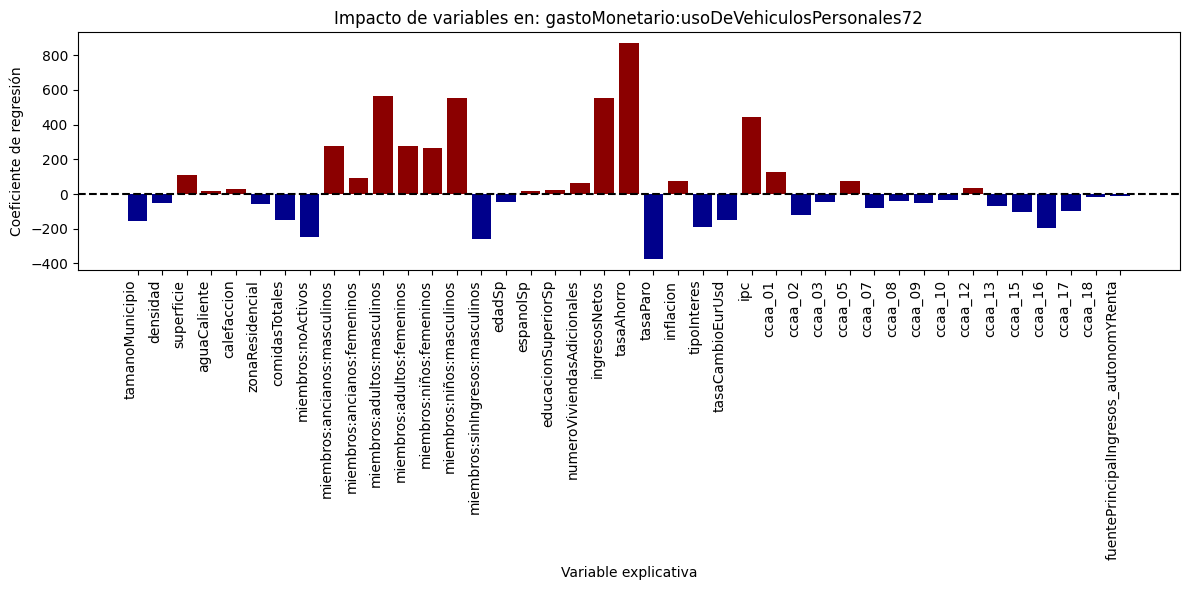

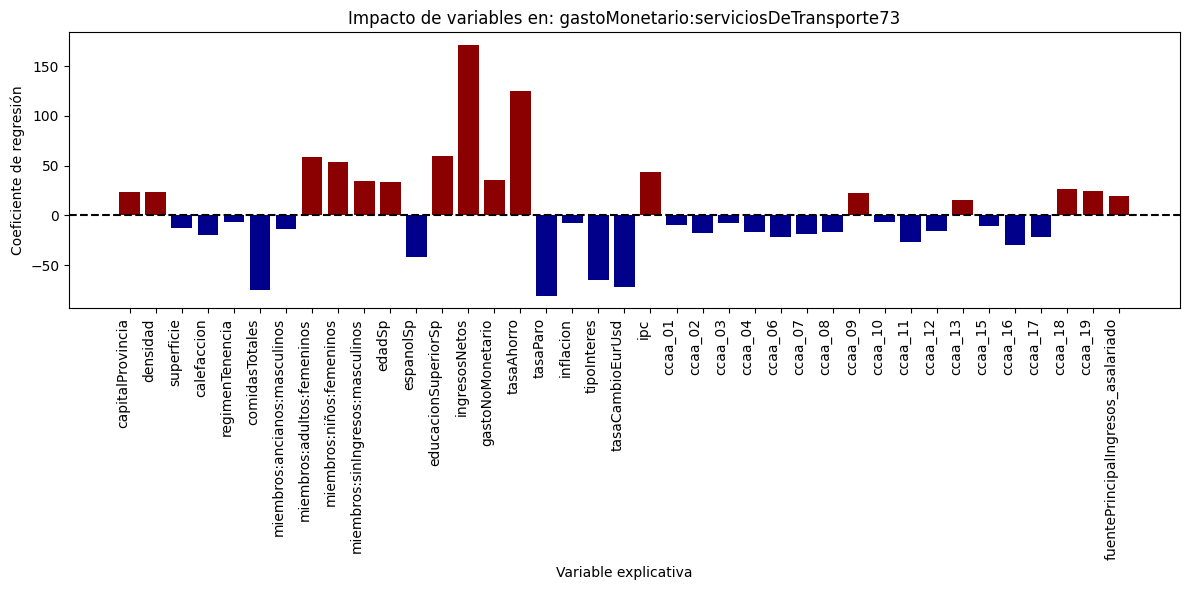

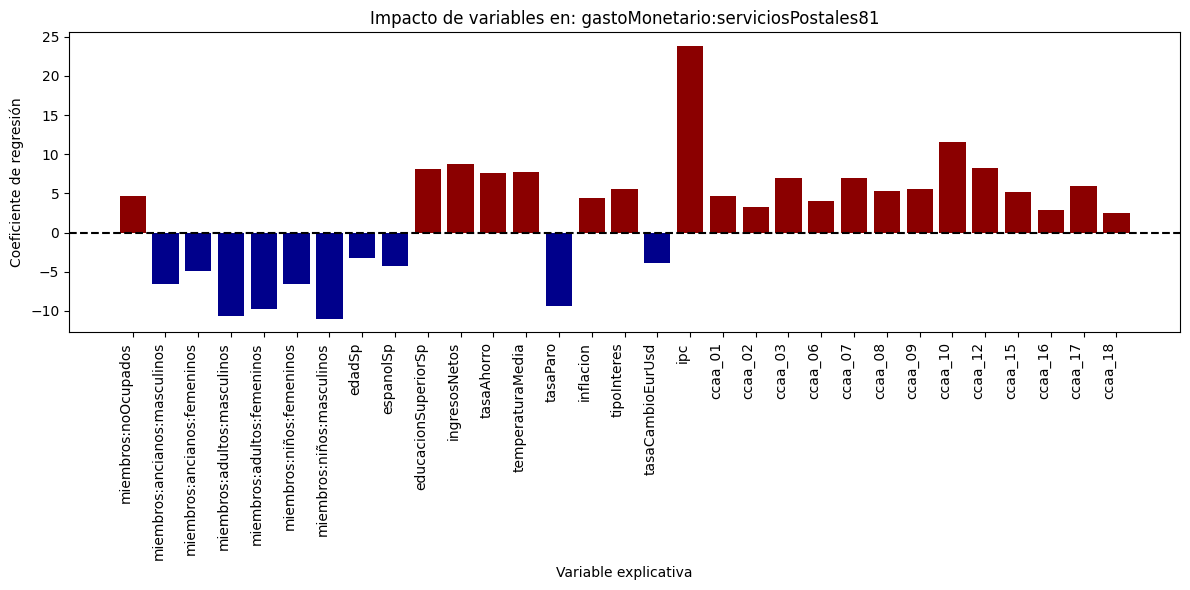

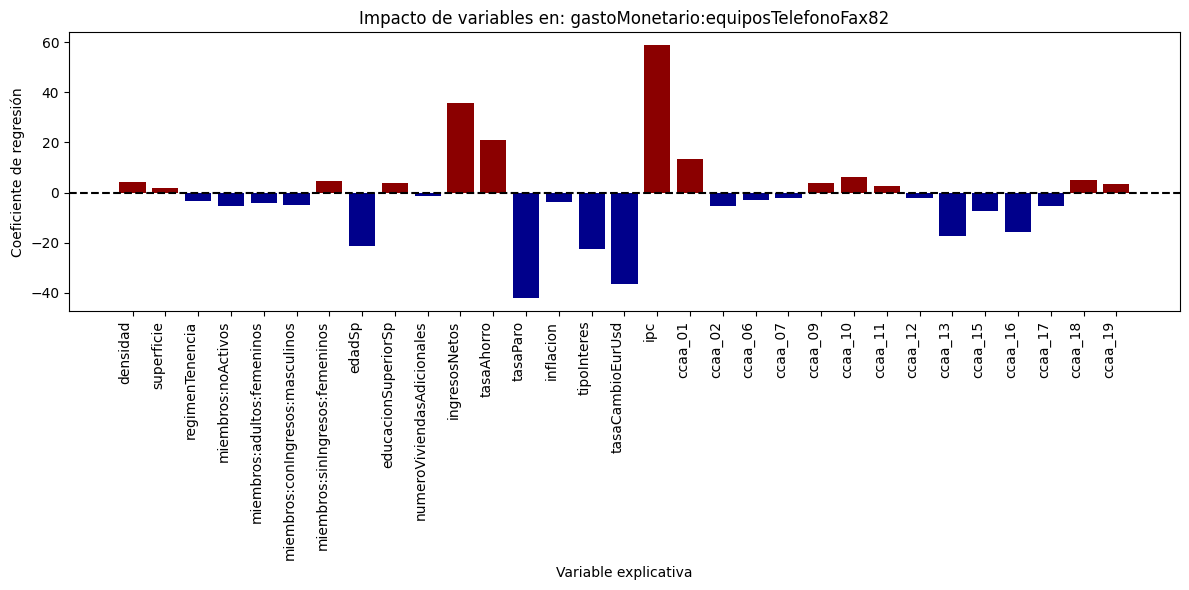

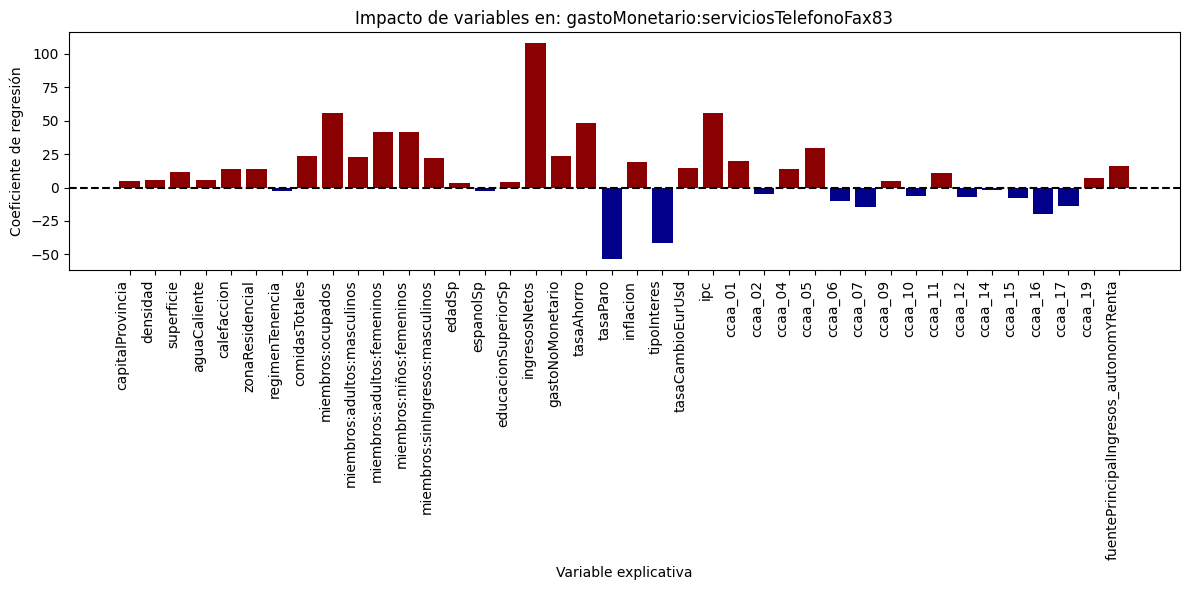

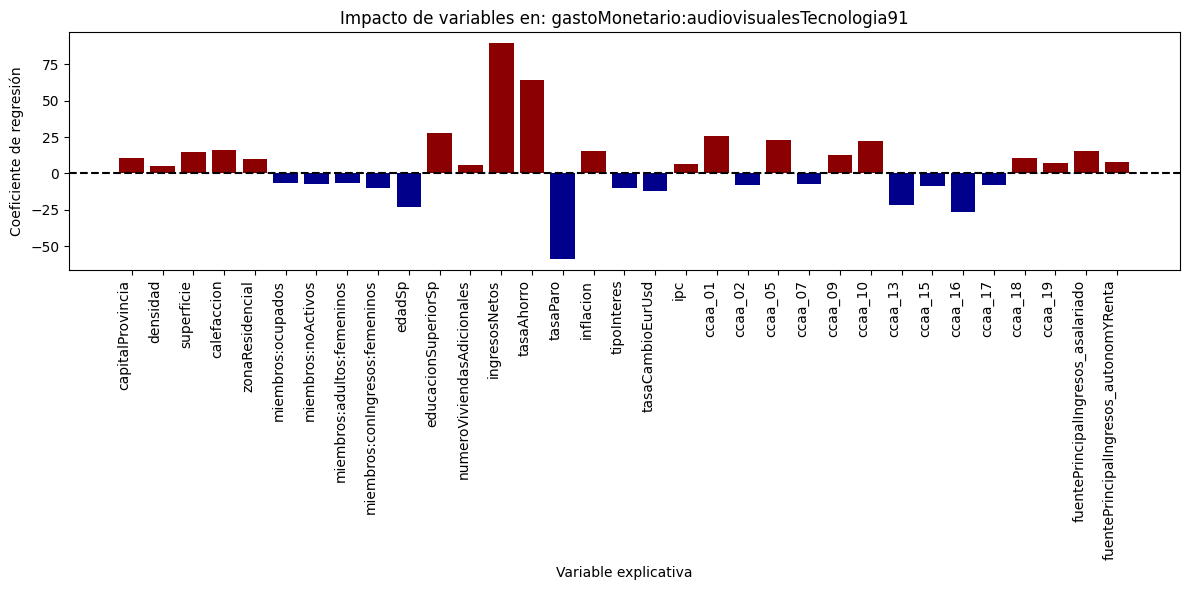

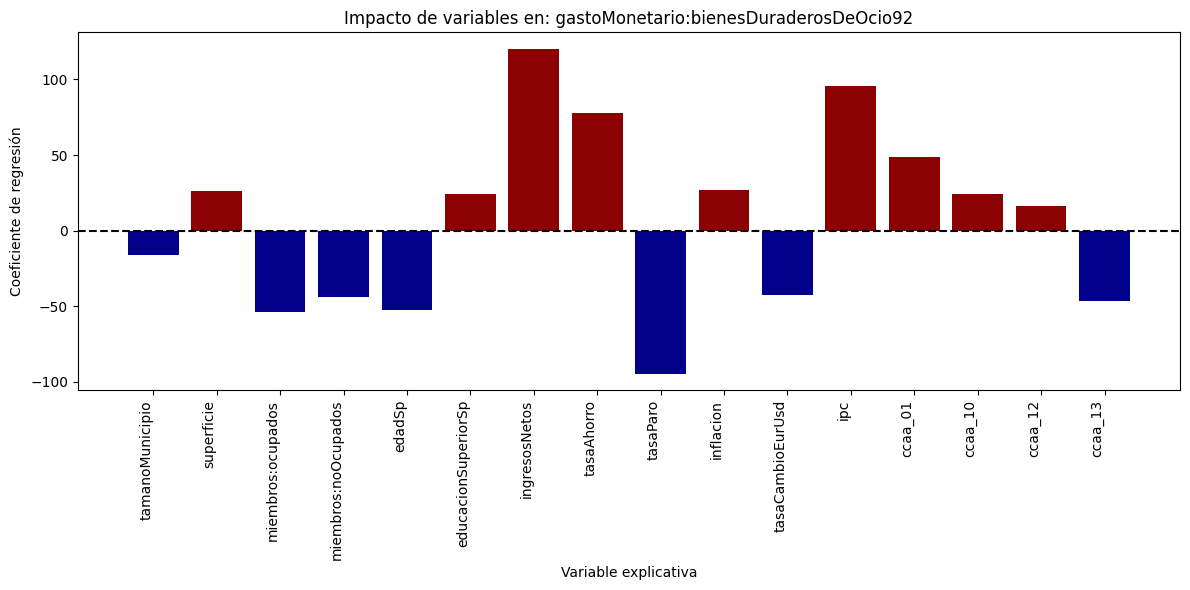

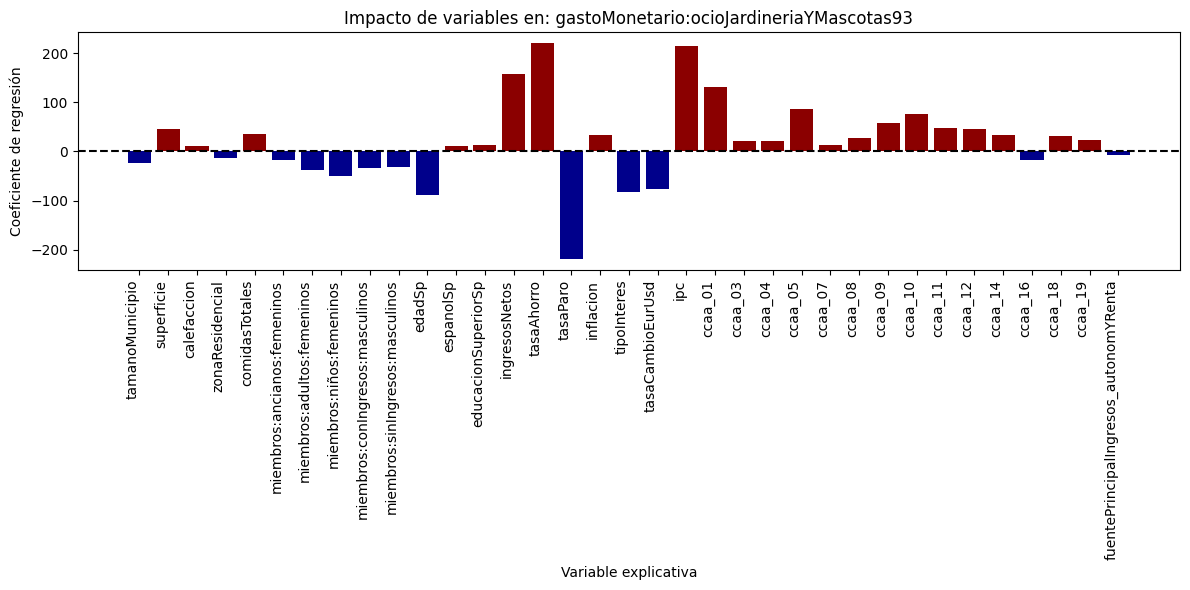

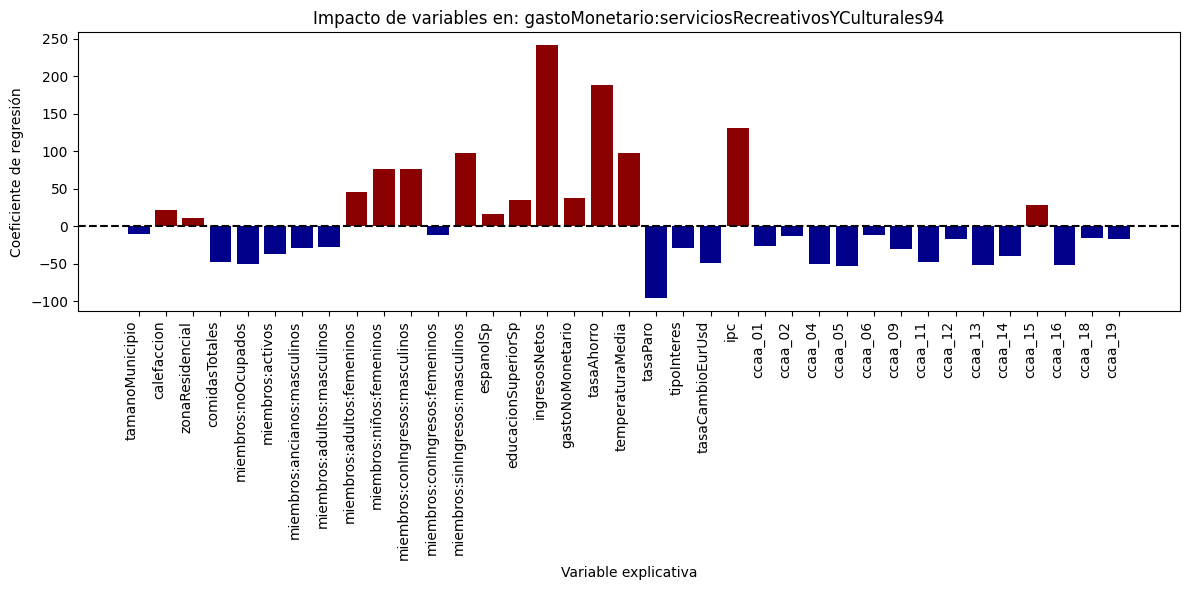

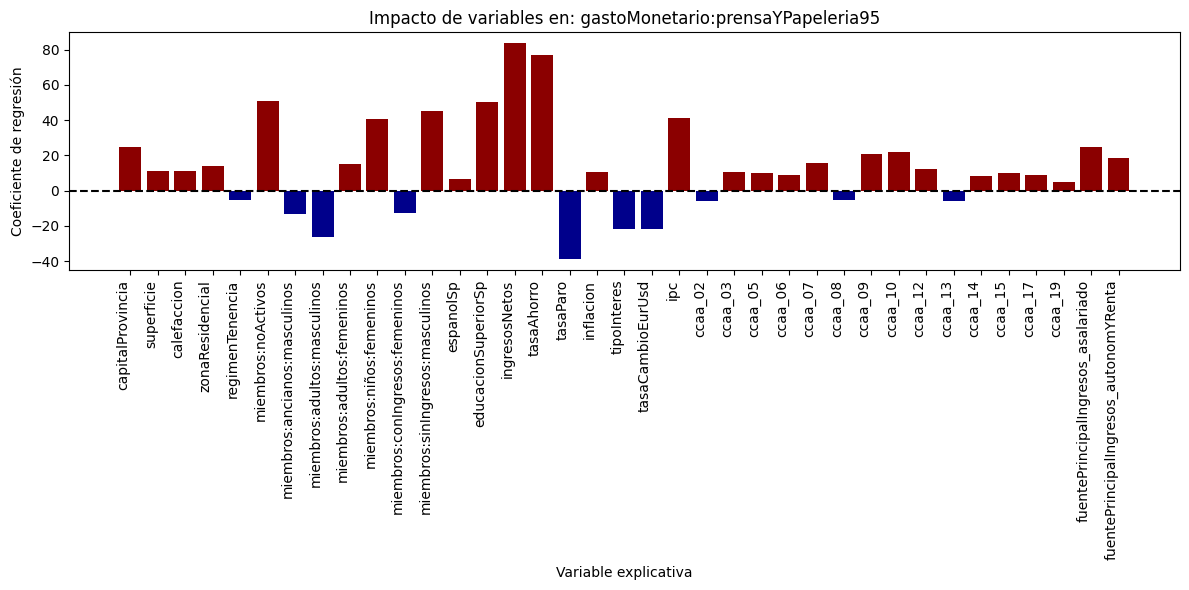

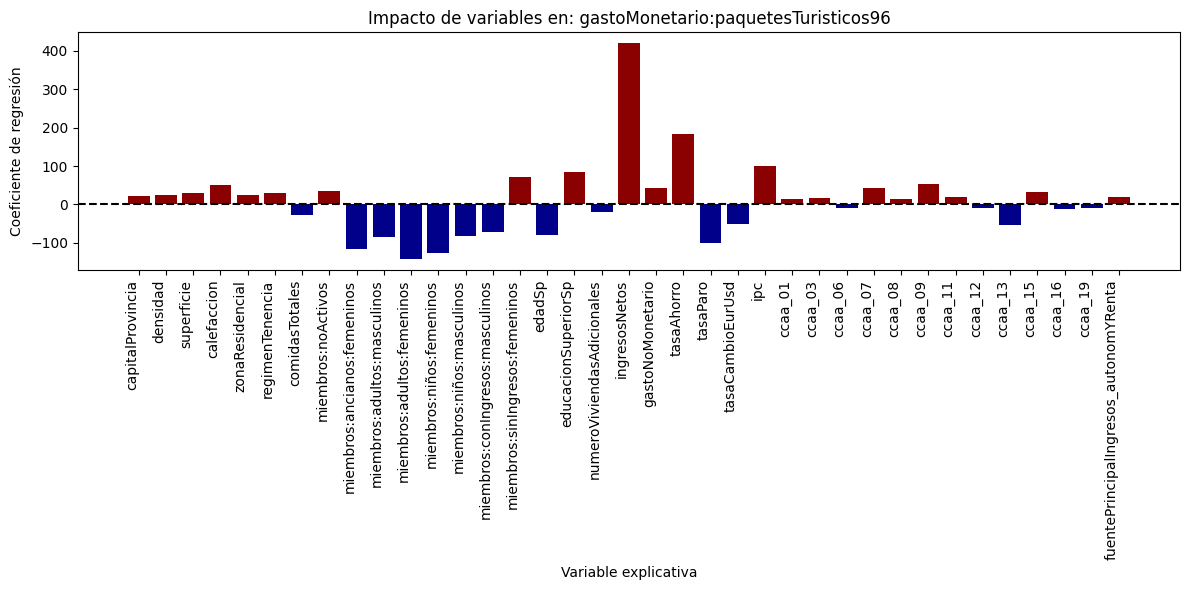

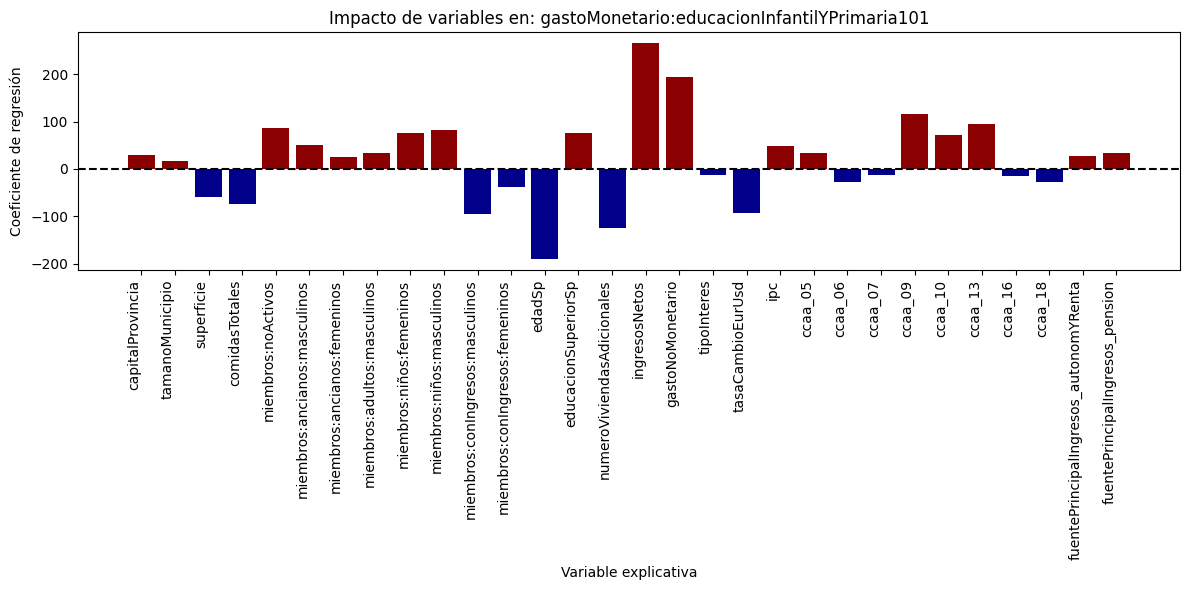

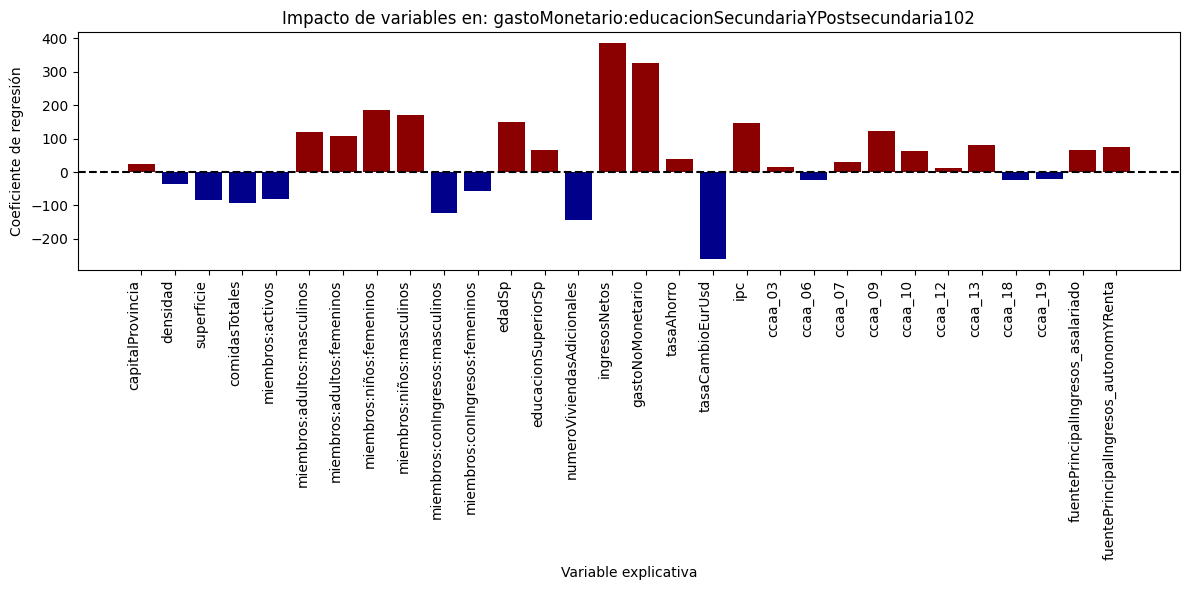

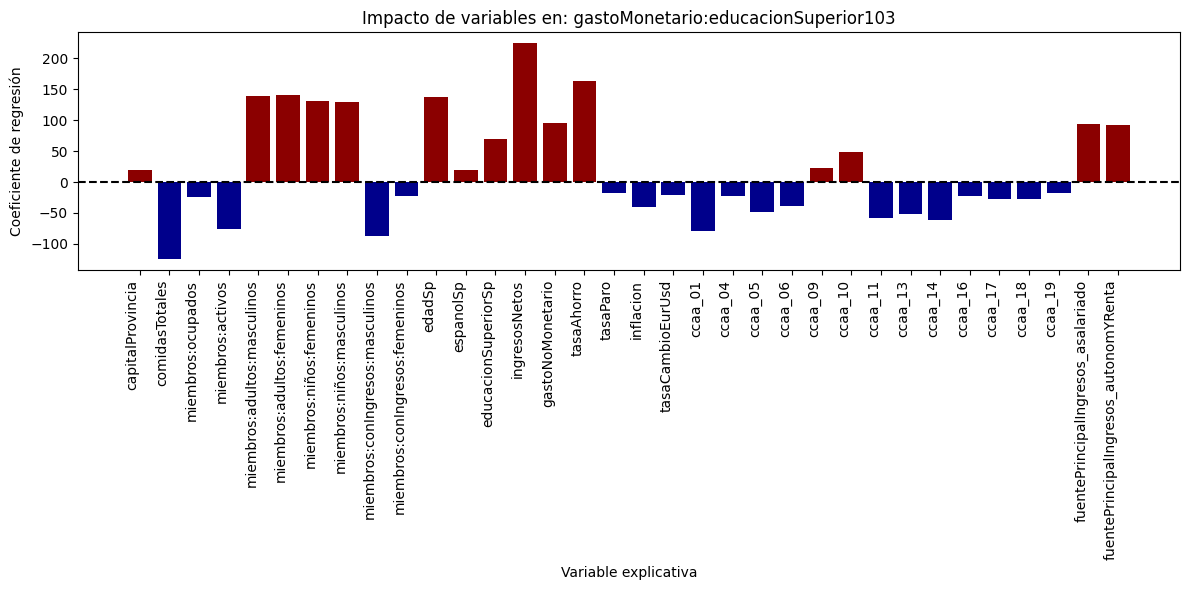

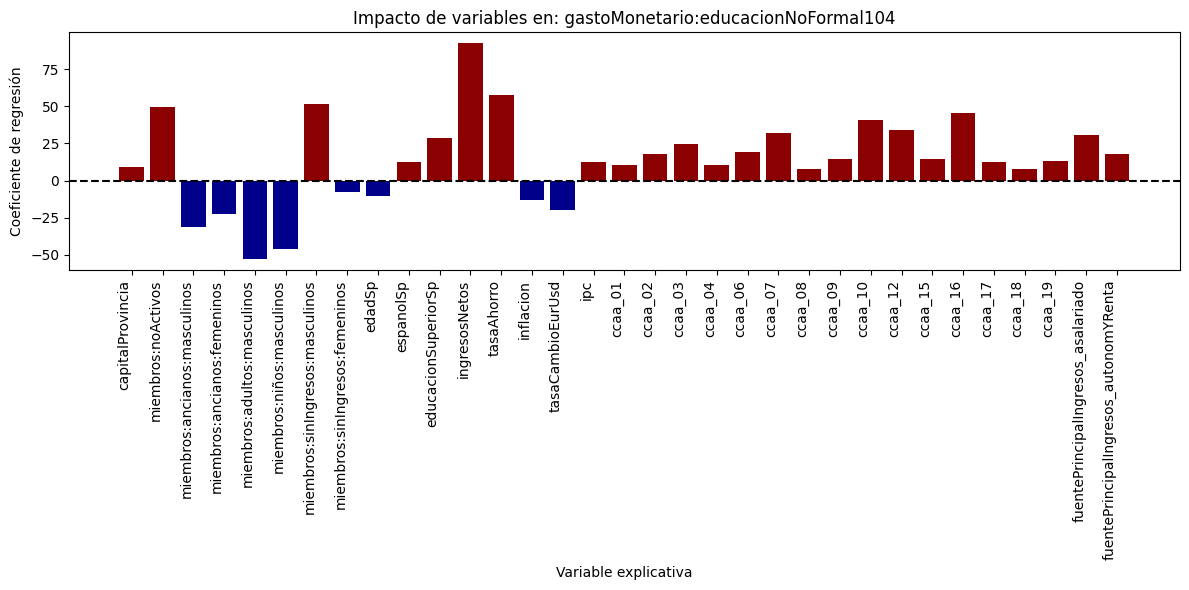

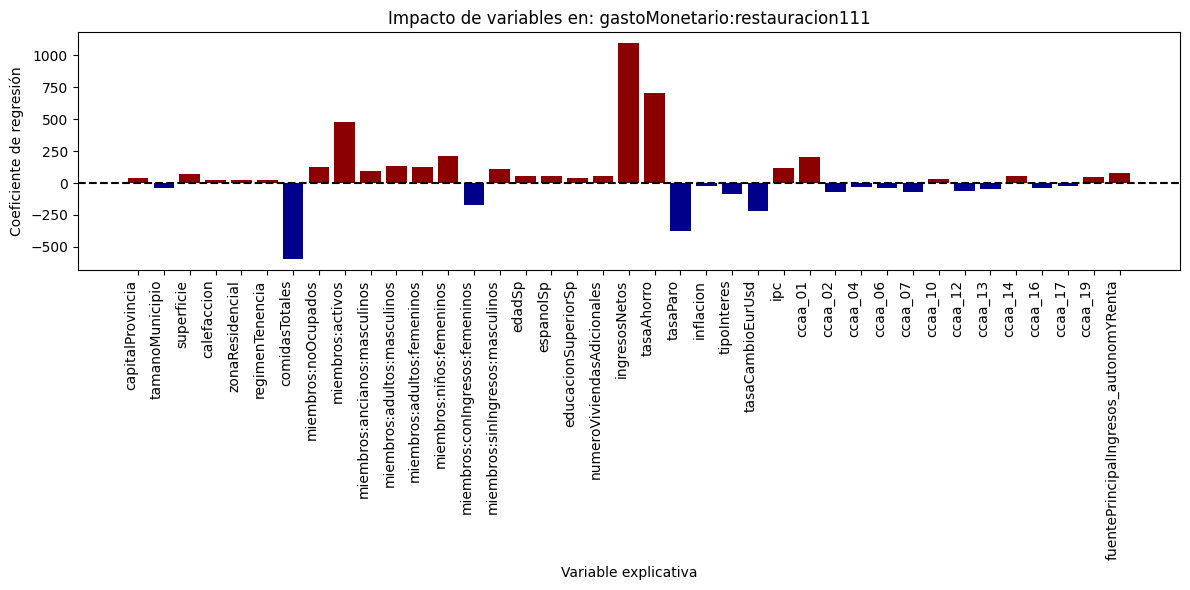

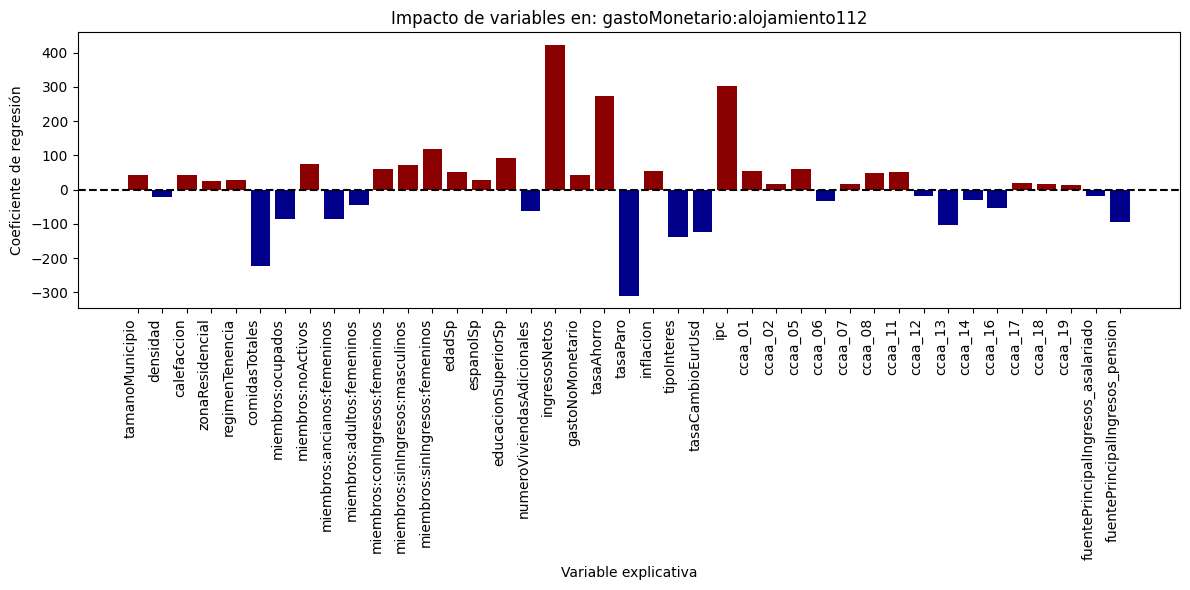

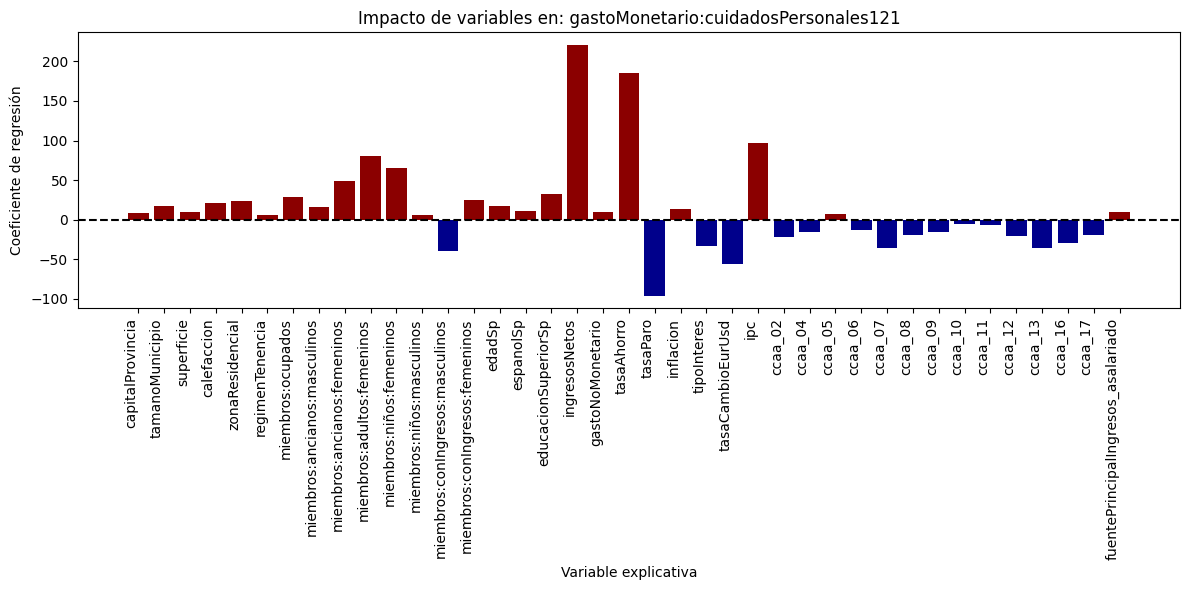

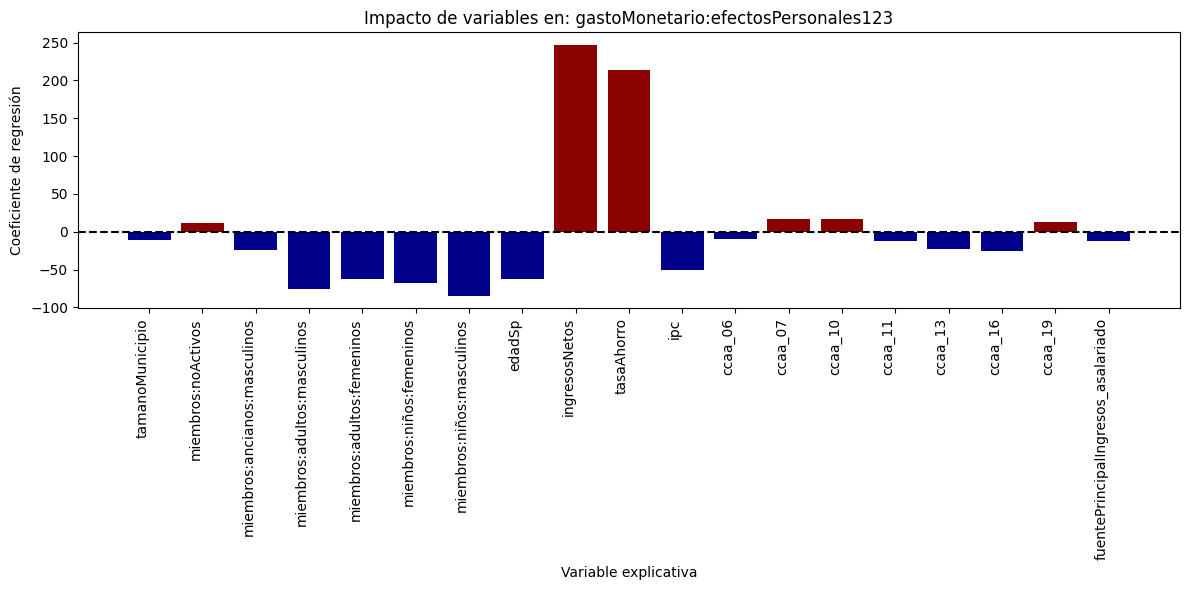

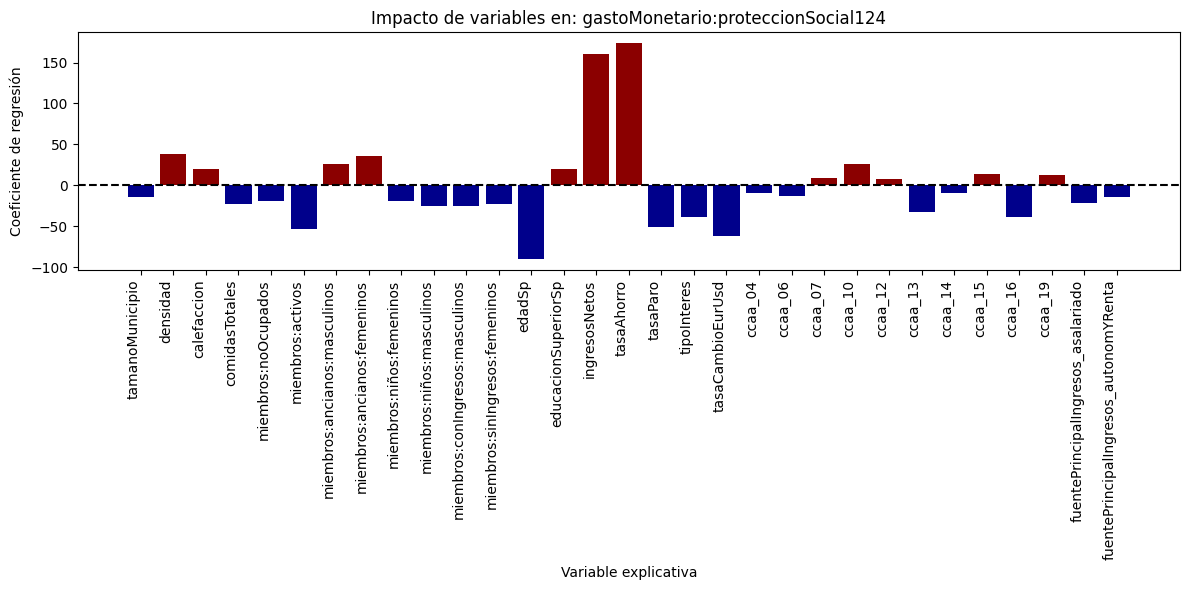

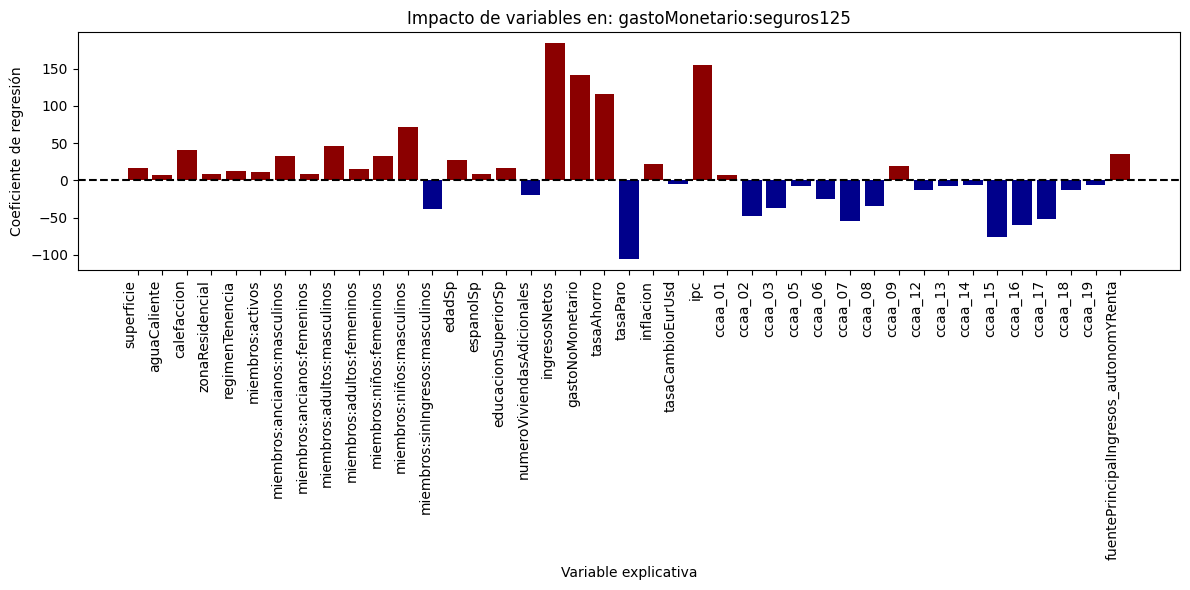

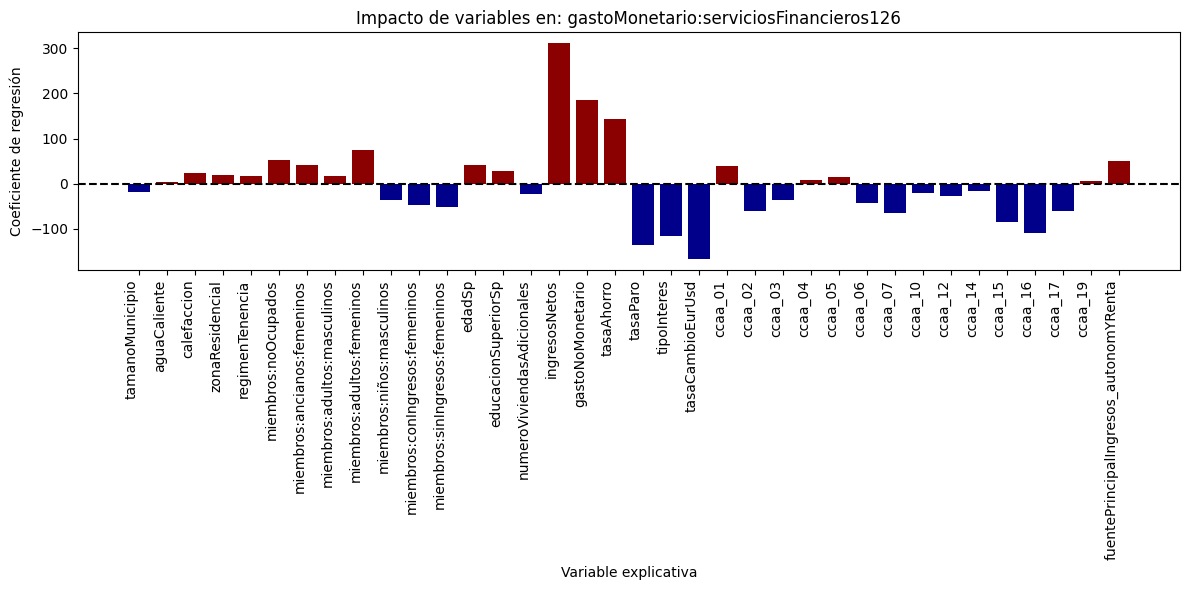

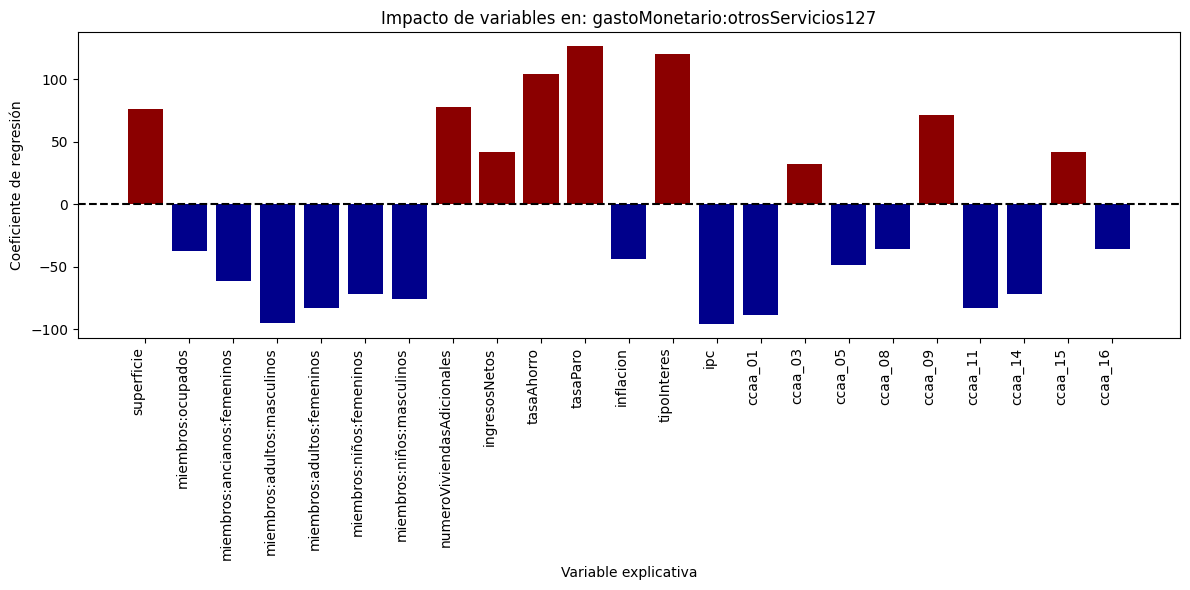

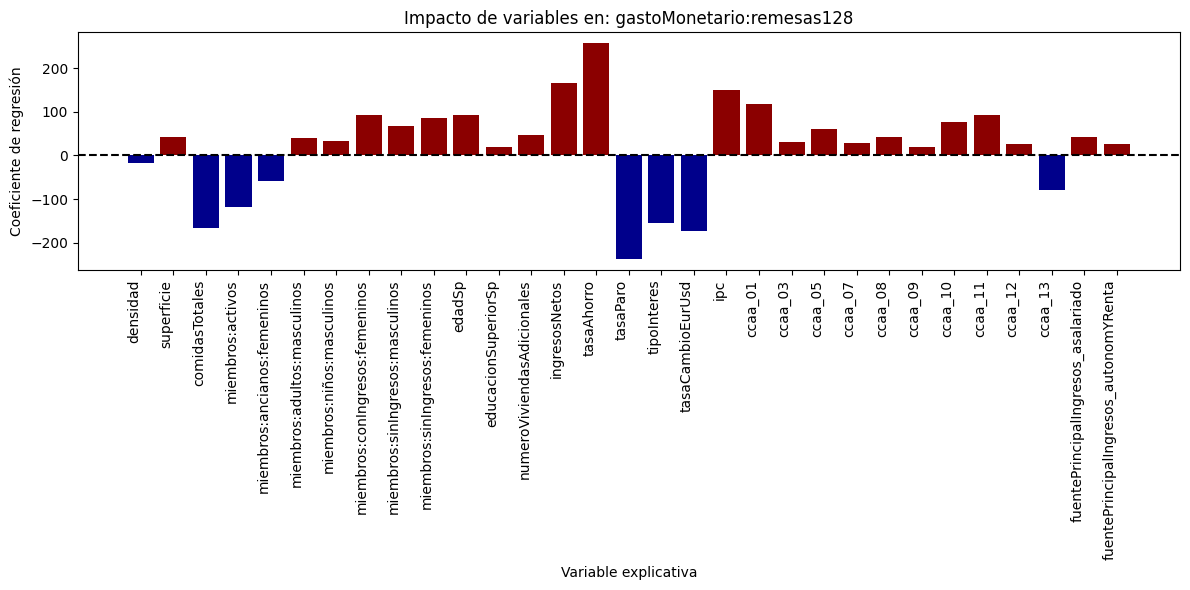

In [12]:
coefs_finales_without_const = coef_df[~coef_df["Variable"].str.contains("const")]

plot_coefficients_per_category(coefs_finales_without_const)

## 📐 Interpretación de un Modelo de Regresión Lineal Múltiple Normalizado

### 🔄 ¿Qué significa "normalizado"?

Cuando se normaliza un modelo, las variables se transforman para que tengan:

- **Media = 0**
- **Desviación estándar = 1**

Esta normalización se aplica a las variables explicativas (X), y opcionalmente también a la variable dependiente (y).

---

### 🎯 ¿Cómo se interpretan los coeficientes?

En un modelo normalizado, **los coeficientes se interpretan en términos de desviaciones estándar**:

> Un coeficiente indica cuántas desviaciones estándar cambia la variable dependiente por cada desviación estándar de cambio en la variable independiente, manteniendo las demás constantes.

---

### 💡 Ejemplo de interpretación

- Si el coeficiente de `IMPEXAC` es **+1.2**:
  - Entonces, **un aumento de 1 desviación estándar en los ingresos (`IMPEXAC`)** se asocia con un aumento de **1.2 desviaciones estándar en el gasto mensual**.

- Si el coeficiente de `NUMESTU` es **-0.5**:
  - Entonces, **un aumento de 1 desviación estándar en el número de estudiantes** se asocia con una **disminución de 0.5 desviaciones estándar en el gasto mensual**.

---

### ✅ Ventajas de la normalización

- Permite **comparar directamente el peso relativo de cada variable** en el modelo.
- Evita que variables con escalas más grandes dominen el modelo por su magnitud.
- Es útil en modelos con muchas variables heterogéneas (e.g. edad, ingresos, tamaño del hogar, etc.).

---

### ⚠️ Consideraciones

- Los coeficientes ya no están en unidades interpretables (euros, años, personas...).
- Solo tiene sentido si se desea analizar **la importancia relativa** de las variables, no el efecto real en magnitudes absolutas.


### Vemos un mapa de calor con el impacto real de cada variable en cada supercategoría

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap_sign_colors_scaled(coefficients_df):
    # ——— 1) Preparar summary igual que antes ———
    codes = (
        coefficients_df[['Gasto']]
        .drop_duplicates()
        .assign(
            Codigo=lambda d: (
                d['Gasto']
                .str.extract(r'(\d+)$')[0]
                .astype(int, errors='ignore')
            )
        )
    )
    df = coefficients_df.merge(codes, on='Gasto', how='left')
    summary = df.pivot_table(
        index="Variable",
        columns="Codigo",
        values="Coeficiente"
    )
    # ordenar columnas numéricamente
    cols = sorted(summary.columns, key=int)
    summary = summary[cols]

    # ——— 2) Normalizar cada columna por su valor absoluto máximo ———
    max_per_col = summary.abs().max(axis=0)
    summary_norm = summary.divide(max_per_col, axis=1)

    # ——— 3) Dibujar heatmap con color por SIGNO+MAG relativa  ———
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    fig, ax = plt.subplots(figsize=(22, 14))

    sns.heatmap(
        summary_norm,           # datos normalizados entre -1 y 1
        cmap=cmap,
        center=0,
        vmin=-1,                # simétrico
        vmax=+1,
        linewidths=0.5,
        linecolor="grey",
        cbar_kws={"label": "Magnitud relativa\n(-1 a +1)"},
        annot=summary.abs(),    # anotamos con valor absoluto REAL
        fmt=".2f",
        annot_kws={"size": 8},
        ax=ax
    )

    # ——— 4) Ajustes de ejes y márgenes ———
    ax.set_title(
        "Coeficientes (|valor|) · Color = signo/magnitud relativa",
        fontsize=14, pad=20
    )
    ax.set_xlabel("Código de Categoría de Gasto", fontsize=12)
    ax.set_ylabel("Variable", fontsize=12)
    ax.tick_params(axis='y', labelsize=8)
    plt.xticks(rotation=45, ha="right")

    # más espacio a la izquierda para etiquetas largas
    plt.subplots_adjust(left=0.30, bottom=0.15)
    plt.tight_layout()
    plt.show()


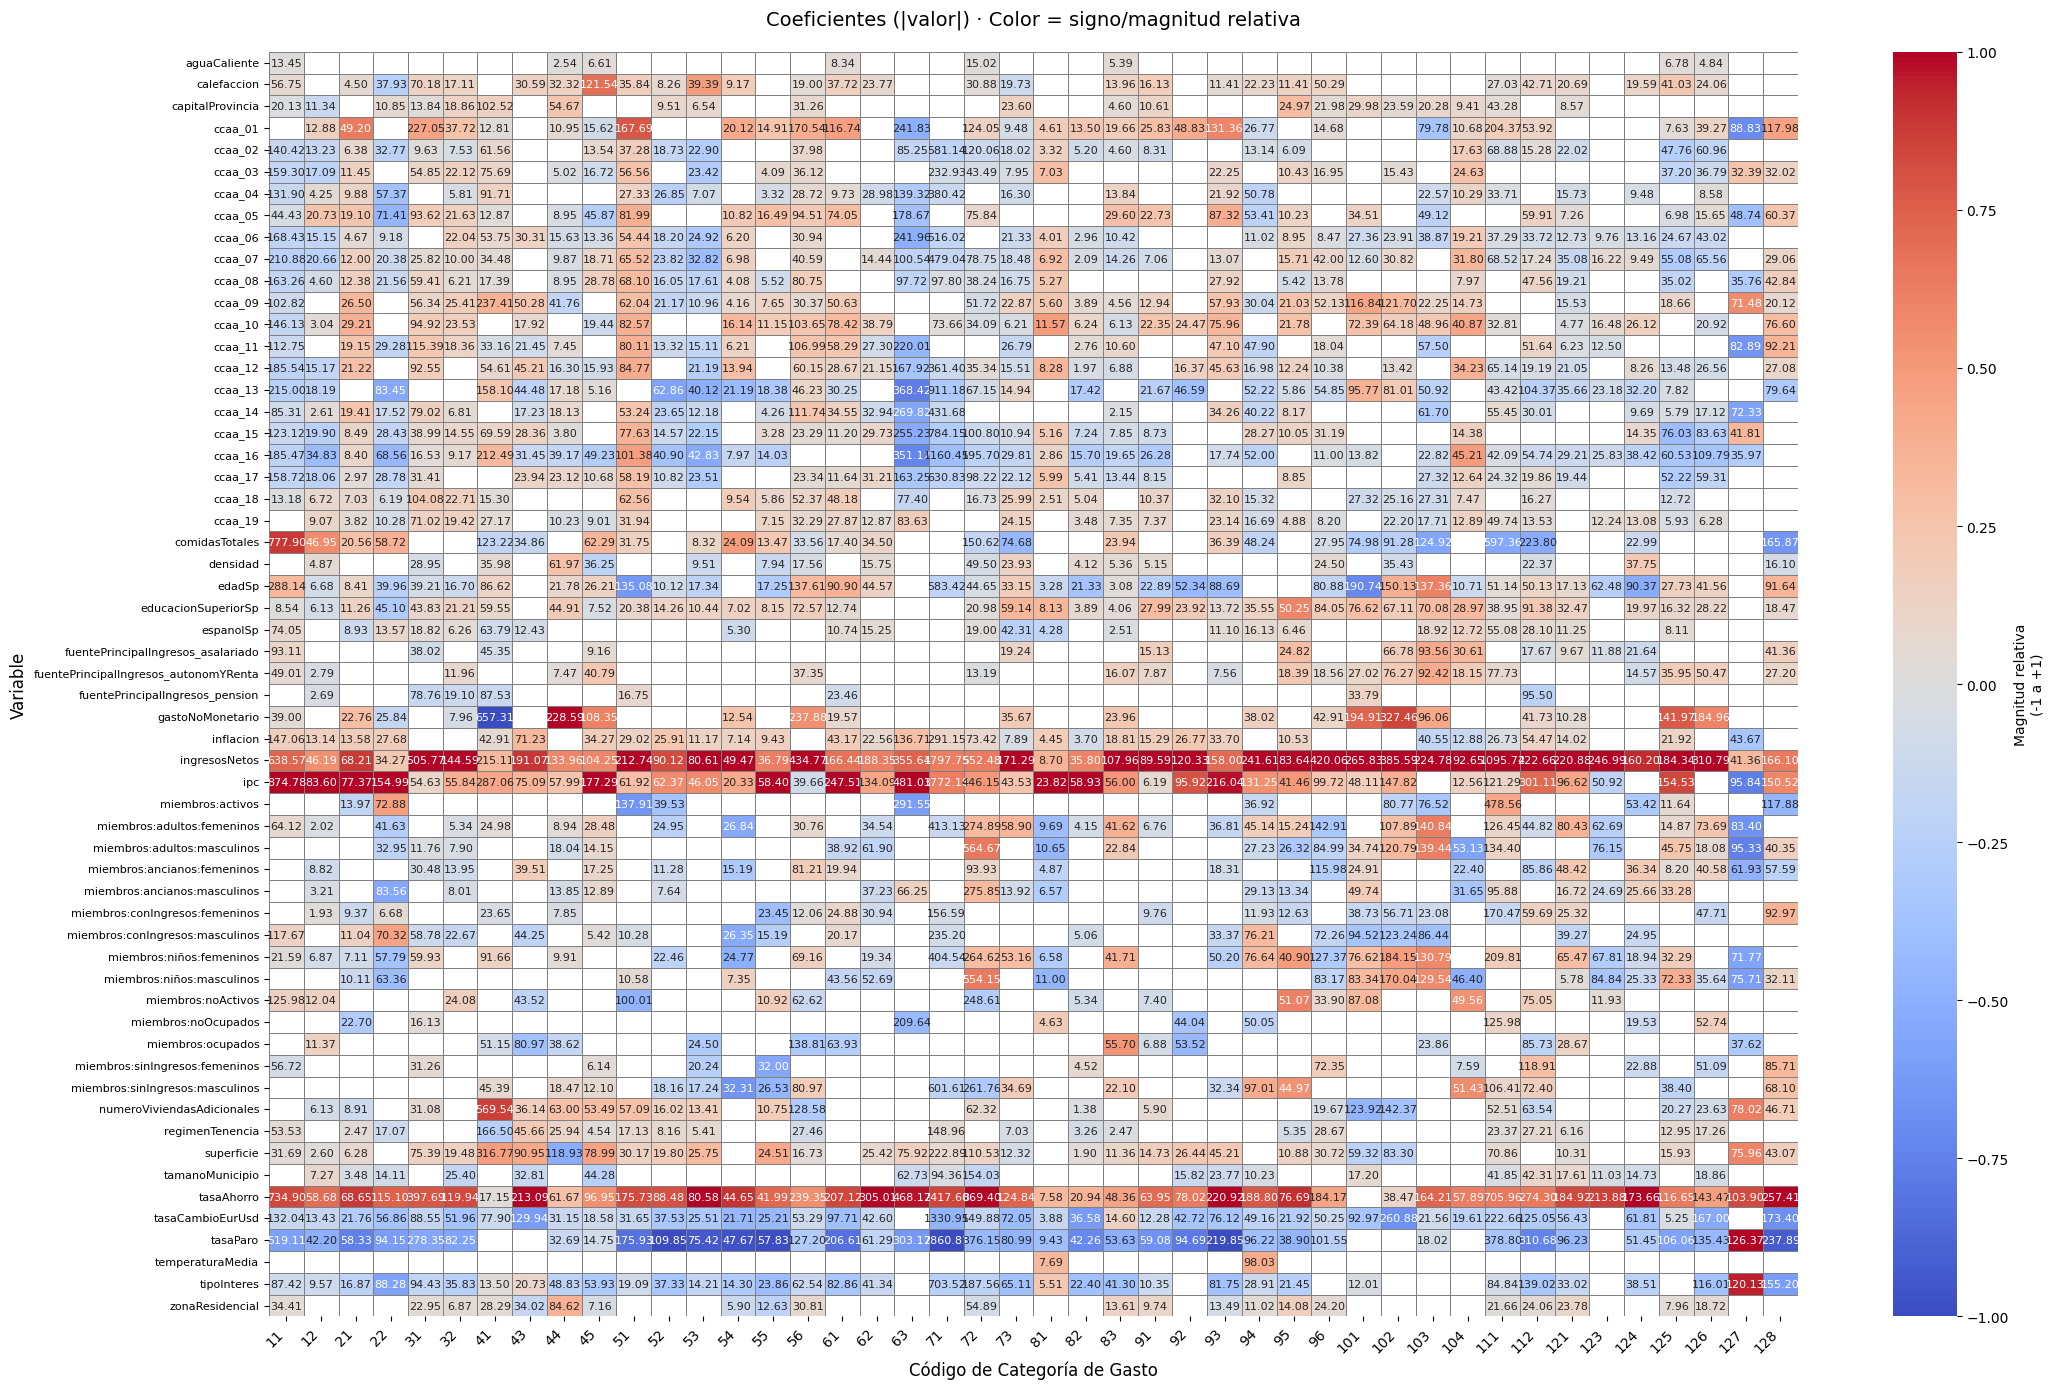

In [35]:
plot_heatmap_sign_colors_scaled(coefs_finales_without_const)

In [31]:
# Convert the coefficients DataFrame to a more readable format
coefs_finales_pivot = coef_df.pivot(index="Variable", columns="Gasto", values="Coeficiente")
coefs_finales_pivot

Gasto                                  gastoMonetario:alojamiento112  \
Variable                                                               
aguaCaliente                                                     NaN   
calefaccion                                                42.709330   
capitalProvincia                                                 NaN   
ccaa_01                                                    53.918615   
ccaa_02                                                    15.281981   
ccaa_03                                                          NaN   
ccaa_04                                                          NaN   
ccaa_05                                                    59.912518   
ccaa_06                                                   -33.724885   
ccaa_07                                                    17.242510   
ccaa_08                                                    47.560474   
ccaa_09                                                          NaN   
ccaa_10                                                          NaN   
ccaa_11                                                    51.636316   
ccaa_12                                                   -19.190754   
ccaa_13                                                  -104.370403   
ccaa_14                                                   -30.009736   
ccaa_15                                                          NaN   
ccaa_16                                                   -54.736151   
ccaa_17                                                    19.857695   
ccaa_18                                                    16.271925   
ccaa_19                                                    13.533340   
comidasTotales                                           -223.800798   
densidad                                                  -22.369562   
edadSp                                                     50.127888   
educacionSuperiorSp                                        91.375017   
espanolSp                                                  28.099731   
fuentePrincipalIngresos_asalariado                        -17.665959   
fuentePrincipalIngresos_autonomYRenta                            NaN   
fuentePrincipalIngresos_pension                           -95.499656   
gastoNoMonetario                                           41.732144   
inflacion                                                  54.469219   
ingresosNetos                                             422.662128   
ipc                                                       301.107709   
miembros:activos                                                 NaN   
miembros:adultos:femeninos                                -44.817276   
miembros:adultos:masculinos                                      NaN   
miembros:ancianos:femeninos                               -85.863546   
miembros:ancianos:masculinos                                     NaN   
miembros:conIngresos:femeninos                             59.687760   
miembros:conIngresos:masculinos                                  NaN   
miembros:niños:femeninos                                         NaN   
miembros:niños:masculinos                                        NaN   
miembros:noActivos                                         75.051487   
miembros:noOcupados                                              NaN   
miembros:ocupados                                         -85.731063   
miembros:sinIngresos:femeninos                            118.912721   
miembros:sinIngresos:masculinos                            72.399135   
numeroViviendasAdicionales                                -63.537542   
regimenTenencia                                            27.205488   
superficie                                                       NaN   
tamanoMunicipio                                            42.311015   
tasaAhorro                                                274.302766   
tasaCambioEurUsd                        

# Análisis de Coeficientes OLS por Categoría de Gasto

Este análisis se basa en la matriz de coeficientes de modelos OLS aplicados a distintas **categorías de gasto**. Cada columna representa una categoría, y cada fila es una variable explicativa. Los valores indican la **magnitud y dirección del impacto** de esa variable sobre el gasto, manteniendo constantes las demás.

---

## 📊 Interpretación General

- **Coeficientes positivos**: sugieren que un aumento en la variable explicativa está asociado con un mayor gasto en esa categoría.
- **Coeficientes negativos**: indican que un aumento en la variable reduce el gasto en esa categoría.
- **Valores faltantes (`NaN`)**: la variable no resultó significativa o fue eliminada por multicolinealidad.

---

## 🔍 1. Variables con impacto sistemático

### 🏦 `Tipo_Interes`
- Presente en casi todas las categorías con coeficientes positivos.
- Altamente significativo en:
  - `ALQUILERES_IMPUTADOS`: +26.06
  - `ALQUILERES_REALES`: +20.54
  - `SERVICIOS_HOSPITALARIOS`: +21.85
- 📌 **Interpretación**: un aumento de los tipos de interés se asocia con un mayor gasto imputado y real en vivienda. Puede reflejar tanto un mayor coste de oportunidad de la vivienda como una mayor presión económica en hogares con hipoteca.

### 📉 `Tasa_Paro`
- Fuertemente negativo en gastos estructurales:
  - `ALQUILERES_IMPUTADOS`: -61.64
  - `ALQUILERES_REALES`: -34.90
- 📌 **Interpretación**: el desempleo tiene un impacto claro sobre el gasto, reduciendo notablemente el consumo en vivienda y otras categorías.

---

## 👨‍👩‍👧‍👦 2. Estructura del Hogar y Demografía

### `NUMPERI` (número de personas en el hogar)
- Negativo en:
  - `ALQUILERES_REALES`: -7.56
  - `ALQUILERES_IMPUTADOS`: -6.33
- Positivo en:
  - `CALZADO`: +1.68
  - `VEHÍCULOS_PERSONALES`: +4.45
- 📌 **Interpretación**: hogares grandes diluyen el gasto individual en vivienda, pero aumentan el consumo en necesidades grupales.

### `TAMAMU` (tamaño del municipio)
- Positivo en:
  - `ALQUILERES_IMPUTADOS`: +12.42
  - `ALQUILERES_REALES`: +16.82
  - `VEHÍCULOS_PERSONALES`: -10.47 (negativo)
- 📌 **Interpretación**: los municipios grandes implican mayor gasto en vivienda y menor dependencia del transporte privado.

### `ZONARES` (zona residencial)
- Positivo en vivienda:
  - `ALQUILERES_IMPUTADOS`: +13.51
  - `ALQUILERES_REALES`: +13.87
- 📌 **Interpretación**: residir en ciertas zonas eleva significativamente el coste (o el gasto declarado) en vivienda.

---

## 🎓 3. Educación y situación laboral

### `EDUC_SUPERIOR`
- Coeficientes altos y positivos en múltiples categorías:
  - `ALQUILERES_IMPUTADOS`: +12.08
  - `ALQUILERES_REALES`: +13.69
  - `ALOJAMIENTO`: +10.92
- 📌 **Interpretación**: mayor nivel educativo se asocia con mayor capacidad de gasto y posiblemente con patrones de consumo más intensivos.

### `OCUSP` (persona ocupada)
- Positivo en:
  - `ALQUILERES_REALES`: +13.05
  - `CALZADO`: +2.57
  - `ARTÍCULOS_DE_VESTIR`: +5.40
- 📌 **Interpretación**: el empleo está relacionado con un mayor gasto en consumo visible y vivienda.

---

## 👧👦 4. Presencia de menores

### `NNINO_FEM`, `NNINO_MAS`
- Fuertemente positivos en categorías como:
  - `ARTÍCULOS_DE_VESTIR`: +10.05 (`NNINO_FEM`)
  - `CALZADO`: +2.93 (`NNINO_MAS`)
  - `OCIO`: +3–5 puntos
- 📌 **Interpretación**: los menores impactan directamente en el consumo de ropa, calzado, ocio y educación.

---

## 🧓 5. Presencia de mayores

### `NADUL_FEM`, `NADUL_MAS`
- Tienen impactos **negativos** en muchas categorías:
  - `ALQUILERES_REALES`: -7.08 (`NADUL_MAS`)
  - `BIENES_SERVICIOS_HOGAR`: -9.81
- 📌 **Interpretación**: hogares con adultos mayores tienden a reducir el gasto, posiblemente por restricciones económicas o cambios en estilo de vida.

---

## 🌡️ 6. Clima y condiciones ambientales

### `Tmax_max`, `Tmin_min`
- Positivo en:
  - `SERVICIOS_HOSPITALARIOS`: +11.65
  - `OCIO`, `TEXTILES`, etc.
- 📌 **Interpretación**: temperaturas extremas podrían inducir mayor gasto en salud y acondicionamiento del hogar.

---

## 📦 7. Variables singulares

### `DISPOSIOV`
- Coeficiente extremadamente alto en:
  - `ALQUILERES_IMPUTADOS`: +148.87
- 📌 **Interpretación**: refleja directamente la imputación del valor de uso de la vivienda en propiedad. Muy sensible a esta variable.

### `IMPEXAC` (Índice de exclusión económica)
- Positivo en:
  - `ALQUILERES_REALES`: +34.99
  - `SERVICIOS_HOSPITALARIOS`: +55.57
- 📌 **Interpretación**: podría reflejar gasto imputado por transferencias o subsidios a hogares vulnerables.

---

## 🔚 Conclusiones Generales

1. 🔗 **El gasto en vivienda es el más sensible a las variables estructurales**: desempleo, tipos de interés, tamaño del hogar, educación y localización explican en gran medida este gasto.
2. 🛒 **El consumo en bienes no esenciales (ocio, moda, tecnología) es más volátil y menos explicado por las variables estructurales**, indicando mayor variabilidad individual.
3. 👪 **La composición del hogar tiene un peso importante**: los menores elevan el consumo, los mayores lo reducen.
4. 📍 **El territorio importa**: variables como zona residencial y tamaño del municipio alteran profundamente los patrones de gasto.
5. 🧩 **Variables como `DISPOSIOV`, `IMPEXAC` y `OCUSP` son fundamentales para entender dinámicas de vivienda y bienestar**.


In [16]:
# Save the coefficients DataFrame to a CSV file
coefs_finales_pivot.to_csv("../../datamarts/coeficientes_por_categoria_lineal.tsv", sep="\t", index=True)

# Save the metrics DataFrame to a CSV file
metrics_df.to_csv("../../datamarts/metricas_lineal.tsv", sep="\t", index=False)

In [21]:
import matplotlib.pyplot as plt

def plot_variable_impact_across_categories(coefficients_df):
    """
    Generates a bar chart for each significant variable showing its regression coefficient
    across all spending categories, using only the category code for clarity.
    Bars are colored red for positive coefficients and blue for negative coefficients.
    """
    variables = coefficients_df["Variable"].unique()

    for var in variables:
        # Filter the DataFrame for the current variable
        df_var = coefficients_df[coefficients_df["Variable"] == var].copy()

        # Extract only the category code from the category name
        df_var['Category_Code'] = df_var['Gasto'].str.extract(r'(\d+)$')[0]
        
        # Sort by coefficient value
        df_var = df_var.sort_values(by="Coeficiente", ascending=False)

        # Prepare colors: red for positive, blue for negative
        colors = ['red' if val > 0 else 'blue' for val in df_var['Coeficiente']]

        # Plot
        plt.figure(figsize=(10, 6))
        plt.bar(
            df_var['Category_Code'],
            df_var['Coeficiente'],
            color=colors
        )
        plt.axhline(0, color="black", linestyle="--")
        plt.title(f"Impact of '{var}' on Monthly Spending by Category")
        plt.xlabel("Spending Category Code")
        plt.ylabel(f"Regression Coefficient of '{var}'")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

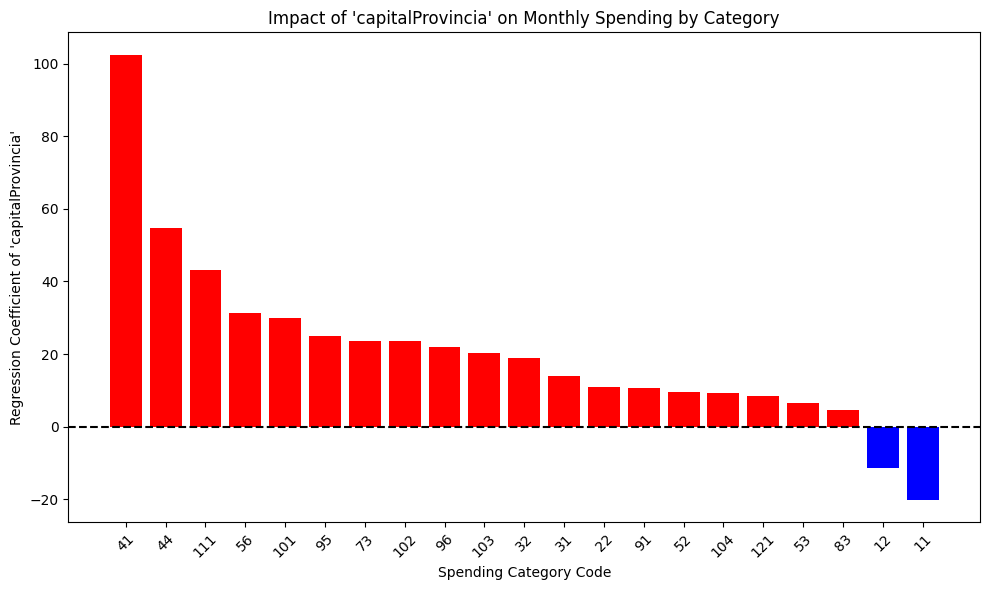

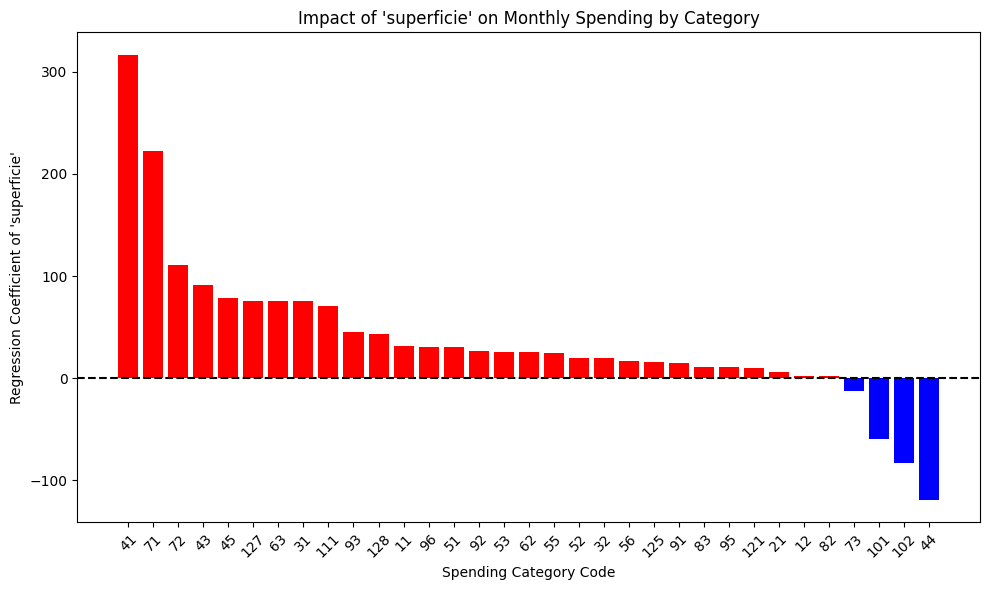

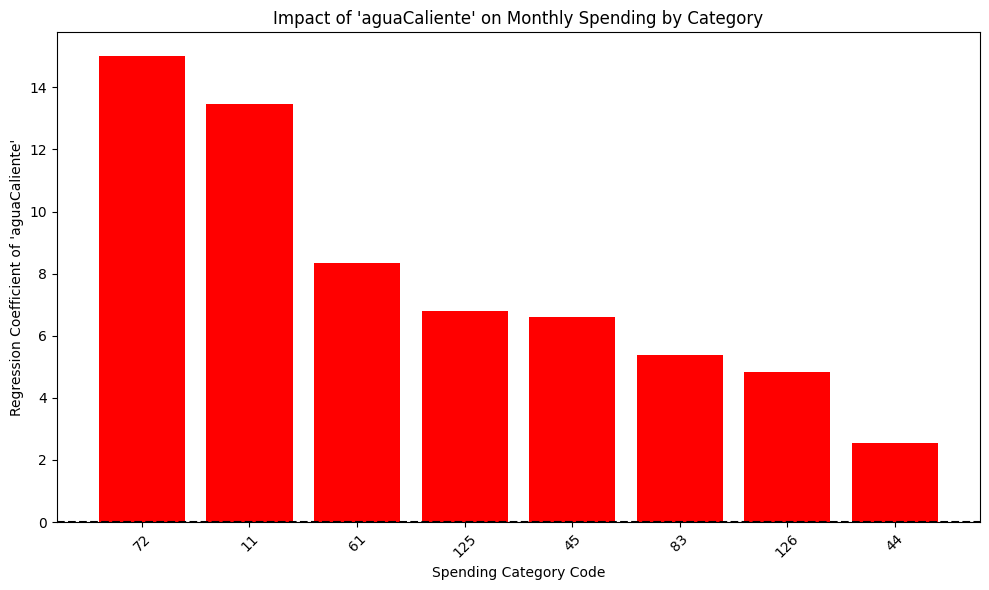

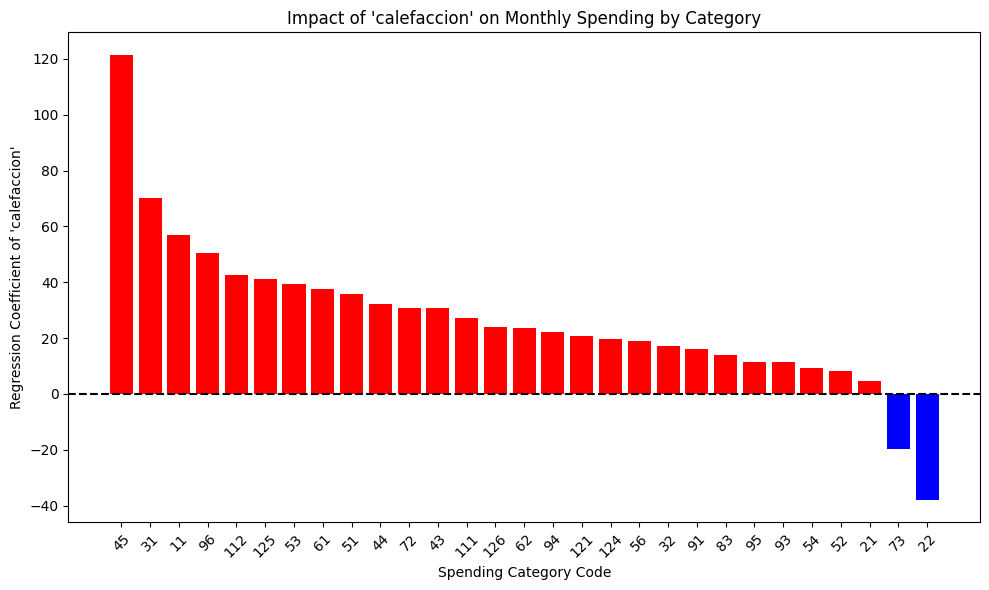

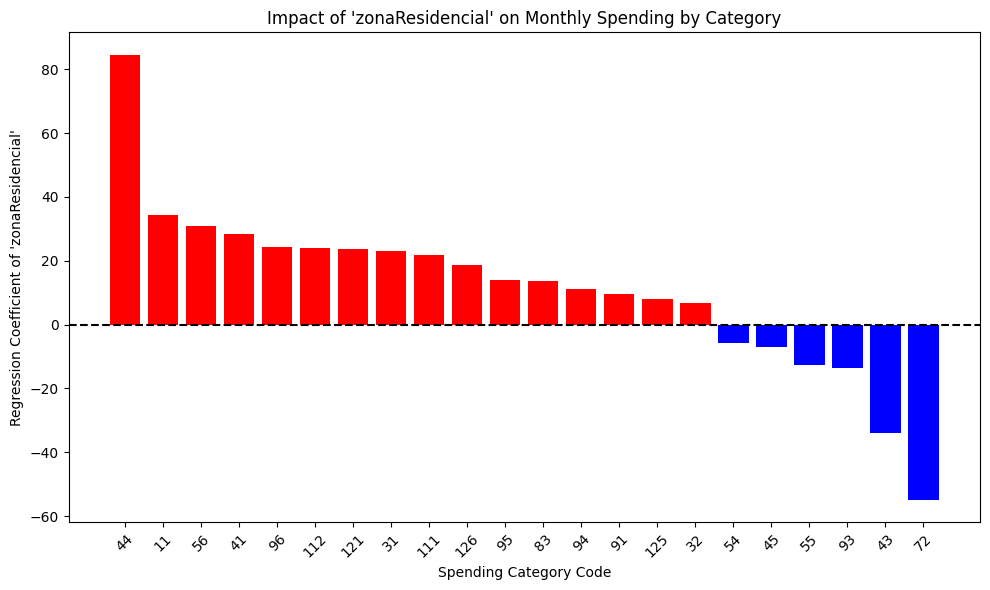

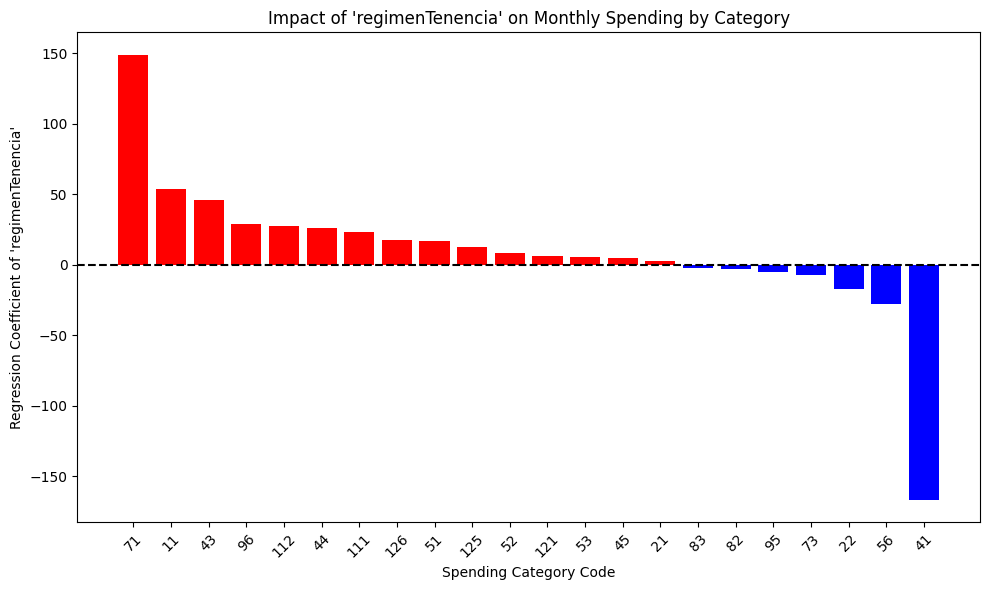

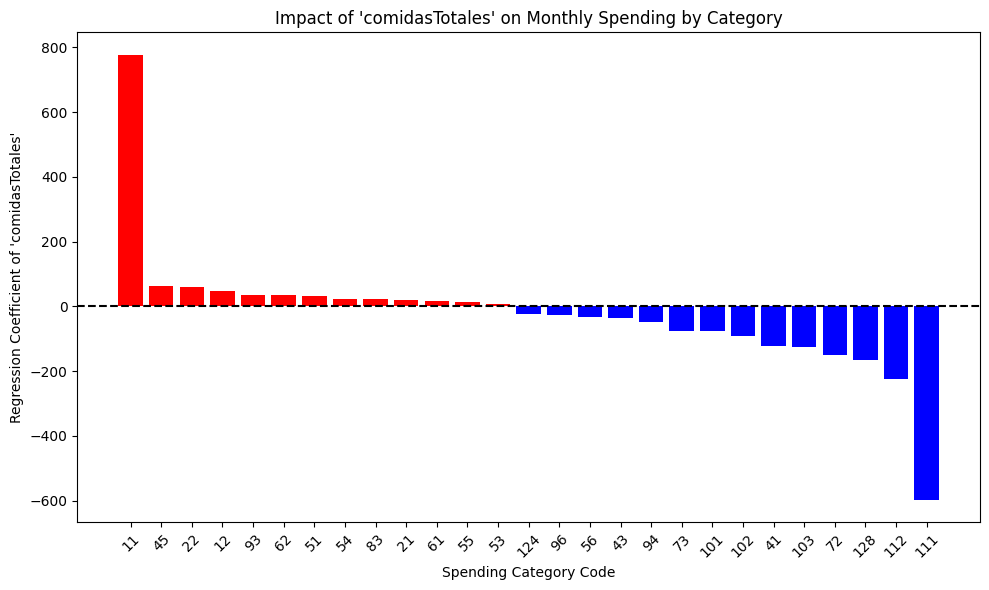

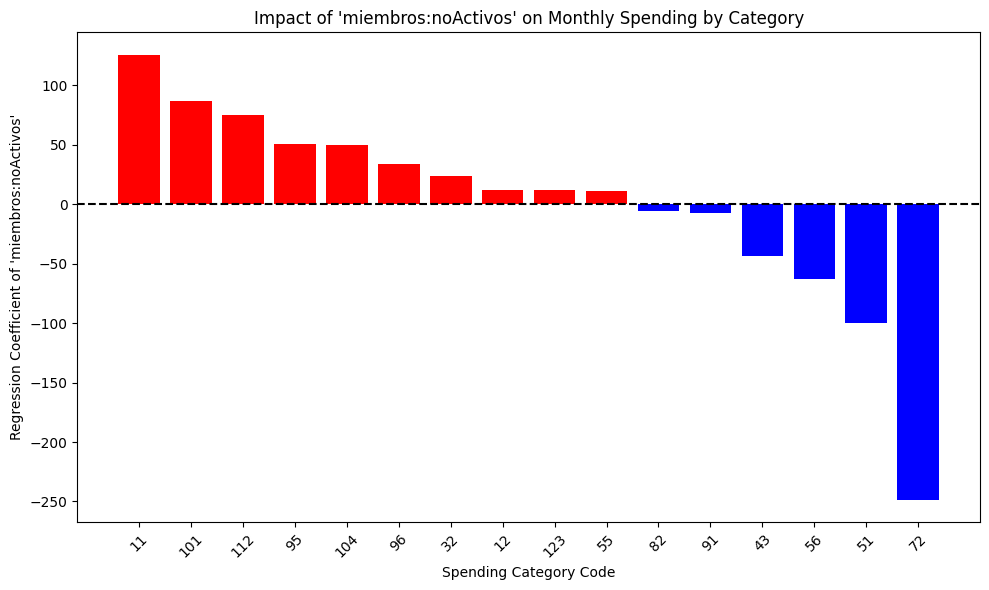

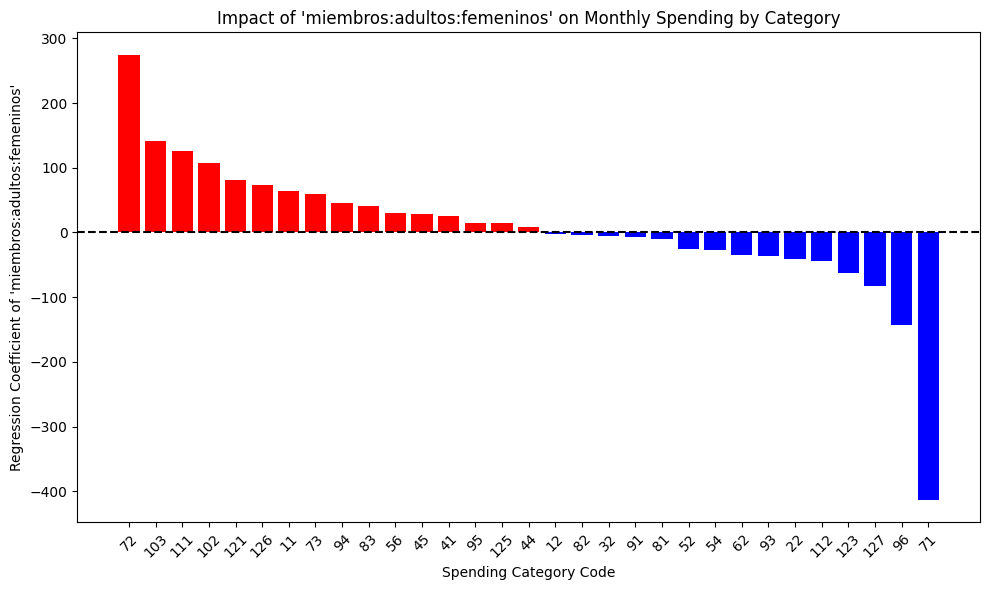

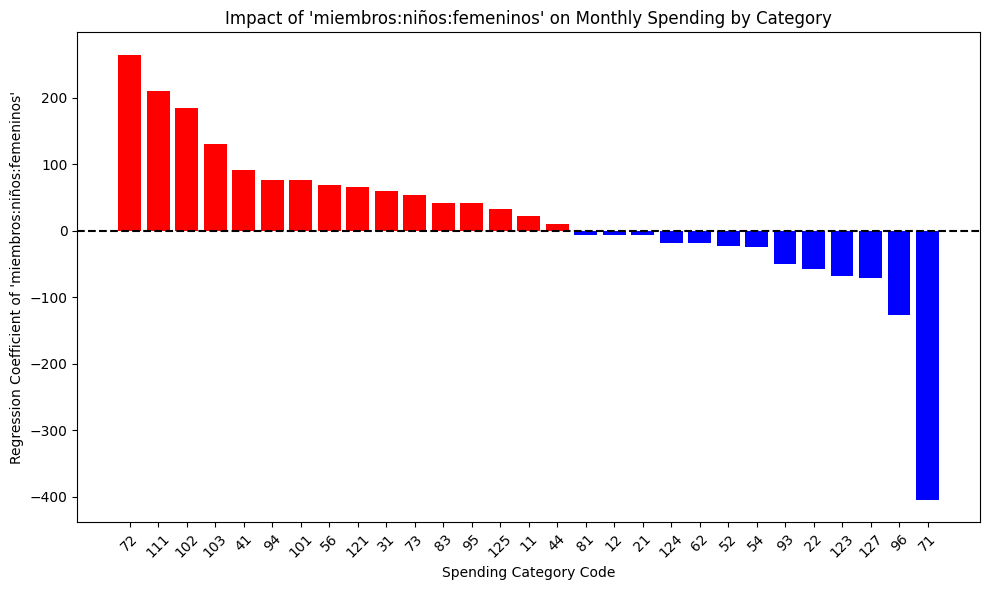

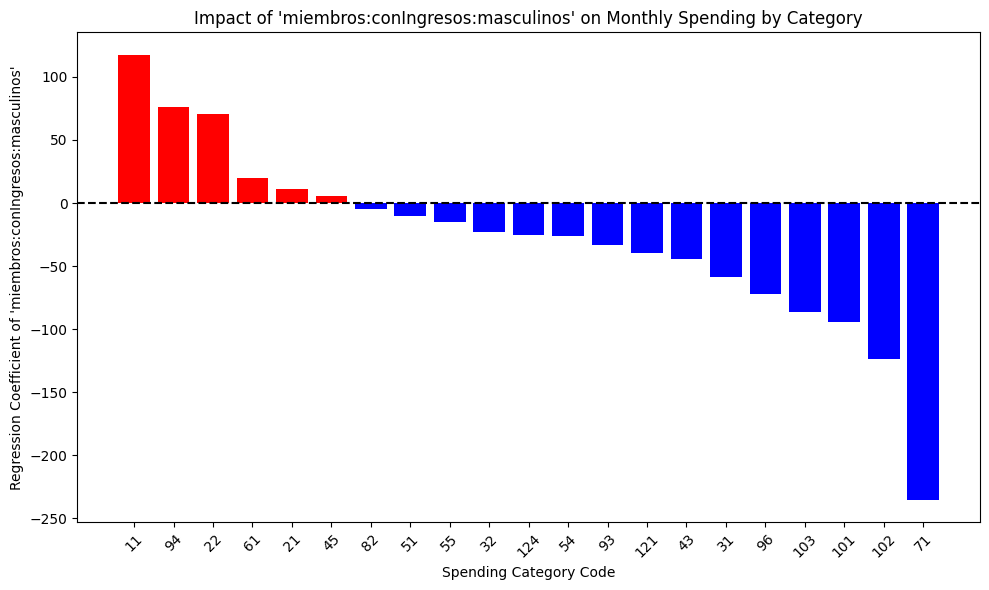

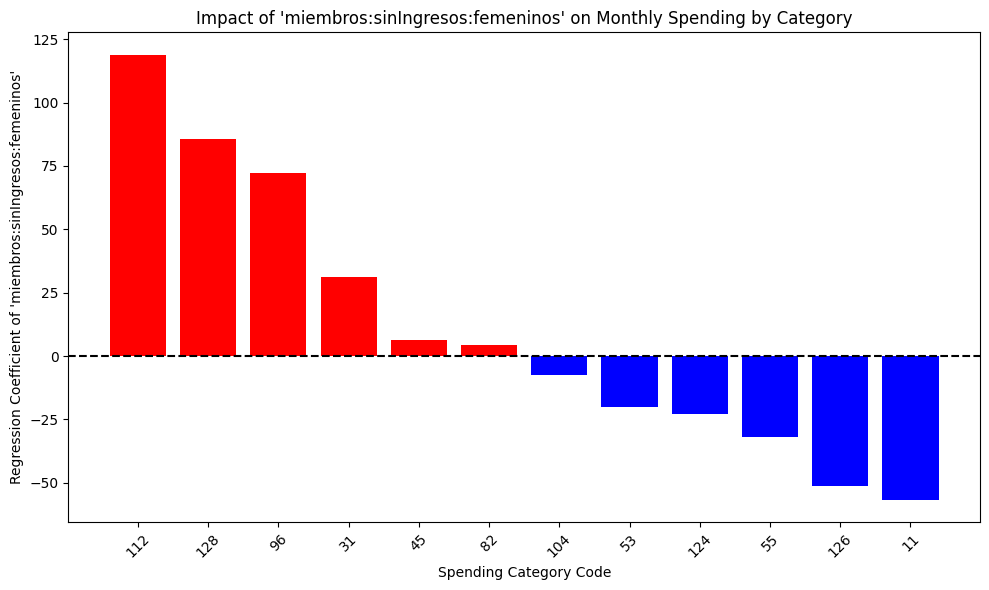

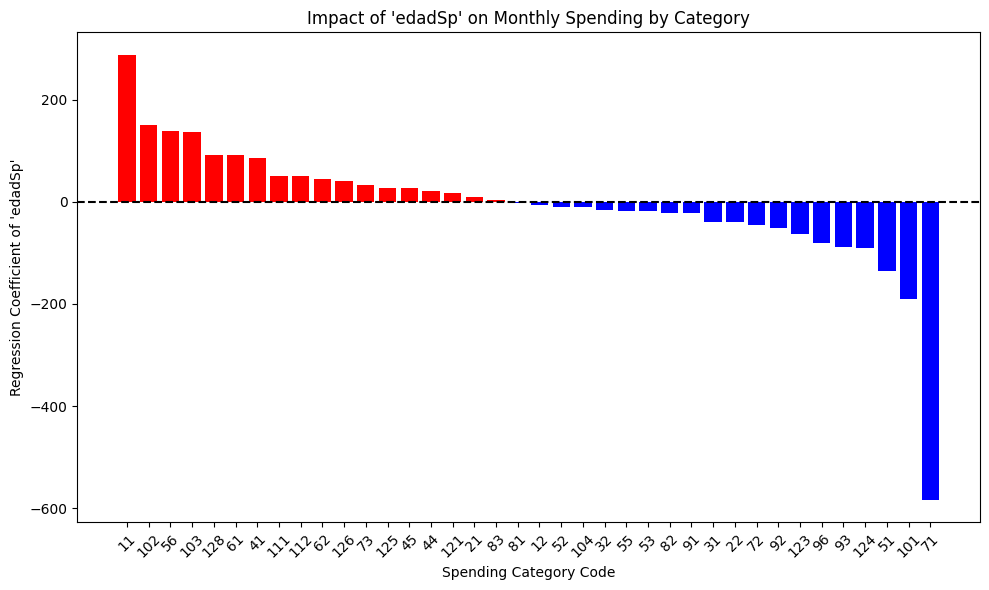

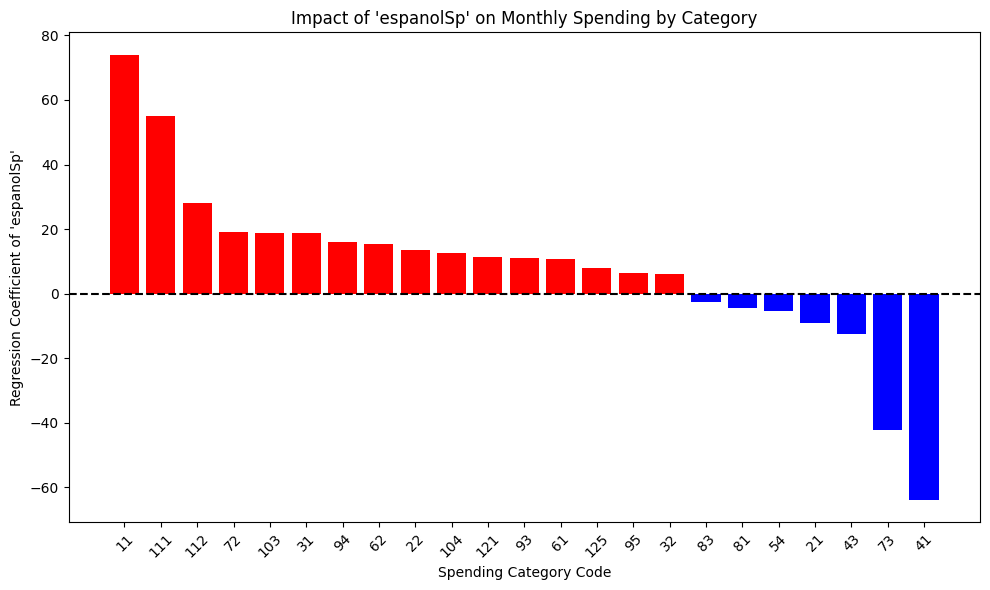

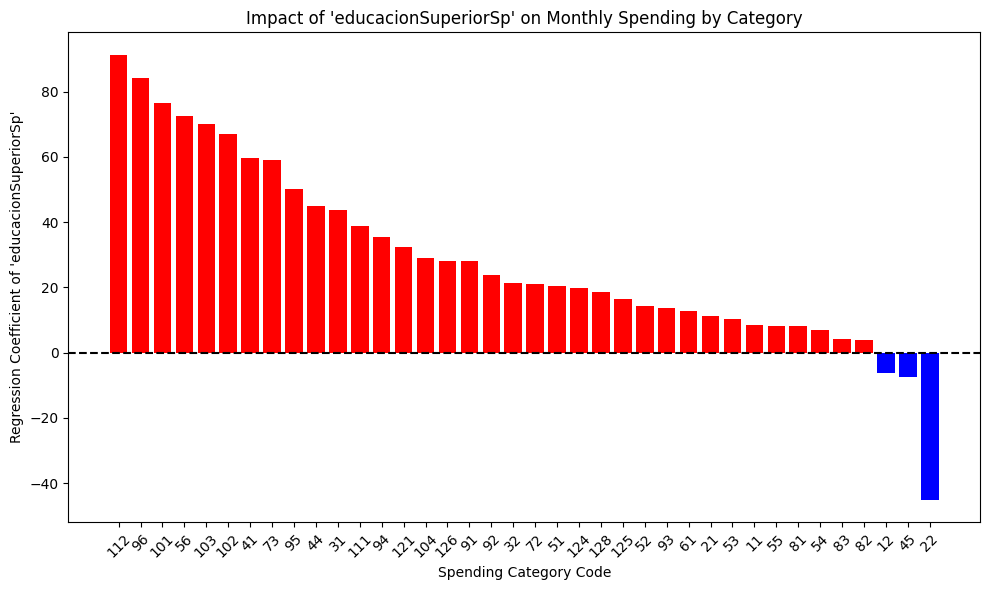

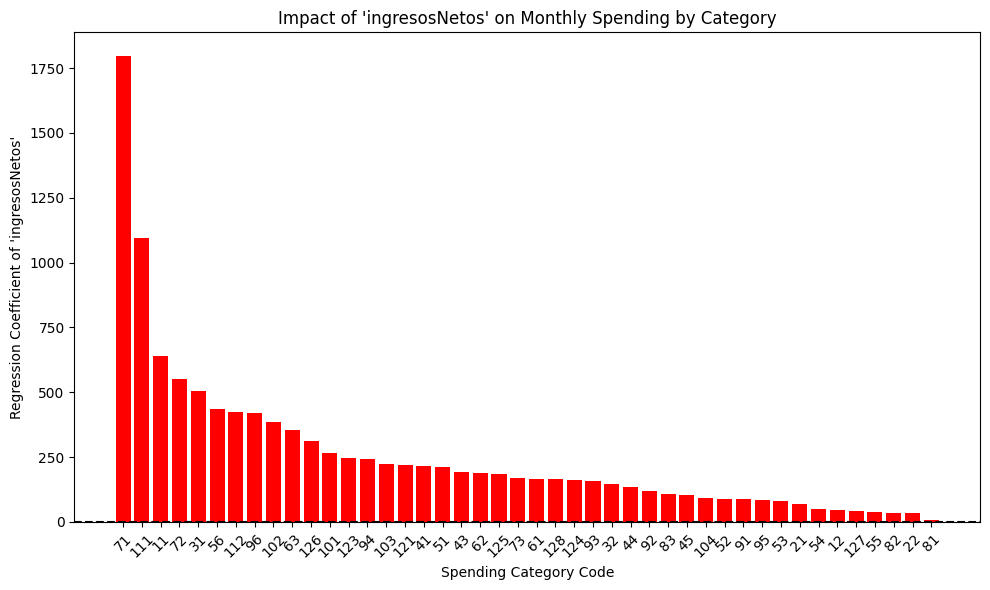

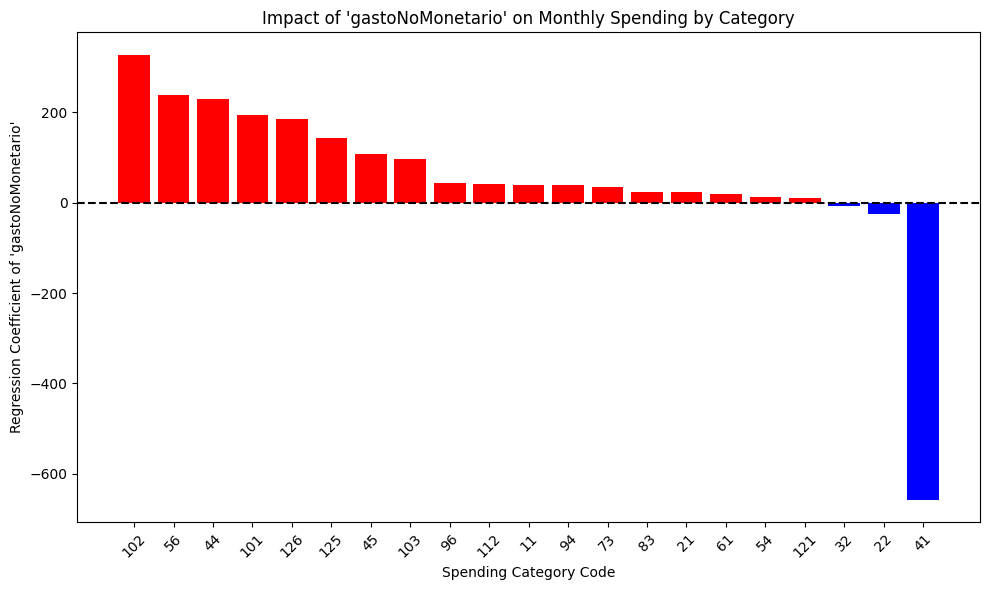

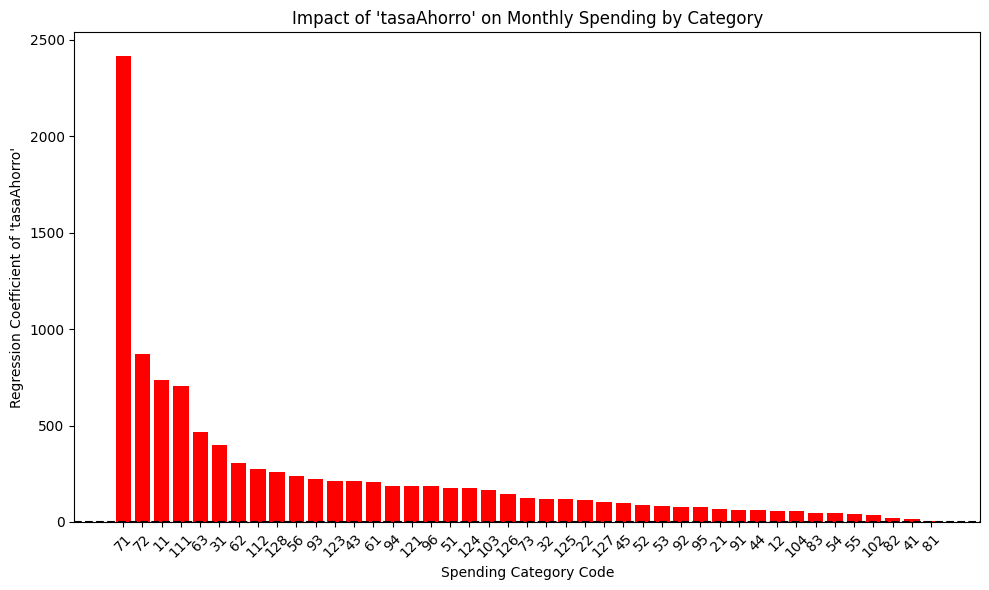

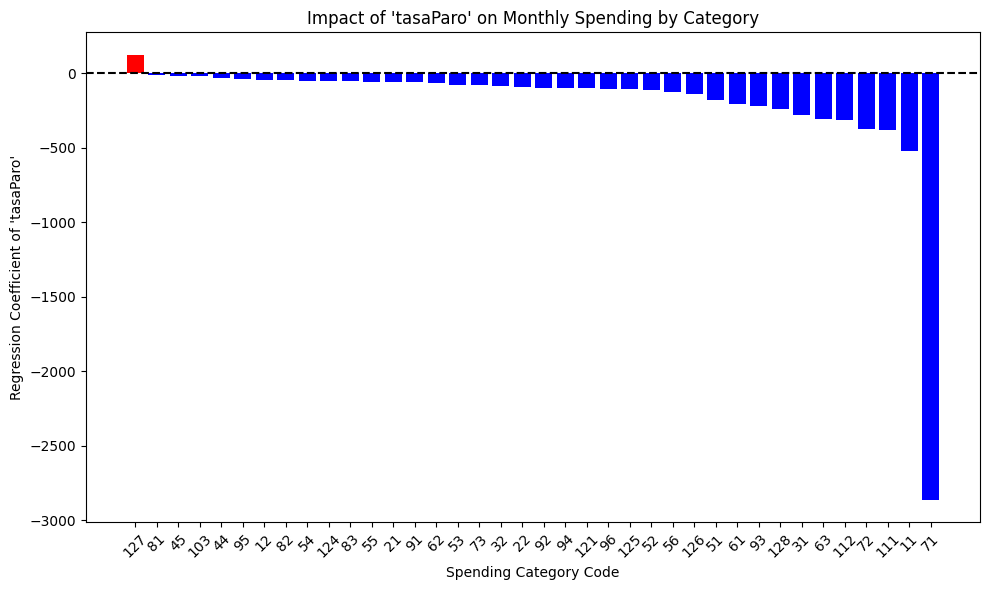

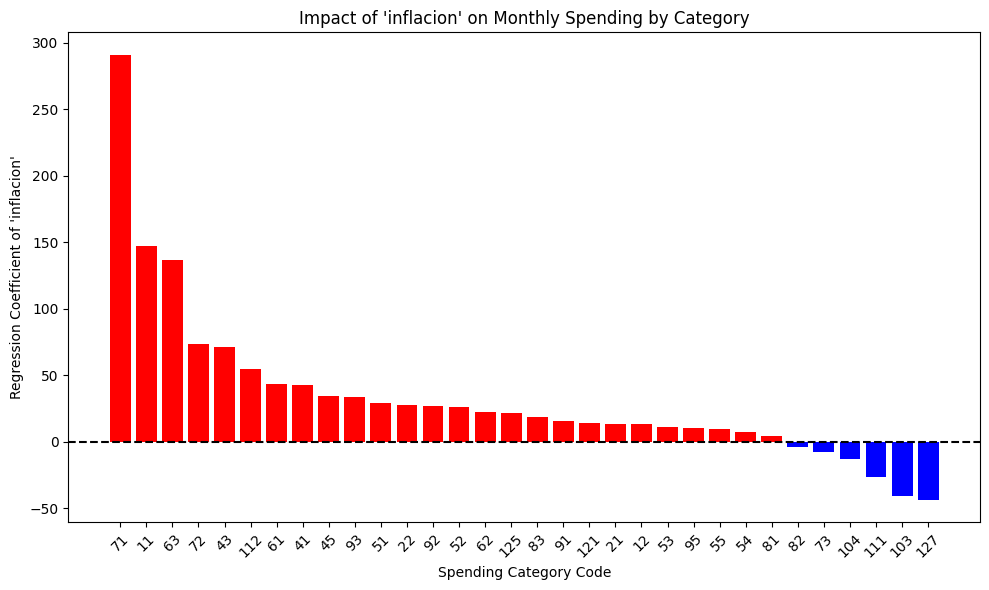

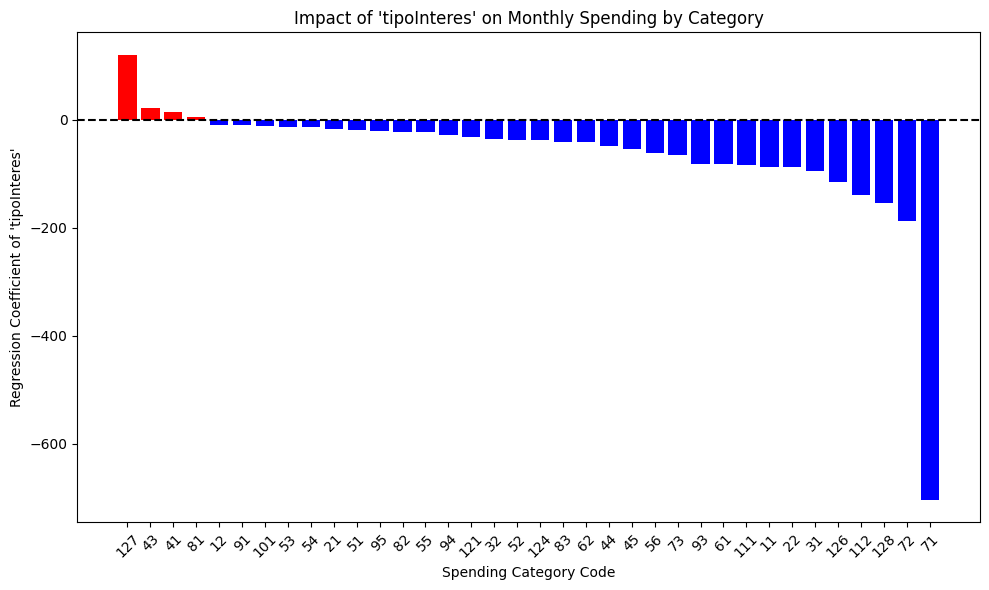

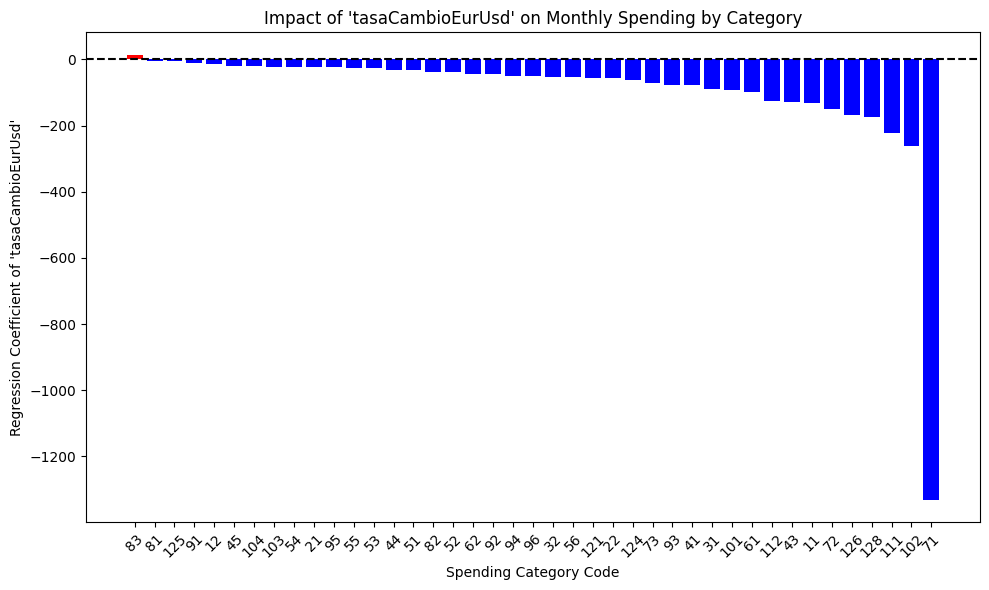

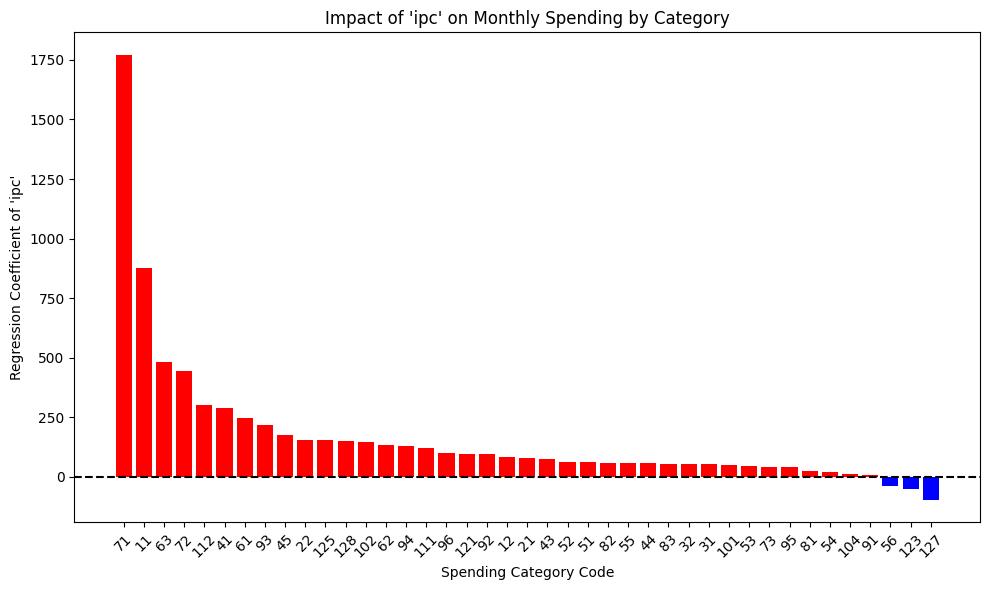

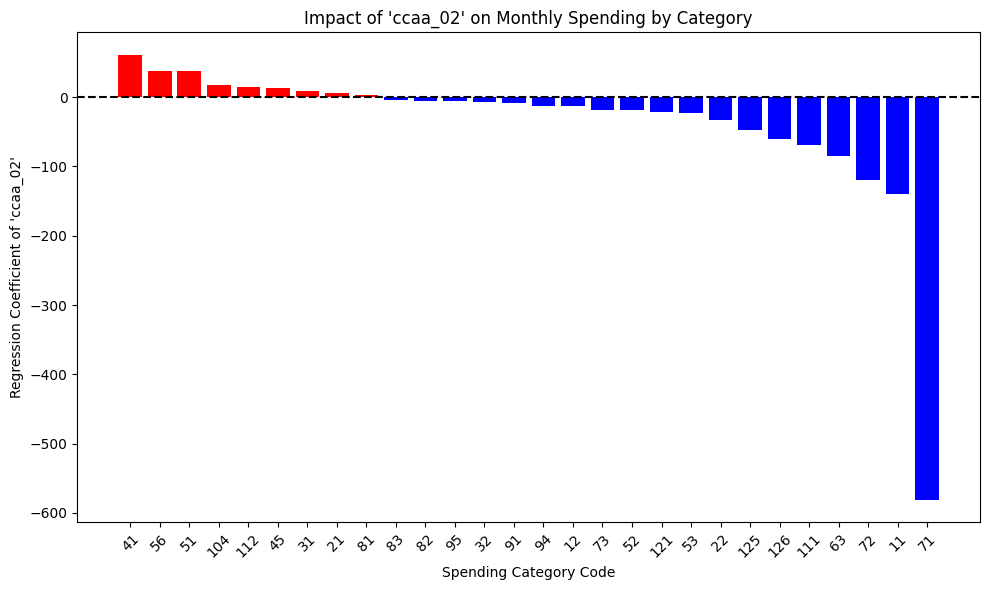

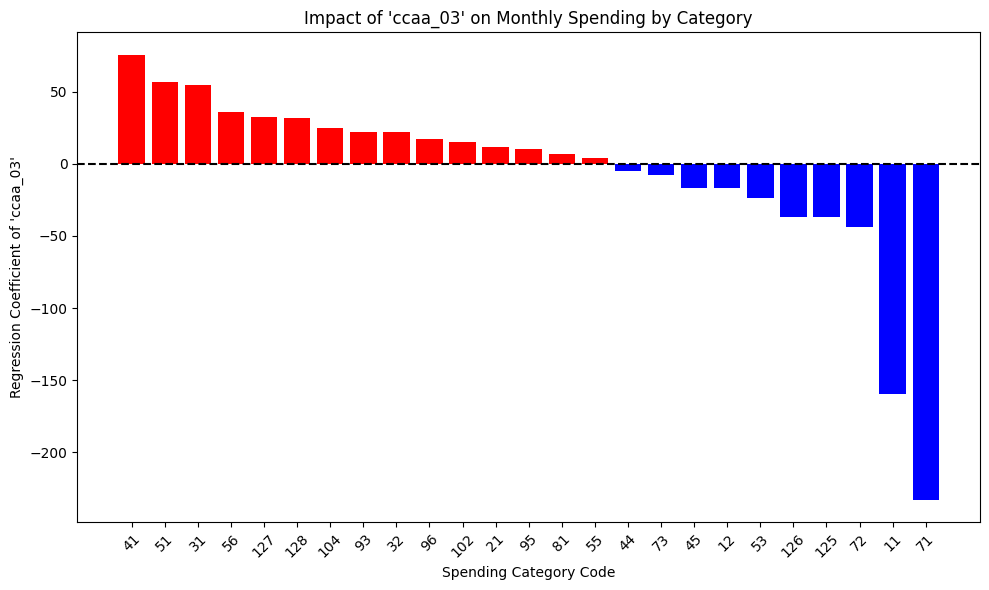

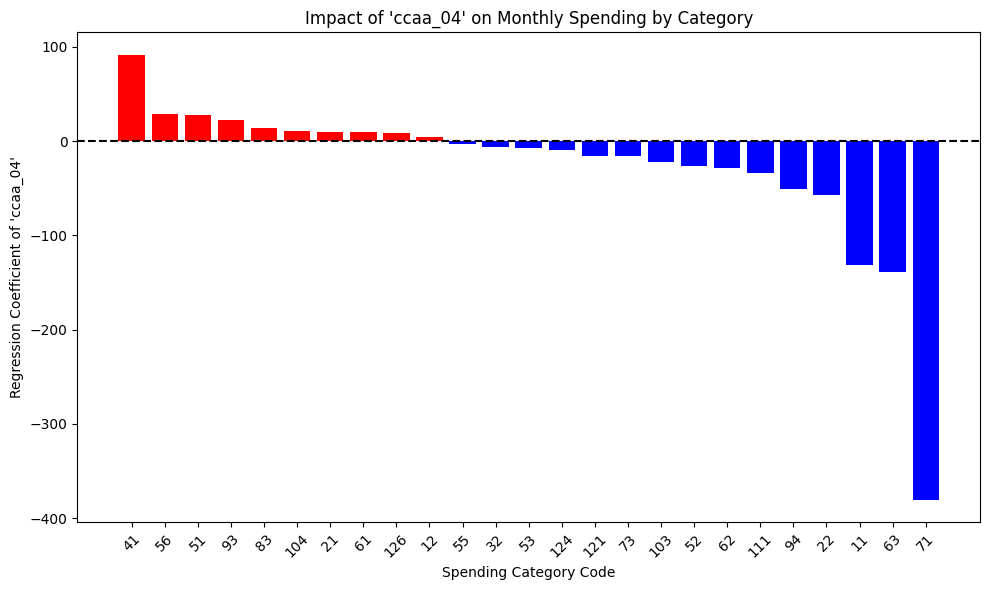

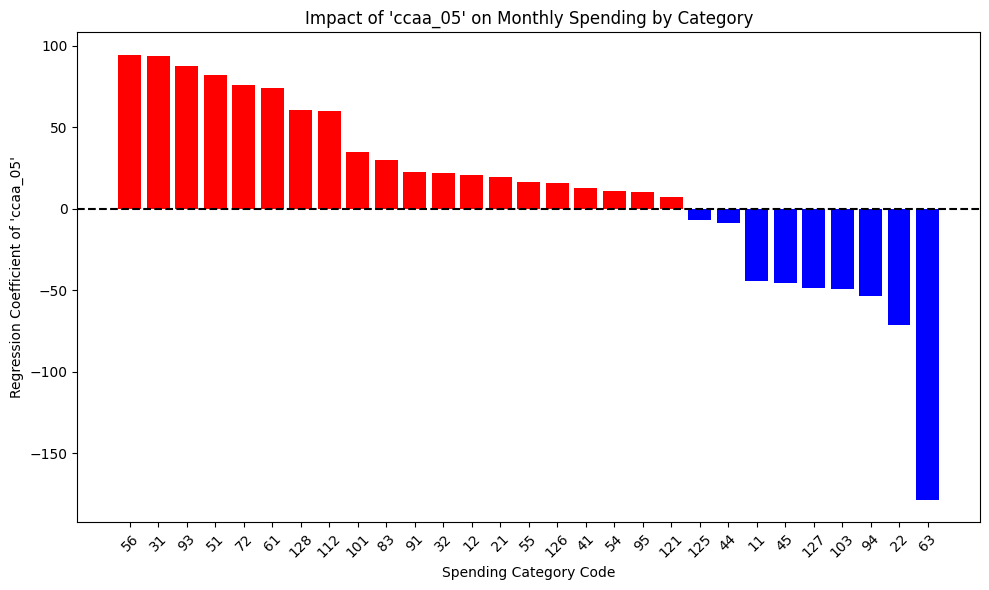

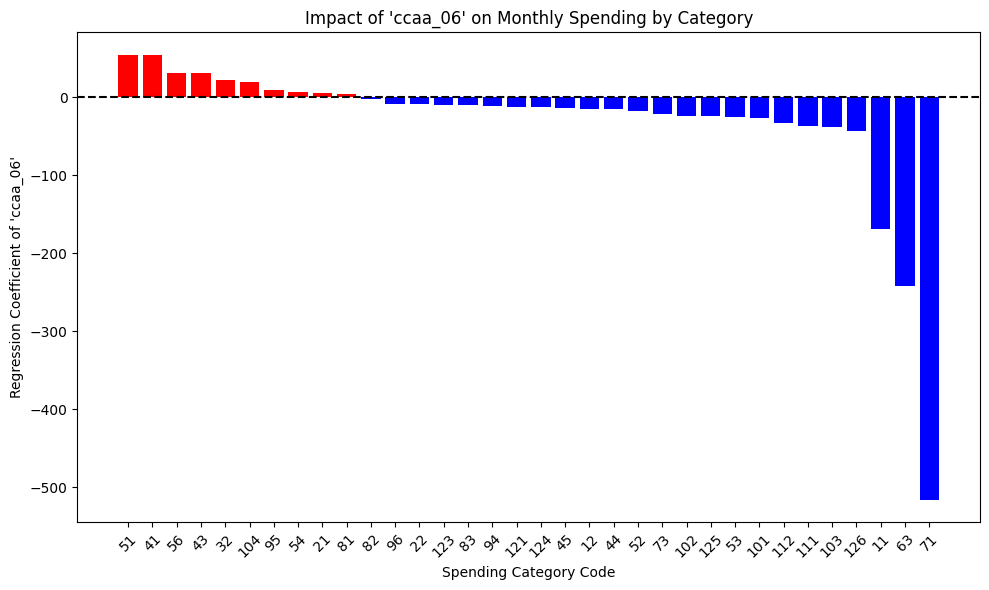

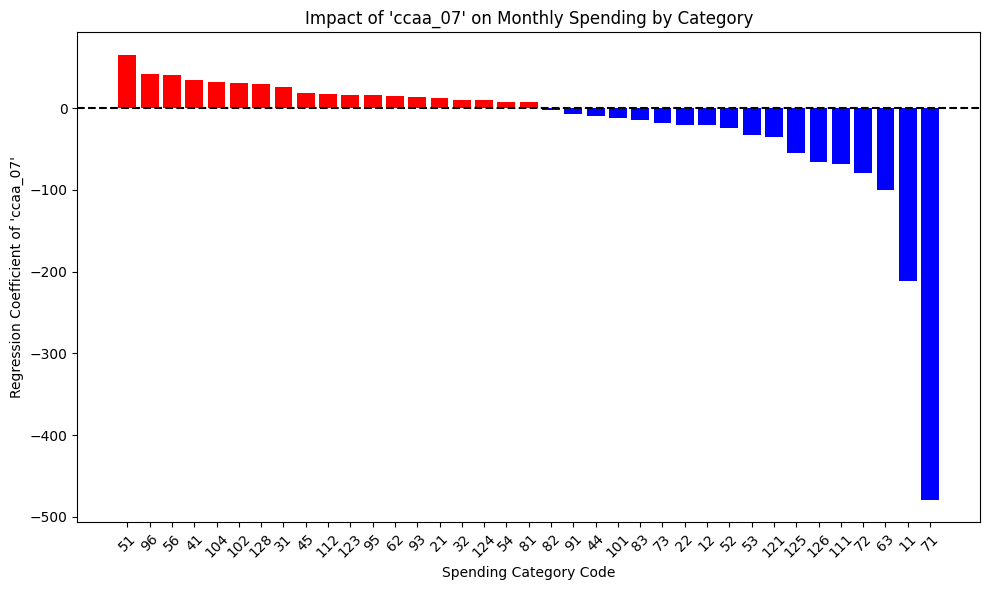

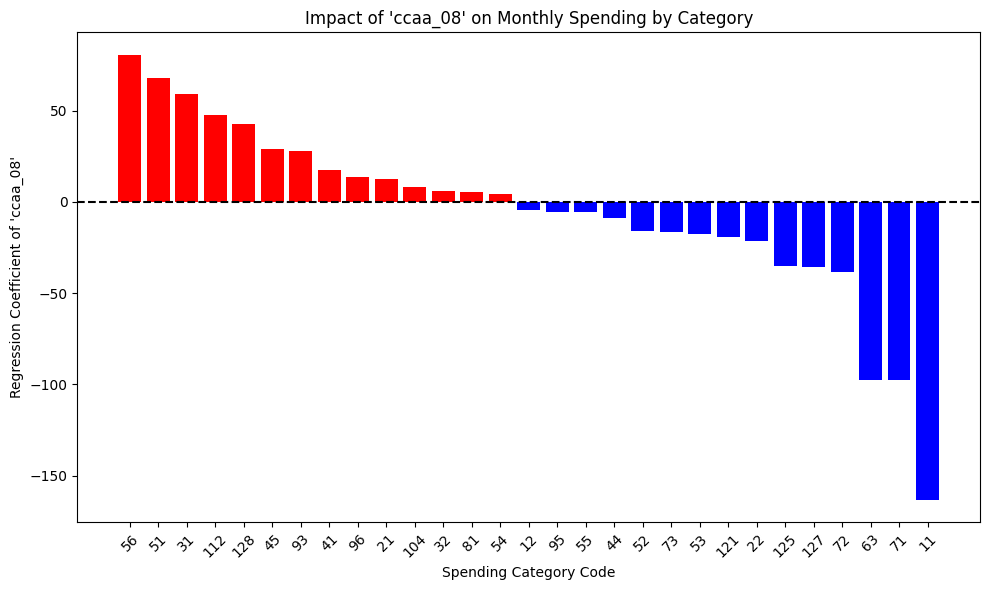

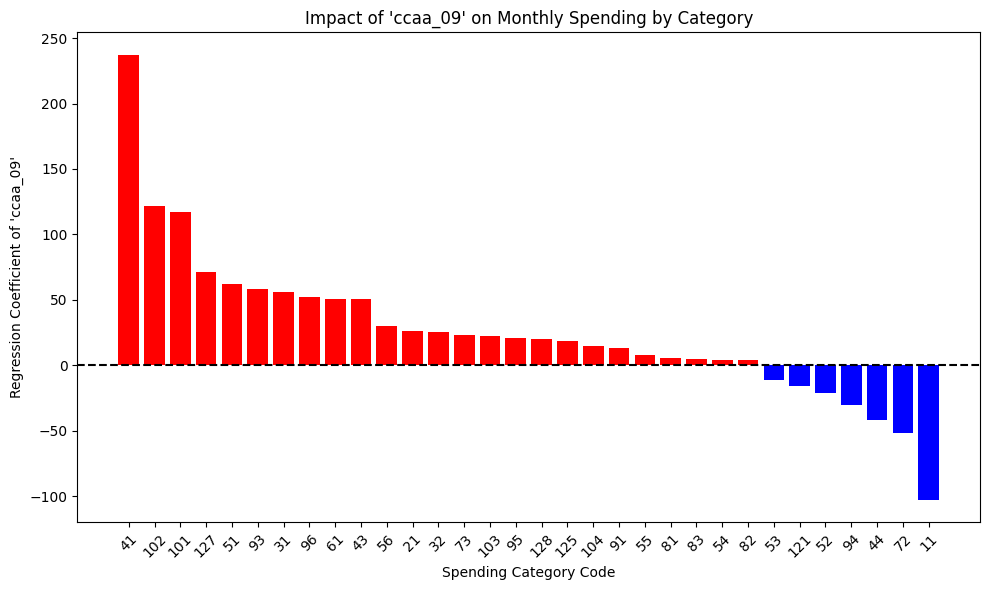

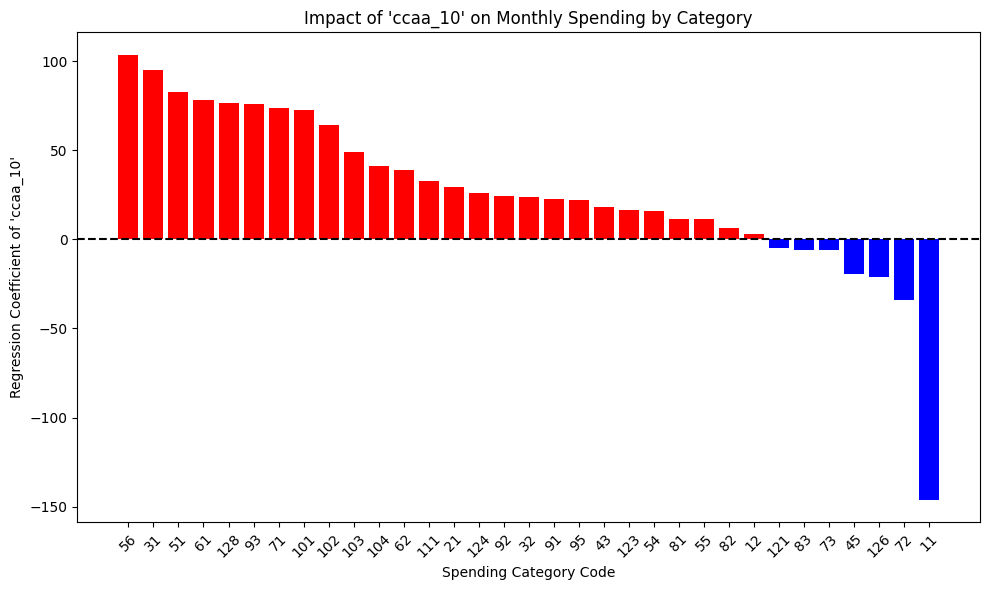

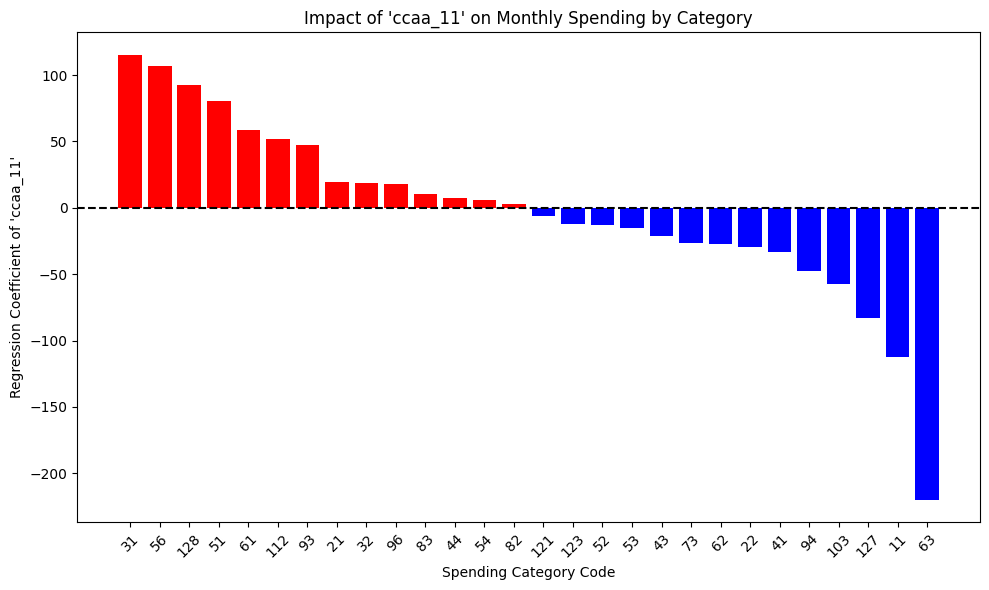

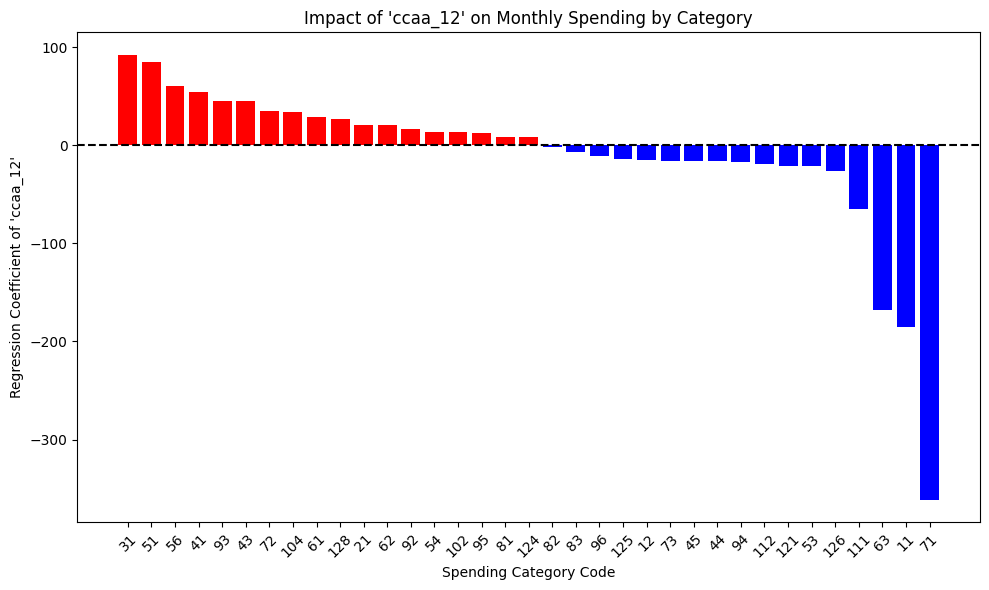

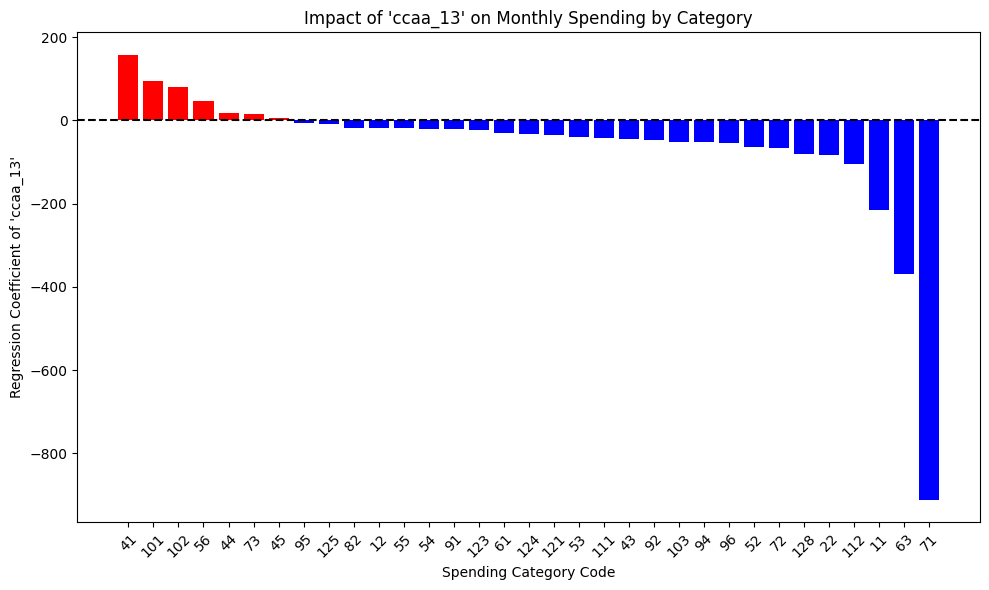

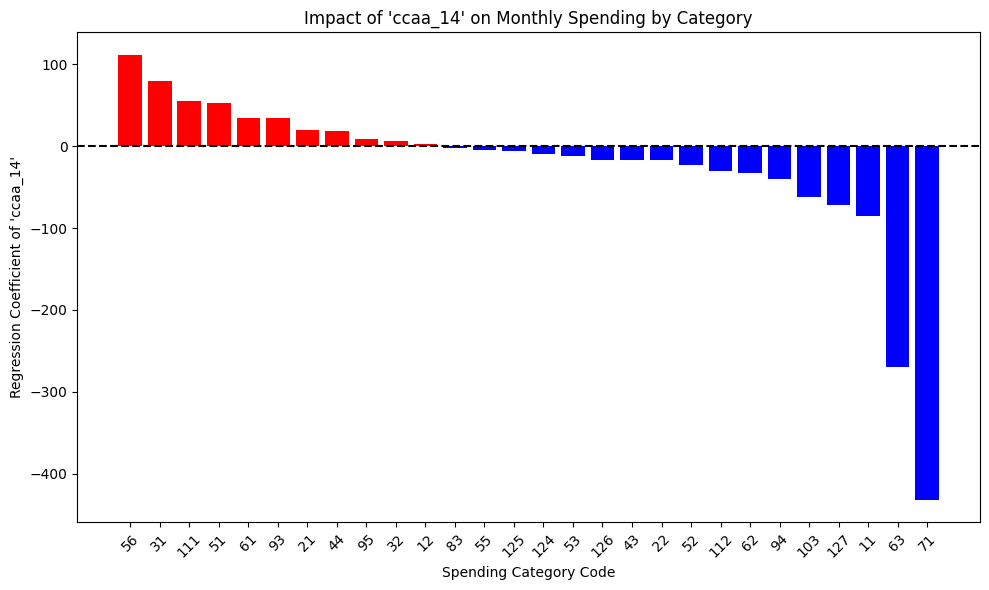

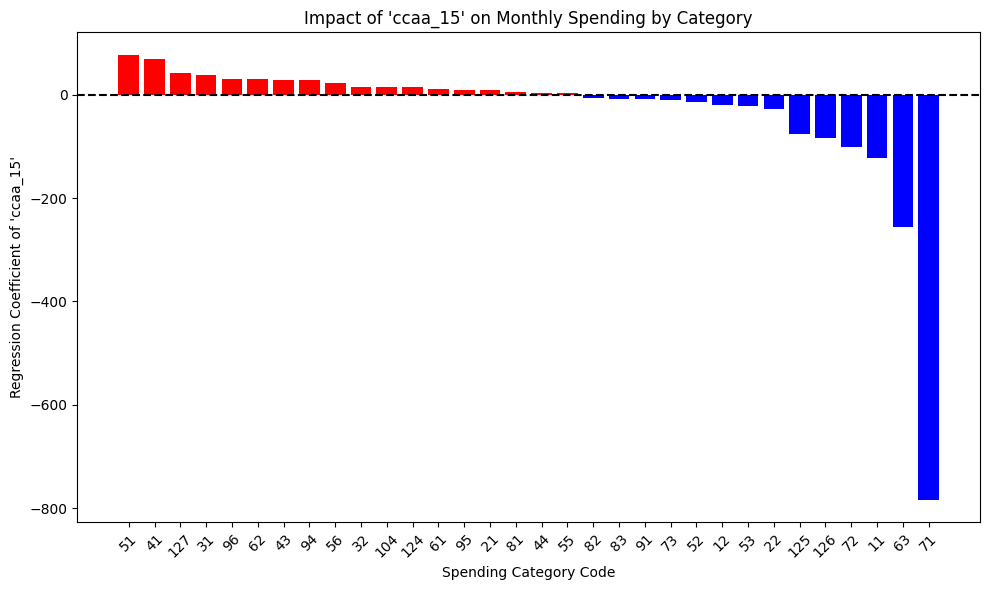

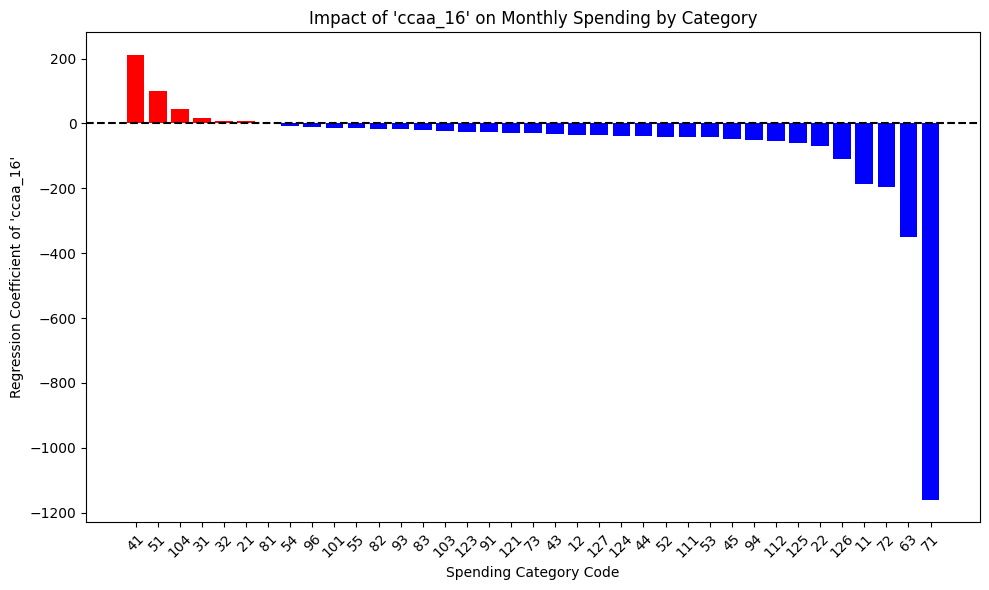

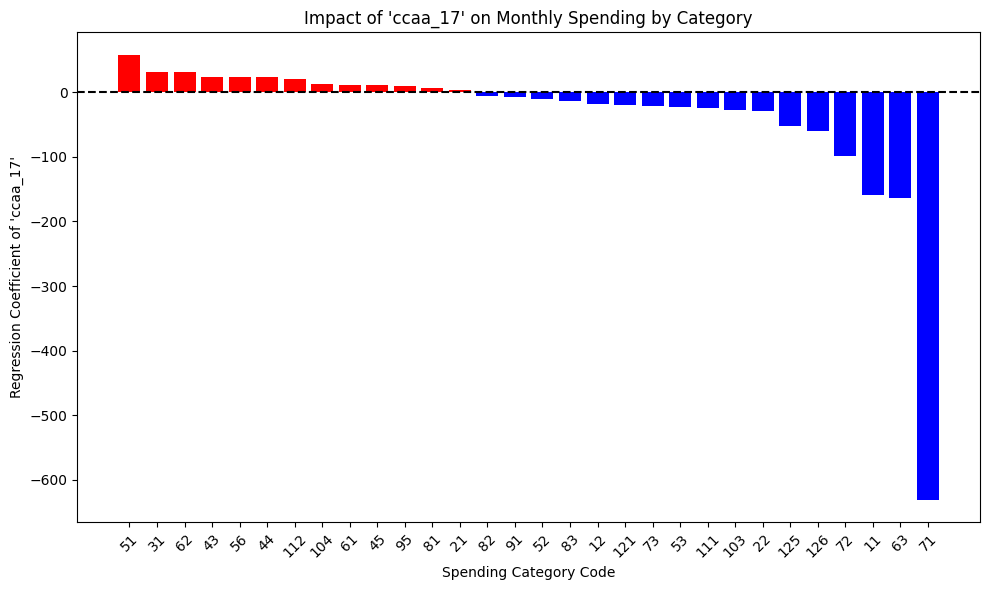

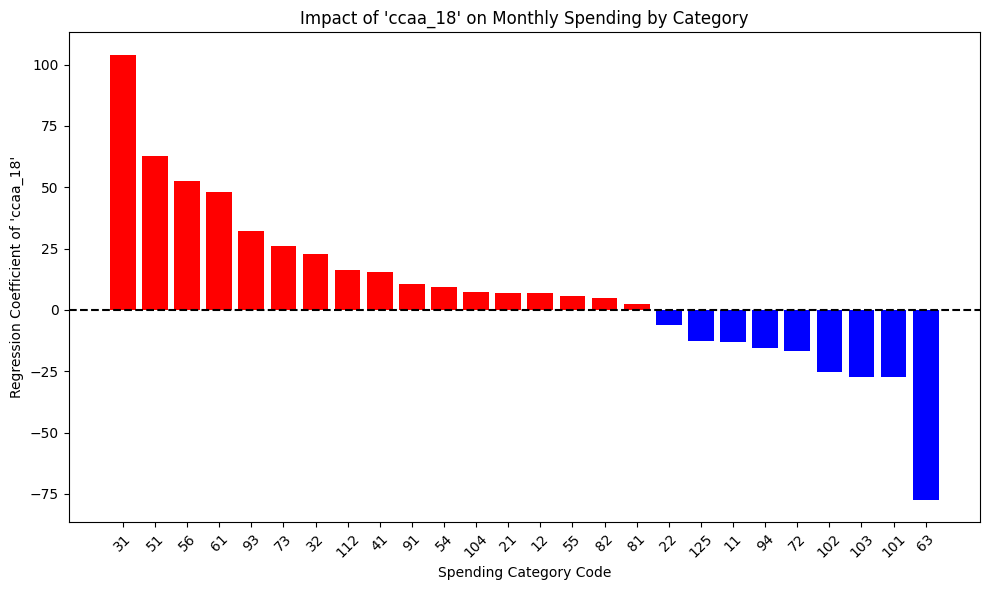

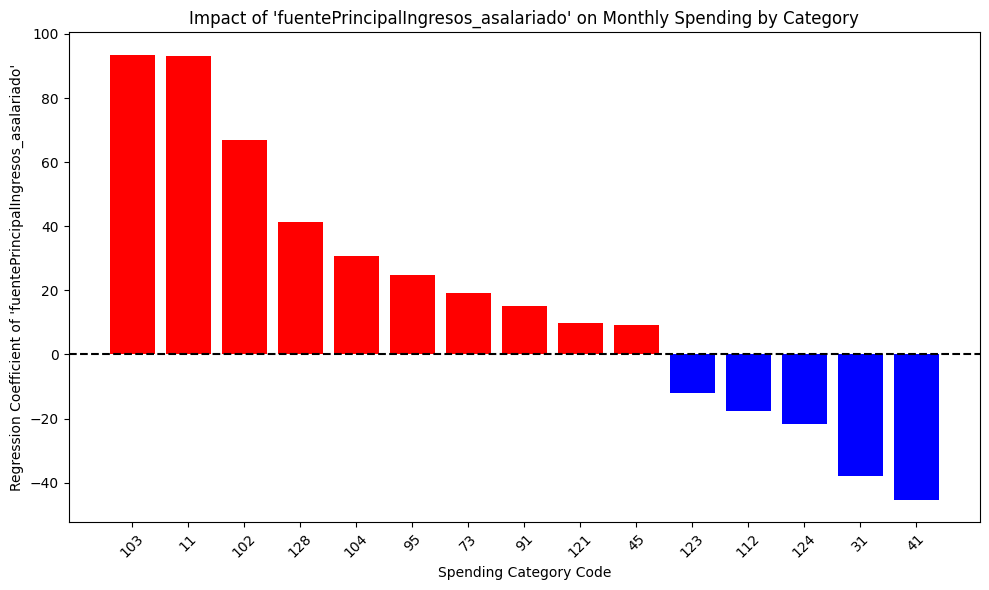

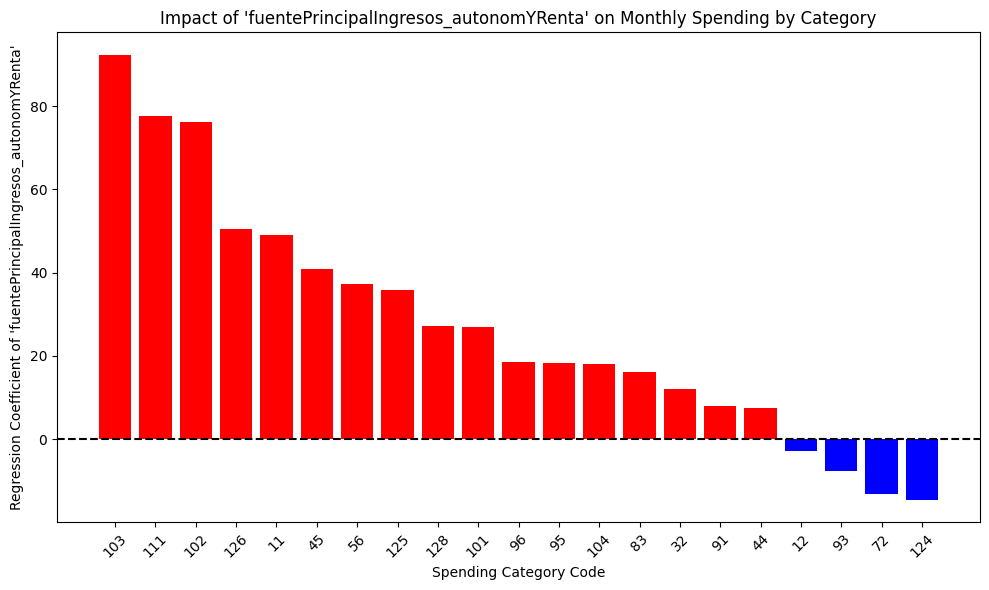

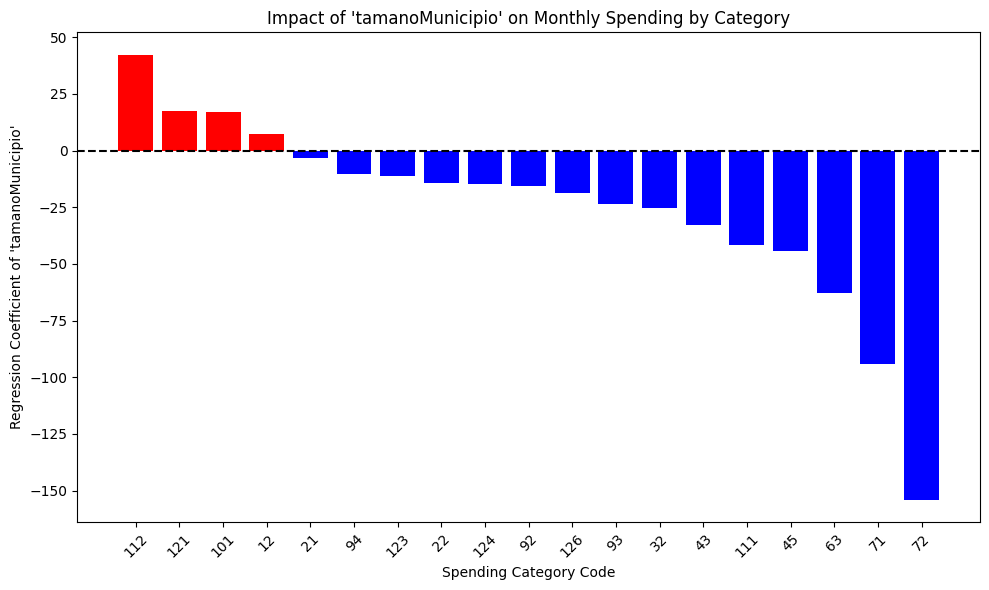

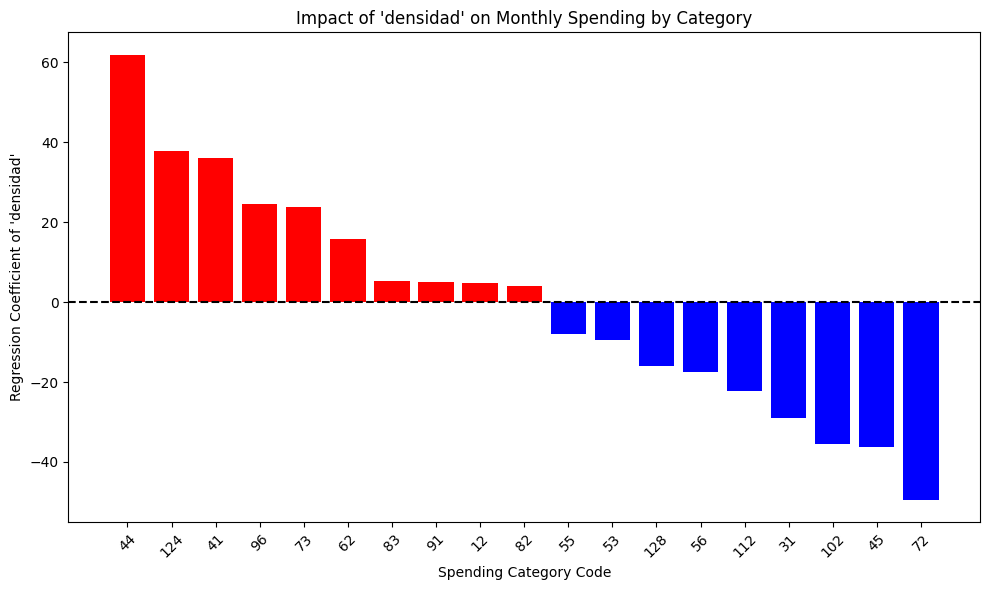

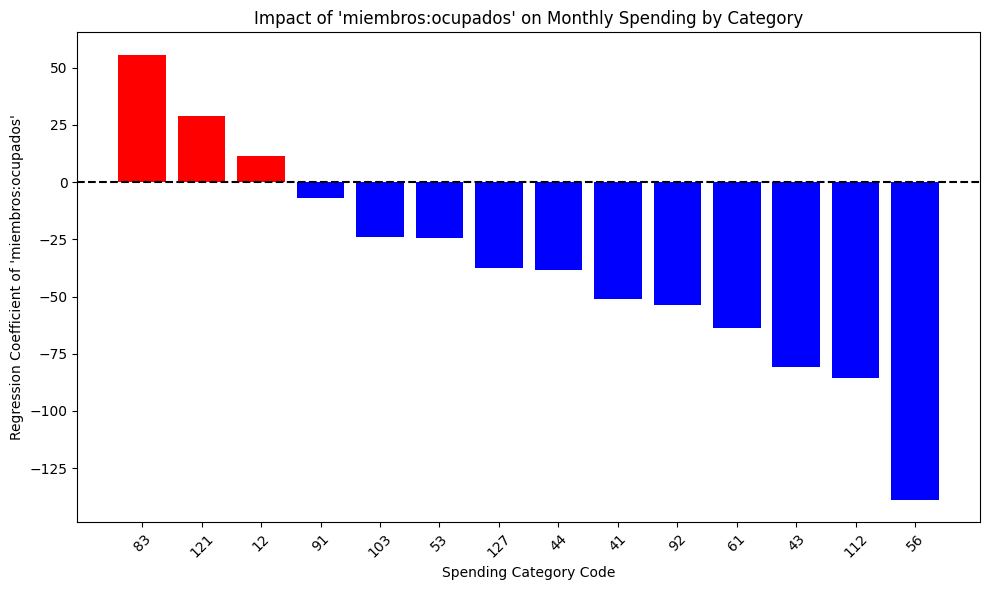

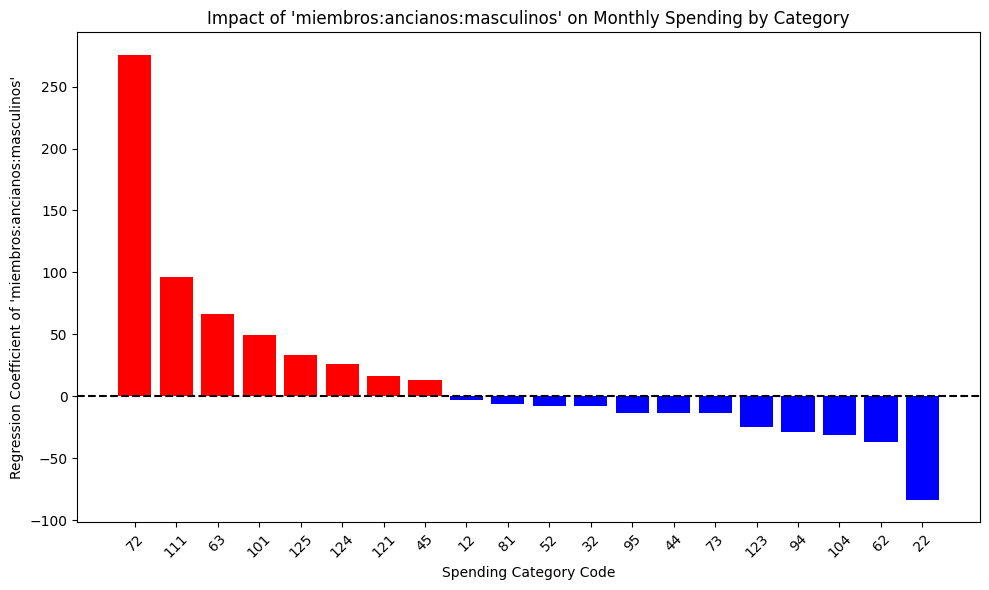

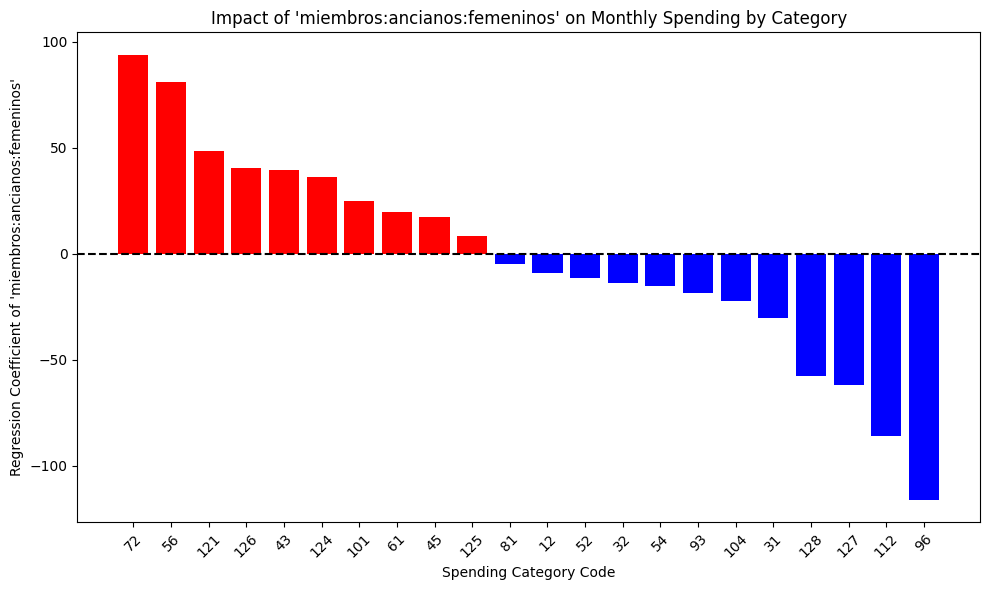

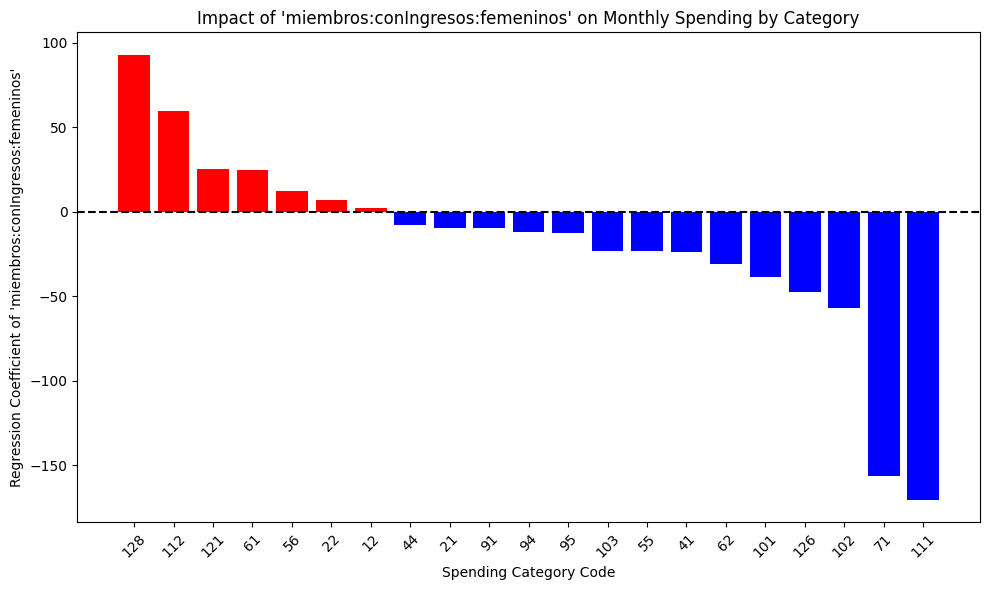

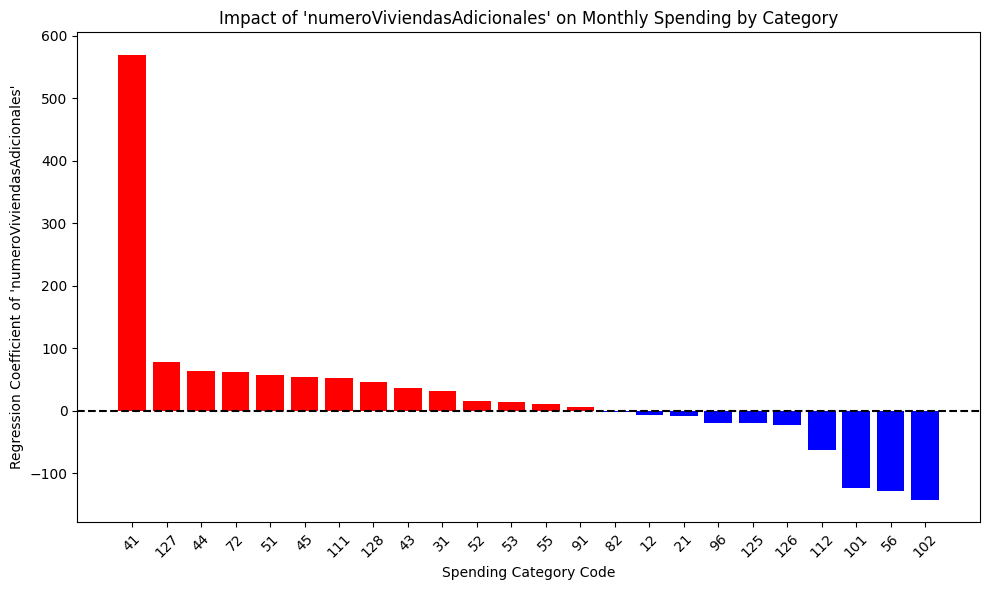

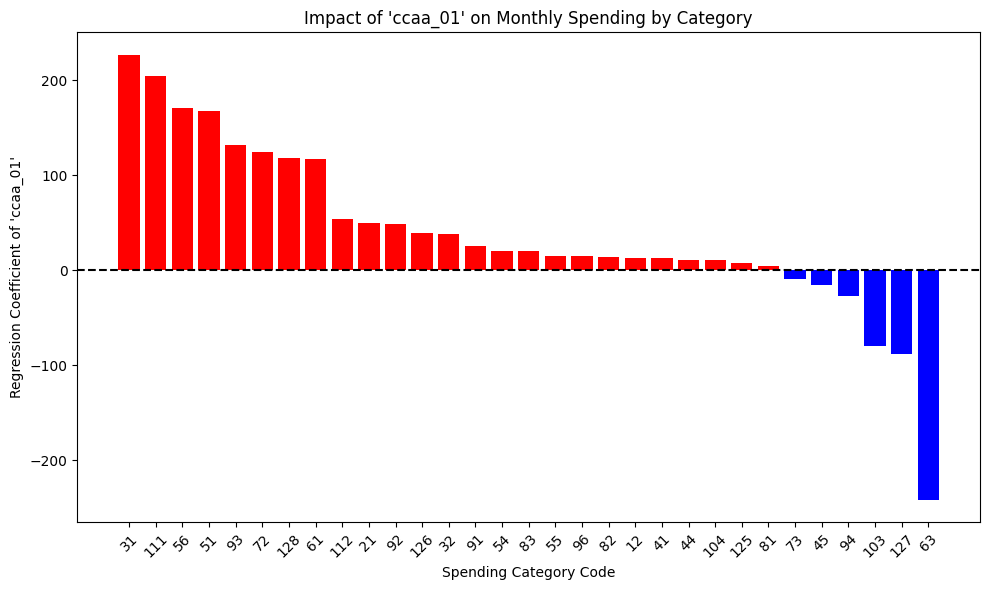

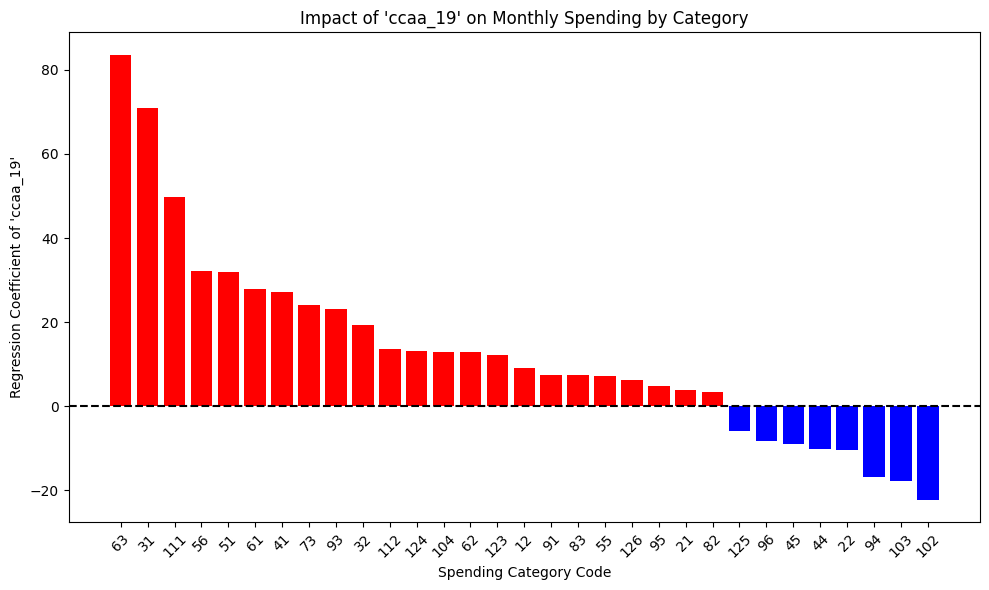

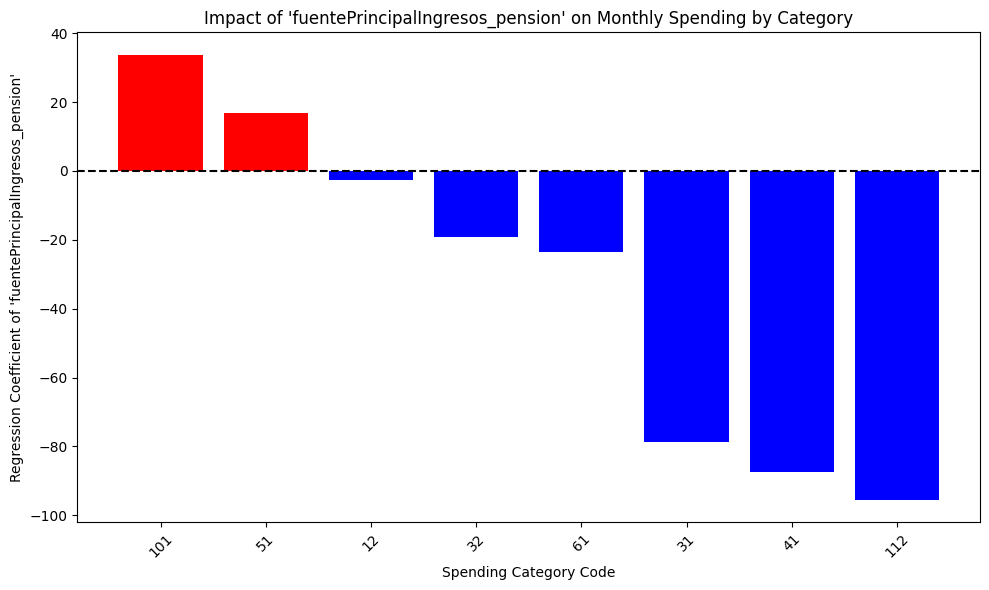

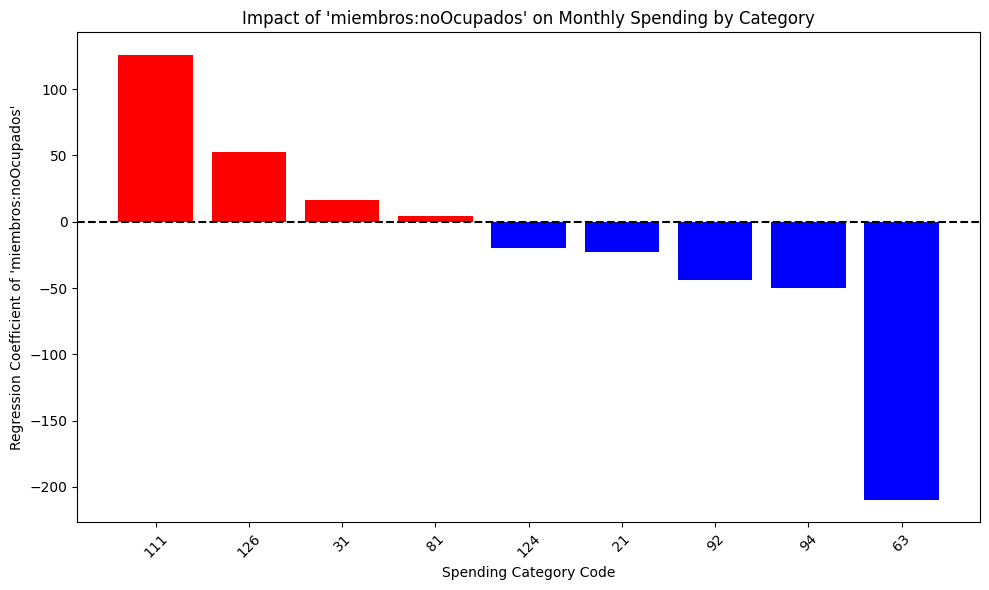

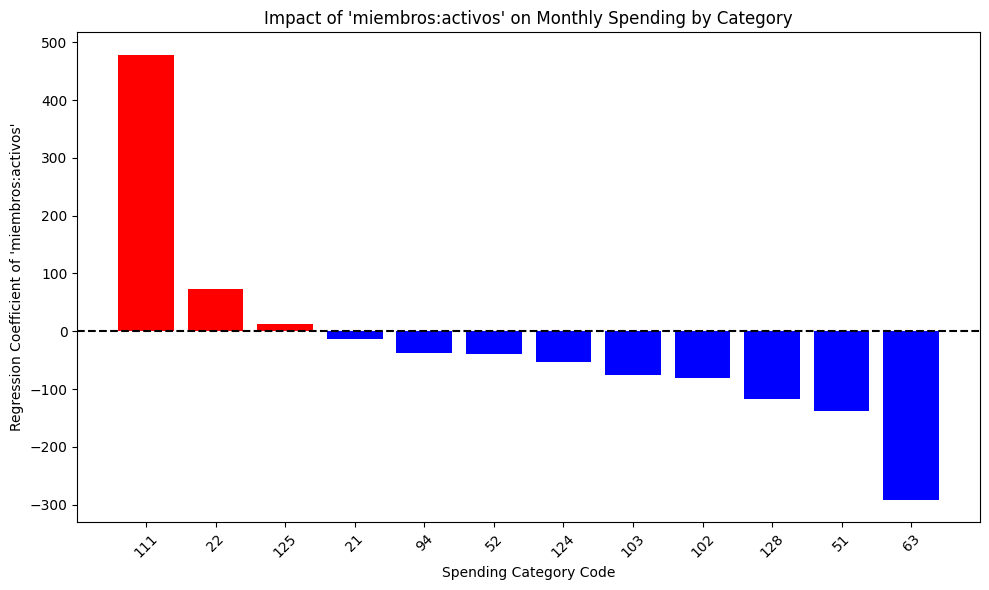

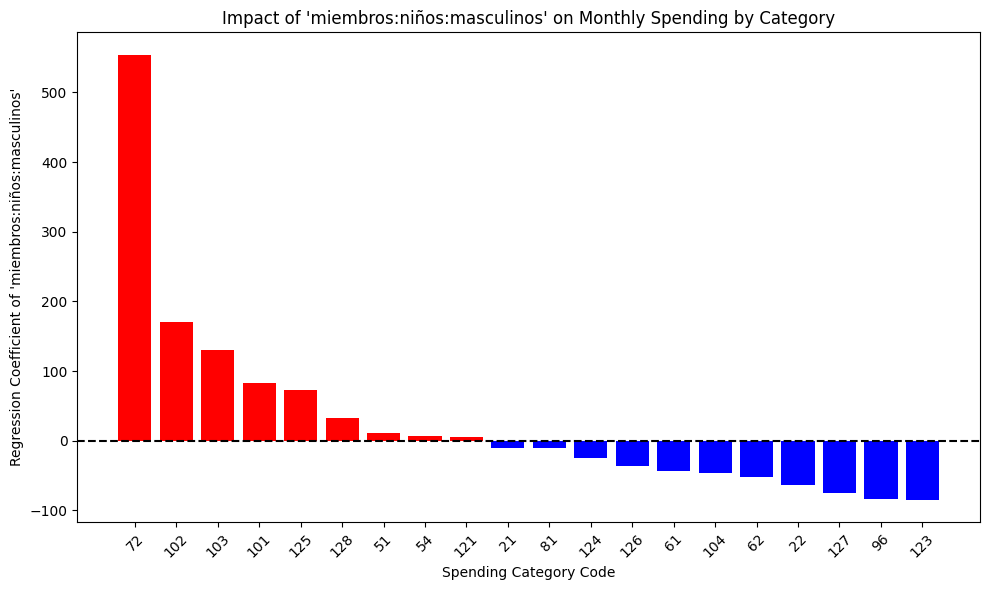

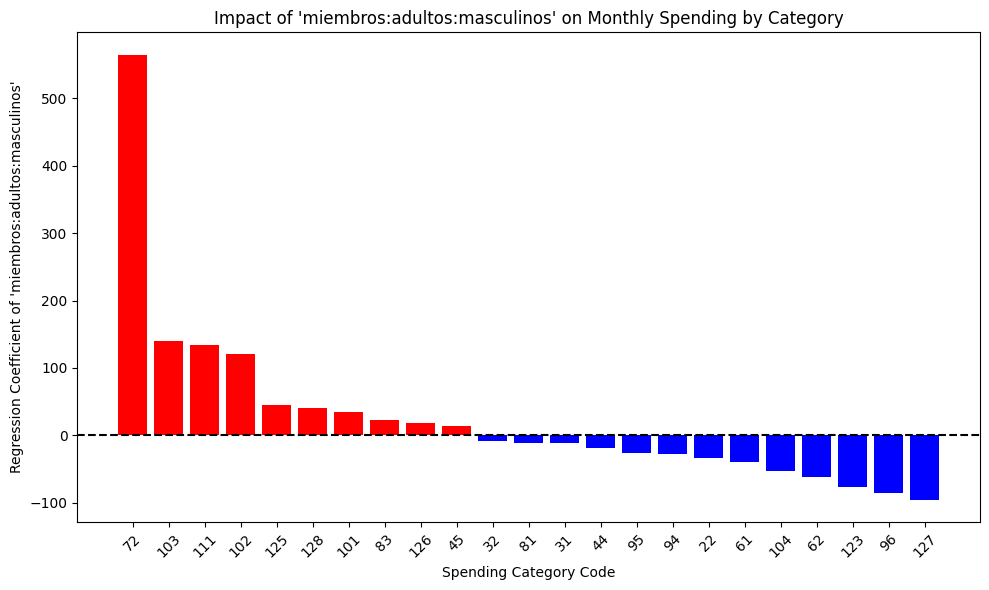

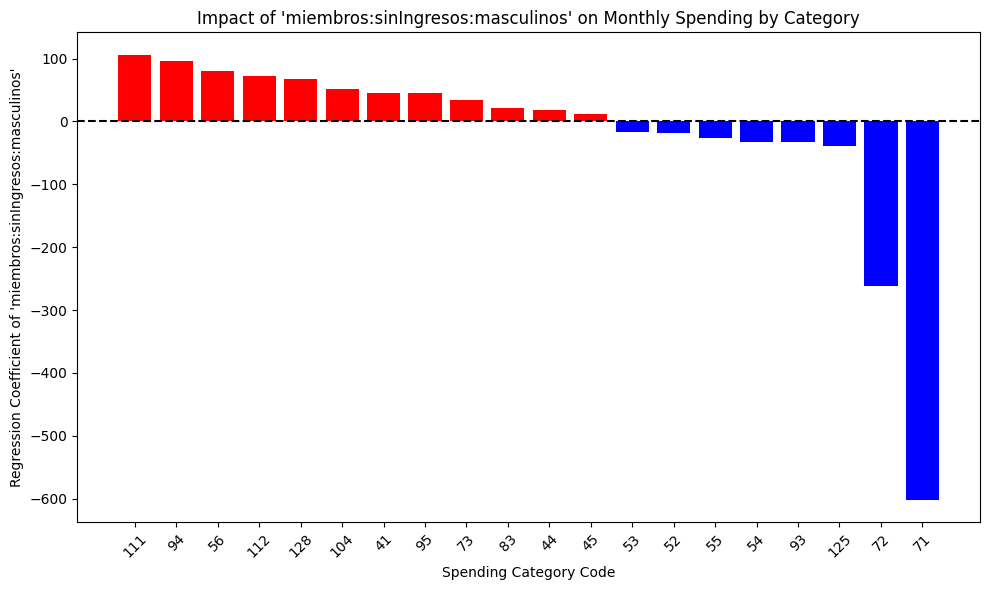

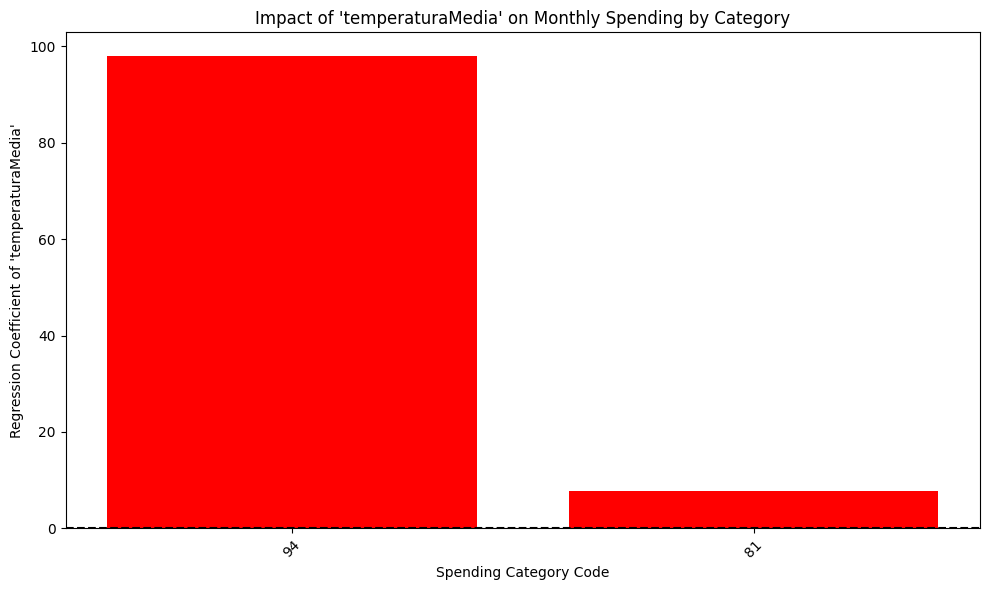

In [22]:
plot_variable_impact_across_categories(coefs_finales_without_const)

## 📊 Interpretación de un Modelo de Regresión Lineal Múltiple (sin normalizar)

### 🔍 ¿Qué significa que el modelo no esté normalizado?

En este caso, las variables **se mantienen en sus unidades originales**:

- Ingresos → en euros
- Edad → en años
- Numero de miembros del hogar (`NMIEMB`) → en número de personas
- Etc.

---

### 🎯 Interpretación de los coeficientes

Cada **coeficiente** representa el **cambio esperado en la variable dependiente (por ejemplo, gasto mensual en euros)** al aumentar en **una unidad real** la variable explicativa, manteniendo las demás constantes.

---

### 💡 Ejemplo con `NMIEMB` (Número de miembros del hogar)

El gráfico muestra el efecto de `NMIEMB` (sin normalizar) sobre el gasto mensual en cada categoría:

- En la **categoría 1 (Alimentos y bebidas no alcohólicas)**, el coeficiente es **+12** →  
  → *Cada miembro adicional en el hogar incrementa el gasto en alimentación en aproximadamente 12 euros.*

- En la **categoría 4 (Vivienda, agua, electricidad, gas)**, el coeficiente es **-7** →  
  → *Cada miembro adicional se asocia con una reducción del gasto en vivienda de unos 7 euros, posiblemente por reparto de costes fijos.*

- En la **categoría 10 (Enseñanza)**, el coeficiente es **+10** →  
  → *Hogares con más miembros suelen destinar más gasto total a educación.*

---

### ✅ Ventajas del modelo sin normalizar

- **Interpretación directa y clara**, en unidades reales (euros, años, personas...).
- Ideal cuando se quiere entender el impacto económico **real** de una variable.

---

### ⚠️ Consideraciones

- **Las escalas pueden distorsionar la comparación**: variables con unidades más grandes pueden tener coeficientes más grandes, pero no necesariamente más importantes.
- Si se quiere comparar la importancia relativa entre variables, es preferible normalizar.

---

### 🧠 Conclusión

> En modelos no normalizados, **los coeficientes reflejan el impacto real y directo de las variables** en la variable objetivo, facilitando una interpretación económica concreta.

